In [219]:
# LIBRARIES
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.optimizers import SGD

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor

#visualization libraries
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

#basic libraries
import pandas as pd
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
import numpy as np
from numpy import mean

#stats libraries
import scipy.stats as stats
from scipy import signal
from scipy.stats import sem

import statsmodels as sm
import statsmodels.api
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg

import pmdarima as pm

#other libraries
import eurostat
from time import time
from functools import reduce
import pytz
from tabulate import tabulate
import missingno as msno
import warnings

warnings.filterwarnings('ignore')

# Let's end the business cycle for good!
## (Methodology for business cycle forecasting by the prism of labor market) 

### Abstract
The market economy has suffered from an inborn "disease" since its beginning. The market economy to this day simply fails to function stably and sustainably. High economic activity and overloading of production possibilities are always replaced by painful crises, bankruptcies and poverty. This phenomenon is known as the business cycle. Countries are constantly trying to develop different methods of forecasting and controlling the waves of the business cycle, but to date without success. For the last 20 years, the world economy has experienced several crises and peaks without the state economic policy being able to both predict and counteract them. This report tries to help in what is the biggest deficit - forecasting the dynamics of economic activity so that economic policy has time to create preconditions and measures of response. Various methods for time series analysis and the power of neural networks and deep learning to forecast the business cycle through the prism of one of the most important indicators - the unemployment rate - will be presented.

### Keywords
business cycle, labor market, forecasting, regression, unemployment, employment, economic activity, deep learning, tensorflow

## I. Introduction
In the economic history of mankind, prosperity has always been the most important goal. If during absolute monarchies and empires prosperity was personified by the ruler, then with the development of democracy, the prosperity of the population is the goal of every macroeconomic policy. Even defining the main goal of macroeconomics is to achieve stable economic growth and maximize the standard of living. And here comes the key word: stable. Democracy is inextricably linked with free economic relations, even more so, there can be no democracy without a market economy. The market economy has proven to be the best way for economic relations to function based on the free will of economic subjects who, interacting with each other, move the invisible hand of demand and supply of goods and factors of production.

However, the functioning of the market economy is extremely volatile. All indicators of economic market dynamics change cyclically and lead to negative economic and social consequences. One of the markets is precisely the labor market. As a derivative of commodity markets, the cyclicality of economic activity is also transferred to the labor market. When the business cycle is at its peak, there is a shortage of labor on the labor market, high employment, low unemployment, high wages, but at its price - overheating of the engine of the economy, which indicates the temperature with an increase in inflation. When the business cycle is at its bottom, the labor market is characterized by high unemployment, poverty, low incomes. What is the biggest problem with the business cycle: apart from making managing the economy difficult, it is the social effects that are the most negative of it. When there are highs, social inequality is particularly acute, when there are lows, poverty intensifies.

That is why forecasting the waves of the business cycle, the dynamics of economic development, the pulse of the market economy is of primary importance. For this reason, the present report focuses precisely on the development of a detailed methodology for analyzing the dynamics of the business cycle through the lens of the labor market. The development of artificial intelligence and deep learning make it possible to take increasingly large steps towards achieving the ultimate goal - stable economic development, high prosperity and a stable economic environment based on a social sense of fairness.

## II. Literature preview
One short definitaion of business cycle is: Periodic fluctuation in the rate of economic activity, as measured by levels of employment, prices, and production. Economists have long debated why periods of prosperity are eventually followed by economic crises (stock-market crashes, bankruptcies, unemployment, etc.). Some have identified recurring 8-to-10-year cycles in market economies; longer cycles have also been proposed, notably by Nikolay Kondratev. Apart from random shocks to the economy, such as wars and technological changes, the main influences on the level of economic activity are investment and consumption. An increase in investment, as when a factory is built, leads to consumption because the workers employed to build the factory have wages to spend. Conversely, increases in consumer demand cause new factories to be built to satisfy the demand. Eventually the economy reaches its full capacity, and, with little free capital and no new demand, the process reverses itself and contraction ensues. Natural fluctuations in agricultural markets, psychological factors such as a bandwagon mentality, and changes in the money supply have all been proposed as explanations for initial changes in investment and consumption. After World War II many governments used monetary policy to moderate the business cycle, aiming to prevent the extremes of inflation and depression by stimulating the national economy in slack times and restraining it during expansions.

"Britannica, The Editors of Encyclopaedia. "business cycle summary". Encyclopedia Britannica, Invalid Date, https://www.britannica.com/summary/business-cycle. Accessed 9 January 2023."

Theories of economic cycles.

The volatility of economic activity expressed in economic cycles is extremely dynamic. Despite the consideration of multiple types of cycles, their duration, frequency and strength with which they occur allows for the creation of multiple theories regarding the causes and factors that determine both their occurrence and functioning. The following theories stand out as the most basic models:
- Exogenous – Endogenous typology;
- Keynesian and Neo-Keynesian theories;
- Neoclassical theories;

Exogenous and endogenous theories of the business cycle. According to this typology of theories, the main connecting element is the origin of the factor generating and determining the dynamics of the economic cycle. Exogenous theories see the factors outside the economic system ie. they are external and unrelated to the functioning of business activity or markets per se. Such factors can be: demographic processes - migration flows, a sharp change in the demographic structure of the population due to mechanical movement, birth rate boom; technology innovations and new management approaches (e.g. e-commerce, digital economy, mobile company applications, etc.); natural disasters - disasters, earthquakes, floods, epidemics, droughts, etc.; political factors, factors of international relations, global processes, integration, alliances, etc., which make a significant change on the previous functioning of the economic system. Endogenous theories mark factors that are intrinsic to the economic system and which, due to their dynamics, cause instability and lead to the cyclicality of economic activity. Such factors may be: changes in aggregate demand and aggregate supply; changes in investment and entrepreneurial activity; changes in stocks, capital formation, business activity, etc. All these factors are an expression of cyclical changes in the elements of the economic system, which in their cyclical dynamics have a cyclical imbalance on the national economy.

A Keysian Theory of Business Cycles. According to Keynes, the main cause of economic cycles is the dynamics of aggregate expenditure, which also determines aggregate demand. Focusing primarily on investment demand, the theory takes the form of an investment theory of economic cycles. Investment demand arises from two main motives - the expectations of investors for the future development of the economy and the possibility of profit. The possibility of profit is also defined as a ratio between the return on investment costs in entrepreneurial activity (the marginal efficiency of capital) and the interest rate of the investment loan. If investor expectations are poor, investment demand will fall, which will reduce aggregate demand. If the interest rate is high, the possibility of profit will decrease, which will also decrease investment activity. In both cases, without the creation of a favorable and stable economic and political environment, as well as an adequate state policy towards investment and entrepreneurial activity, aggregate demand will decrease, production volumes will decrease due to the lack of investment, and as a result, aggregate production will also decrease.

Neo-Keynesian theory of economic cycles. According to neo-Keynesians, the reason for the disequilibrium of the economy lies in the behavior of producers seeking to maximize their profit by changing their material stocks. Firms maximize their profits through capital investments, which are associated with balancing current and desired inventory levels. Central to this is investment demand as part of aggregate expenditure, which is directly related to profit maximization by employers. Classical Keynesian constraints on fixed resource prices are relaxed and replaced by inflexible prices, collective labor rewards, and market monopolization. It is the change of investments in the context of imperfect markets determining the dynamics of short-term macroeconomic equilibria around the long-term equilibrium that determine the disequilibrium of economic activity. Or cycles are the cyclical fluctuations of aggregate demand and the formation of short-run equilibrium around the potential level of output and natural rate of unemployment.

Neoclassical theory of business cycles. Neoclassical theory brings together many of the theories of neoclassicists who base their analysis of economic instability on flexible prices of production factors. According to them, the main factor affecting economic activity are the factors affecting the profits of companies. Disturbance of the balance between the capital stock and the product flow affects the sense of possible profit and hence the willingness to invest. Such factors may be expected changes in aggregate expenditure, such as increased exports, as well as the introduction of new technologies and management methods that would affect expected returns on capital investment, or unexpected changes in the money supply. These factors, if not foreseen, lead to dynamics in the components of aggregate demand and aggregate supply. As a result, the macroeconomic parameters change, such as: price level, wages and full employment level. Or the uneven growth of profit leads to cyclical fluctuations, accumulation of stocks and reduction of labor resources. This shift around the potential level of GDP determines cyclical fluctuations in economic activity.

## III. Methodology
The basic thesis of the present study is that deep learning has its important role in forecasting macroeconomic statistics, in particular economic activity and the business cycle.

The hypothesis is that by developing a detailed methodology for analysis of relationship and regression dependence, as well as for forecasting, it would be possible to reduce the chaotic nature of the business cycle dynamics on the one hand, and on the other hand to improve macroeconomic policies for managing economic instability and increasing economic prosperity.

In this regard, the main task of the present research is: To investigate in detail the possibility and effectiveness of deep learning for correlation-regression analysis and forecasting of macroeconomic statistics related to the business cycle, with its economic and social dimensions, in a comparative analysis with other methods and packages used for this.

The methodology will follow the following logic in the research:

First, the possibility of influencing the business cycle through the regression method will be investigated. The ability of deep learning to model the regression function will be explored in comparison to other models from libraries such as sikitlearn.

Secondly, the possibility of forecasting the business cycle will be investigated by means of one of the main indicators of economic activity in the context of the labor market, namely, the unemployment rate. The ability of deep learning to forecast the business cycle through the unemployment rate will be explored in comparison to other forecasting models from libraries such as Statsmodels.

To study the correlation-regression dependence, basic indicators related to the business cycle from an economic and social aspect by year will be used. To examine the possibility of forecasting, the unemployment rate by month will be examined.
Both databases will be in the context of the EU and the main countries associated with it. The Eurostat database will be used.

---

<h2 style="color:black; background-color:white; padding:10px">IV. Empirical results</h2>

<h2 style="color:black; background-color:white; padding:10px; margin-bottom:-25px">1. Regression models</h2>
<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">(Testing regression models and the ability of deep learning to detect relationships and define regressions in economic dynamics.)</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this point, we will go through the basic steps:</ul>
<li style="color:black; background-color:white; padding:5px">First, we will load and familiarize ourselves with the database subject to regression analysis;</li>
<li style="color:black; background-color:white; padding:5px">Second we will examine the missing data;</li>
<li style="color:black; background-color:white; padding:5px">Third, we will analyze the possibility of data normalization/standardization;</li>
<li style="color:black; background-color:white; padding:5px">Fourth, we will apply regression analysis by means of "traditional models" i.e. without using deep learning;</li>
<li style="color:black; background-color:white; padding:5px">Fifth, we will explore the applicability of deep learning for regression analysis;</li>
<li style="color:black; background-color:white; padding:5px">Sixth, we will compare and summarize the results of the regression analysis;</li>

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">First basic step. Loading, tidy and precessing</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this step, we familiarize ourselves with the data, its parameters and elements. Basic manipulations will be performed to help us use and better understand the elements to continue the research in the next steps. It includes the following manipulations: </ul>
<li style="color:black; background-color:white; padding:5px">loading the databasess</li>
<li style="color:black; background-color:white; padding:5px">extraction of uniqueness by features and observations</li>
<li style="color:black; background-color:white; padding:5px">extraction basic information about the datas</li>
<li style="color:black; background-color:white; padding:5px">descriptive statistics and graphical visualization</li>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">loading the databasess</h4>
<p style="color:black; background-color:white; padding:5px;  margin-bottom:-10px">
Since the loading of the data as well as the other sub-steps can be automated, a function has been created to set both the code of the data to Eurostat and the name of the database that will be loaded.</p>
<p style="color:black; background-color:white; padding:5px">
Working with different Eurostat databases is a challenging activity. The huge difficulty comes from the lack of standardization on the main parameters, which almost always makes their joining impossible. As an example, one database can take both the mentioned countries - which for different indicators can vary almost double, as well as the age at which there are the most different, often non-matching age groups. For this reason, is to release one function to load, align and layout all databases, then merge them into one common one.</p>

In [4]:
def POINT (df_link, name, arg1, arg2, *args):
    list_age = ['Y15-64']
    list_education = ['TOTAL']
    list_sex = ['T']
    
    df = eurostat.get_data_df(df_link)
    df = df.loc[(df['age'].isin (list_age)) & (df['sex'].isin(list_sex)) & (df["isced11"].isin(list_education))]
    #print(df["age"].unique())
    #print(df["sex"].unique())
    #print(df["isced11"].unique())
    df1 = df.drop(['unit','sex', 'age', "isced11"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)

def POVERTY (df_link, name, arg1, arg2, *args):
    list_age = ['Y_GE18']
    list_sex = ['T']
    list_edu = ['TOTAL']

    df = eurostat.get_data_df(df_link)
    df = df.loc[(df['age'].isin (list_age)) & (df['sex'].isin(list_sex)) & (df['sex'].isin(list_sex)) & (df['isced11'].isin(list_edu))]
    #print(df["age"].unique())
    #print(df["sex"].unique())
    #print(df["isced11"].unique())
    df1 = df.drop(['sex', 'age', "isced11"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)
    
def LEAVERS (df_link, name, arg1, arg2, *args):
    list_wstatus = ['POP']
    list_sex = ['T']
    list_citizen = ['TOTAL']
    
    df = eurostat.get_data_df(df_link)
    df = df.loc[ (df['wstatus'].isin (list_wstatus)) & (df['sex'].isin(list_sex)) & (df['citizen'].isin(list_citizen))] 
    #print(df["age"].unique())
    #print(df["sex"].unique())
    df1 = df.drop(['unit', 'citizen', 'wstatus', "sex", "age"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)

def NEETS (df_link, name, arg1, arg2, *args):
    list_sex = ['T']
    list_isced11 = ['TOTAL']
    list_age = ['Y15-34']

    df = eurostat.get_data_df(df_link)
    df = df.loc[ (df['age'].isin (list_age)) & (df['sex'].isin(list_sex)) & (df['isced11'].isin(list_isced11))] 
    #print(df["age"].unique())
    #print(df["sex"].unique())
    #print(df["isced11"].unique())
    df1 = df.drop(['unit', 'isced11', 'wstatus', "training" ,"sex", "age"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)

def PARTICIPATION  (df_link, name, arg1, arg2, *args):
    list_sex = ['T']
    list_age = ['Y25-64']

    df = eurostat.get_data_df(df_link)
    df = df.loc[ (df['age'].isin (list_age)) & (df['sex'].isin(list_sex))] 
    #print(df["age"].unique())
    #print(df["sex"].unique())
    df1 = df.drop(['unit' ,"sex", "age"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)

def GINI (df_link, name, arg1, arg2, *args):
    df = eurostat.get_data_df(df_link)
    df1 = df.drop(['indic_il'], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)
    
def RANDD (df_link, name, arg1, arg2, *args):
    list_sectperf = ['TOTAL']
    list_unit = ['PC_GDP']

    df = eurostat.get_data_df(df_link)
    df = df.loc[ (df['sectperf'].isin (list_sectperf)) & (df['unit'].isin(list_unit))] 
    #print(df["unit"].unique())
    #print(df["sectperf"].unique())
    df1 = df.drop(['unit' ,"sectperf"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)

In [5]:
POINT ("lfsa_ergaed", "df_employment", 'Date', 'employment', "geo\\time")
POINT ("lfsa_urgaed", "df__unemployment", 'Date', 'unemployment', "geo\\time")
POINT ("lfsa_argaed", "df_activity", 'Date', 'labor_activity' , "geo\\time")
POVERTY ("ilc_peps04", "df_poverty", 'Date', 'poverty', "geo\\time")
LEAVERS ("edat_lfse_01", "df_leavers", 'Date', 'early_leavers', "geo\\time")
NEETS ("edat_lfse_21", "df_neets", 'Date', 'neets', "geo\\time")
PARTICIPATION ("trng_lfse_01", "df_participation", 'Date', 'LLL', "geo\\time")
GINI ("ilc_di12", "df_gini", 'Date', 'gini', "geo\\time")
RANDD ("rd_e_gerdtot", "df_rnd", 'Date', 'R&D', "geo\\time")

In [6]:
df_economics = reduce(lambda x,y: pd.merge(x,y, on = ['Date','geo\\time'], how='outer'), 
               [df_employment, df__unemployment, df_activity, df_poverty, 
                df_leavers, df_neets, df_participation, df_gini, df_rnd])
df_economics.rename(columns={"geo\\time": "country"}, inplace=True)
df_economics = df_economics[df_economics['Date'] != "unit"]
df_economics['poverty'] = df_economics['poverty'].astype(float)
df_economics['Date'] = df_economics['Date'].astype(float)
df_economics['Date'] = df_economics['Date'].astype(int)
df_economics['Date'] = pd.to_datetime(df_economics['Date'], format='%Y')
df_economics['Date'] = df_economics['Date'].dt.year
df_economics = df_economics.sort_values(by=['Date'])
df_economics = df_economics.reset_index(drop=True)
df_economics

country  Date  employment  unemployment  labor_activity  poverty  \
0            US  1980         NaN           NaN             NaN      NaN   
1            HR  1980         NaN           NaN             NaN      NaN   
2            FR  1980         NaN           NaN             NaN      NaN   
3            FI  1980         NaN           NaN             NaN      NaN   
4     EU27_2020  1980         NaN           NaN             NaN      NaN   
...         ...   ...         ...           ...             ...      ...   
2137         PT  2021        70.1           6.7            75.2      NaN   
2138         PL  2021        70.3           3.4            72.8      NaN   
2139         NO  2021        76.3           4.5            79.9      NaN   
2140  EU27_2007  2021         NaN           NaN             NaN      NaN   
2141         AT  2021        72.4           6.3            77.2      NaN   

      early_leavers  neets   LLL  gini   R&D  
0               NaN    NaN   NaN   NaN  2.23  
1               NaN    NaN   NaN   NaN   NaN  
2               NaN    NaN   NaN   NaN   NaN  
3               NaN    NaN   NaN   NaN   NaN  
4               NaN    NaN   NaN   NaN   NaN  
...             ...    ...   ...   ...   ...  
2137            5.9   10.2  12.9  33.0  1.66  
2138            5.9   13.8   5.4  26.8  1.44  
2139           12.3    8.4  19.5   NaN  1.94  
2140            NaN    NaN   NaN   NaN   NaN  
2141            8.0   10.7  14.6  26.7  3.19  

[2142 rows x 11 columns]

<p style="color:black; background-color:white; padding:5px">
At first glance, we see a general table uniting the main indicators of economic and social development. We see most of the countries, the beginning and end of the time period is also visible - 1980 and 2021, largely the lack of data marked with nan prevents us from making sense of the values as a quantity and scale of all 2100 rows. So let's move on to the next sub-step.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Extraction of uniqueness by columns and elements</h4>
<p style="color:black; background-color:white; padding:5px;">
After loading databases, especially when they are large, it is important to get familiar with features and observations in them. In this way, we will understand what the "idea" of the database is and what can and should be done with it in terms of meaningful content.</p>

In [7]:
def uniques (df):
    print(f"Names of columns (features): \n{df.columns}")
    for col in df:
        if not df[col].dtype == "float" or df[col].dtype == "int":
            print(f"\nElements of columns (observations): \"{col}\": \n {df[col].unique()}")
            print(f"Number of elements of columns (observations): \"{col}\": \n {df[col].unique().size}")

        else:
            pass
    print(f"\nThe unique observation of a feature in which periods are mentioned is not logically applicable at this stage of the analysis")

In [8]:
uniques(df_economics)

Names of columns (features): 
Index(['country', 'Date', 'employment', 'unemployment', 'labor_activity',
       'poverty', 'early_leavers', 'neets', 'LLL', 'gini', 'R&D'],
      dtype='object')

Elements of columns (observations): "country": 
 ['US' 'HR' 'FR' 'FI' 'EU27_2020' 'ES' 'EL' 'EE' 'EA20' 'DK' 'DE' 'CZ' 'CY'
 'CN_X_HK' 'CH' 'BG' 'BE' 'BA' 'AT' 'UK' 'HU' 'IE' 'EA19' 'IT' 'IS' 'SK'
 'SI' 'SE' 'RU' 'RS' 'RO' 'PT' 'PL' 'NO' 'TR' 'MT' 'MK' 'ME' 'LV' 'LU'
 'LT' 'KR' 'JP' 'NL' 'EU28' 'EU15' 'XK' 'NMS10' 'EU27_2007' 'EU25' 'EU'
 'EA18' 'EA' 'AL']
Number of elements of columns (observations): "country": 
 54

Elements of columns (observations): "Date": 
 [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Number of elements of columns (observations): "Date": 
 42

The unique observation of a feature in which periods are mention

<p style="color:black; background-color:white; padding:5px;">
Here we see first that we will work with a database that contains the most important, already described in the methodology, indicators for the labor market, social conditions and investments in research and development activities. Then we see the countries that will be analyzed within the framework of the study. A total of 53 in number, as well as a time period spanning 42 years. </p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Extraction of basic information about the data</h4>
<p style="color:black; background-color:white; padding:5px;">
Parallel to the previous substep, it is important to outline the database parameters such as size, number of cases, data type, etc. In this way, we will understand what the "idea" of the database is and what can and should be done with it in terms of technical content.</p>

In [9]:
def db_info (df):
    observations = None
    features = None
    observations, features = df.shape
    print("1. Оbservations and features: \n {} Оbservations and {} features".format(observations, features))
    print("------------------------------------------------------")
    print (f"2. Number of cases in the table: {df.size}")
    print("------------------------------------------------------")
    print(f"3. The sum of element types by type is as follows: \n {df.dtypes.value_counts(ascending=True)}")
    print("------------------------------------------------------")

    list_objects = []
    list_int = []
    list_float64 = []

    for col in df.columns:
        if df[col].dtypes == "object":
            list_objects += [col]
        elif df[col].dtypes == "float64":
            list_float64 += [col]
        elif df[col].dtypes == "int64" or df[col].dtypes == "int32":
            list_int += [col]
    print("4. Group the features by data type:")
    print(f" object = {list_objects} \n")
    print(f" int = {list_int} \n")
    print(f" float64 = {list_float64}")

In [10]:
db_info(df_economics)

1. Оbservations and features: 
 2142 Оbservations and 11 features
------------------------------------------------------
2. Number of cases in the table: 23562
------------------------------------------------------
3. The sum of element types by type is as follows: 
 object     1
int64      1
float64    9
dtype: int64
------------------------------------------------------
4. Group the features by data type:
 object = ['country'] 

 int = ['Date'] 

 float64 = ['employment', 'unemployment', 'labor_activity', 'poverty', 'early_leavers', 'neets', 'LLL', 'gini', 'R&D']


<p style="color:black; background-color:white; padding:5px"> Checking the data by type we may see that the content of all numeric indicators is "float" , all ordinal/nominal ones are "object" and only years are "int"</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Descriptive statistics</h4>
<p style="color:black; background-color:white; padding:5px"> The output of the descriptive statistics for the two databases aims, on the one hand, to give us a first deeper look at the data, and on the other hand, to alert us to the difference between the scales, the need for precessing and graphical analysis of their distribution.</p>

In [11]:
statsmodels.stats.descriptivestats.describe(df_economics).round(2)

Date  employment  unemployment  labor_activity  poverty  \
nobs              2142.00     2142.00       2142.00         2142.00  2142.00   
missing              0.00     1075.00       1076.00         1075.00  1500.00   
mean              2001.31       64.32          8.96           70.50    23.65   
std_err              0.26        0.25          0.15            0.21     0.35   
upper_ci          2001.82       64.82          9.26           70.91    24.33   
lower_ci          2000.81       63.82          8.66           70.08    22.97   
std                 11.94        8.30          4.95            6.93     8.75   
iqr                 21.00       10.90          5.07            9.25     9.35   
iqr_normal          15.57        8.08          3.76            6.86     6.93   
mad                 10.27        6.58          3.54            5.53     6.38   
mad_normal          12.88        8.25          4.44            6.94     8.00   
coef_var             0.01        0.13          0.55            0.10     0.37   
range               41.00       47.50         34.80           40.30    51.00   
max               2021.00       87.10         36.30           89.30    61.40   
min               1980.00       39.60          1.50           49.00    10.40   
skew                -0.09       -0.04          1.76           -0.01     1.61   
kurtosis             1.85        2.84          7.54            2.80     6.12   
jarque_bera        121.06        1.37       1464.24            1.75   536.48   
jarque_bera_pval     0.00        0.50          0.00            0.42     0.00   
mode              1995.00       65.30          6.90           68.70    20.70   
mode_freq            0.03        0.01          0.02            0.01     0.02   
median            2002.00       64.20          7.90           70.70    21.50   
1%                1980.00       44.80          2.23           55.97    11.64   
5%                1982.00       50.73          3.40           59.10    14.20   
10%               1984.00       53.30          4.10           60.76    15.51   
25%               1991.00       59.00          5.60           65.90    17.52   
50%               2002.00       64.20          7.90           70.70    21.50   
75%               2012.00       69.90         10.68           75.15    26.88   
90%               2018.00       75.20         15.60           79.14    35.40   
95%               2019.95       77.87         18.58           81.57    40.98   
99%               2021.00       84.17         26.44           87.13    57.48   

                  early_leavers    neets      LLL     gini      R&D  
nobs                    2142.00  2142.00  2142.00  2142.00  2142.00  
missing                 1465.00  1344.00  1230.00  1329.00  1021.00  
mean                      12.12    15.41    10.27    30.03     1.64  
std_err                    0.28     0.23     0.26     0.15     0.03  
upper_ci                  12.66    15.86    10.79    30.33     1.69  
lower_ci                  11.57    14.97     9.75    29.74     1.59  
std                        7.28     6.46     7.99     4.29     0.89  
iqr                        7.10     8.18    10.12     5.80     1.36  
iqr_normal                 5.26     6.06     7.51     4.30     1.01  
mad                        5.01     4.86     6.38     3.33     0.74  
mad_normal                 6.27     6.09     8.00     4.18     0.93  
coef_var                   0.60     0.42     0.78     0.14     0.54  
range                     46.60    41.80    36.50    26.00     4.61  
max                       48.80    45.90    37.30    46.00     4.80  
min                        2.20     4.10     0.80    20.00     0.19  
skew                       2.05     1.10     1.15     0.57     0.44  
kurtosis                   8.53     4.84     3.49     3.62     2.46  
jarque_bera             1336.76   274.65   210.74    56.57    49.81  
jarque_bera_pval           0.00     0.00     0.00     0.00     0.00  
mode                      11.80    16.60     2.90    29.00  

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Graphical visualization</h4>
<p style="color:black; background-color:white; padding:5px;"> Will replace the country codes and put their full names. This is done both for the greater convenience of the analysis and because of the need for the full names of the countries in the following graphs.</p>

In [12]:
df_economics["country"] = df_economics["country"].replace(pytz.country_names)
df_economics["country"].replace({'UK': 'United Kingdom ', 'XK': 'Kosovo', 'CN_X_HK': 'China', 'EL': 'Greece'}, inplace=True)
df_economics

country  Date  employment  unemployment  labor_activity  poverty  \
0     United States  1980         NaN           NaN             NaN      NaN   
1           Croatia  1980         NaN           NaN             NaN      NaN   
2            France  1980         NaN           NaN             NaN      NaN   
3           Finland  1980         NaN           NaN             NaN      NaN   
4         EU27_2020  1980         NaN           NaN             NaN      NaN   
...             ...   ...         ...           ...             ...      ...   
2137       Portugal  2021        70.1           6.7            75.2      NaN   
2138         Poland  2021        70.3           3.4            72.8      NaN   
2139         Norway  2021        76.3           4.5            79.9      NaN   
2140      EU27_2007  2021         NaN           NaN             NaN      NaN   
2141        Austria  2021        72.4           6.3            77.2      NaN   

      early_leavers  neets   LLL  gini   R&D  
0               NaN    NaN   NaN   NaN  2.23  
1               NaN    NaN   NaN   NaN   NaN  
2               NaN    NaN   NaN   NaN   NaN  
3               NaN    NaN   NaN   NaN   NaN  
4               NaN    NaN   NaN   NaN   NaN  
...             ...    ...   ...   ...   ...  
2137            5.9   10.2  12.9  33.0  1.66  
2138            5.9   13.8   5.4  26.8  1.44  
2139           12.3    8.4  19.5   NaN  1.94  
2140            NaN    NaN   NaN   NaN   NaN  
2141            8.0   10.7  14.6  26.7  3.19  

[2142 rows x 11 columns]

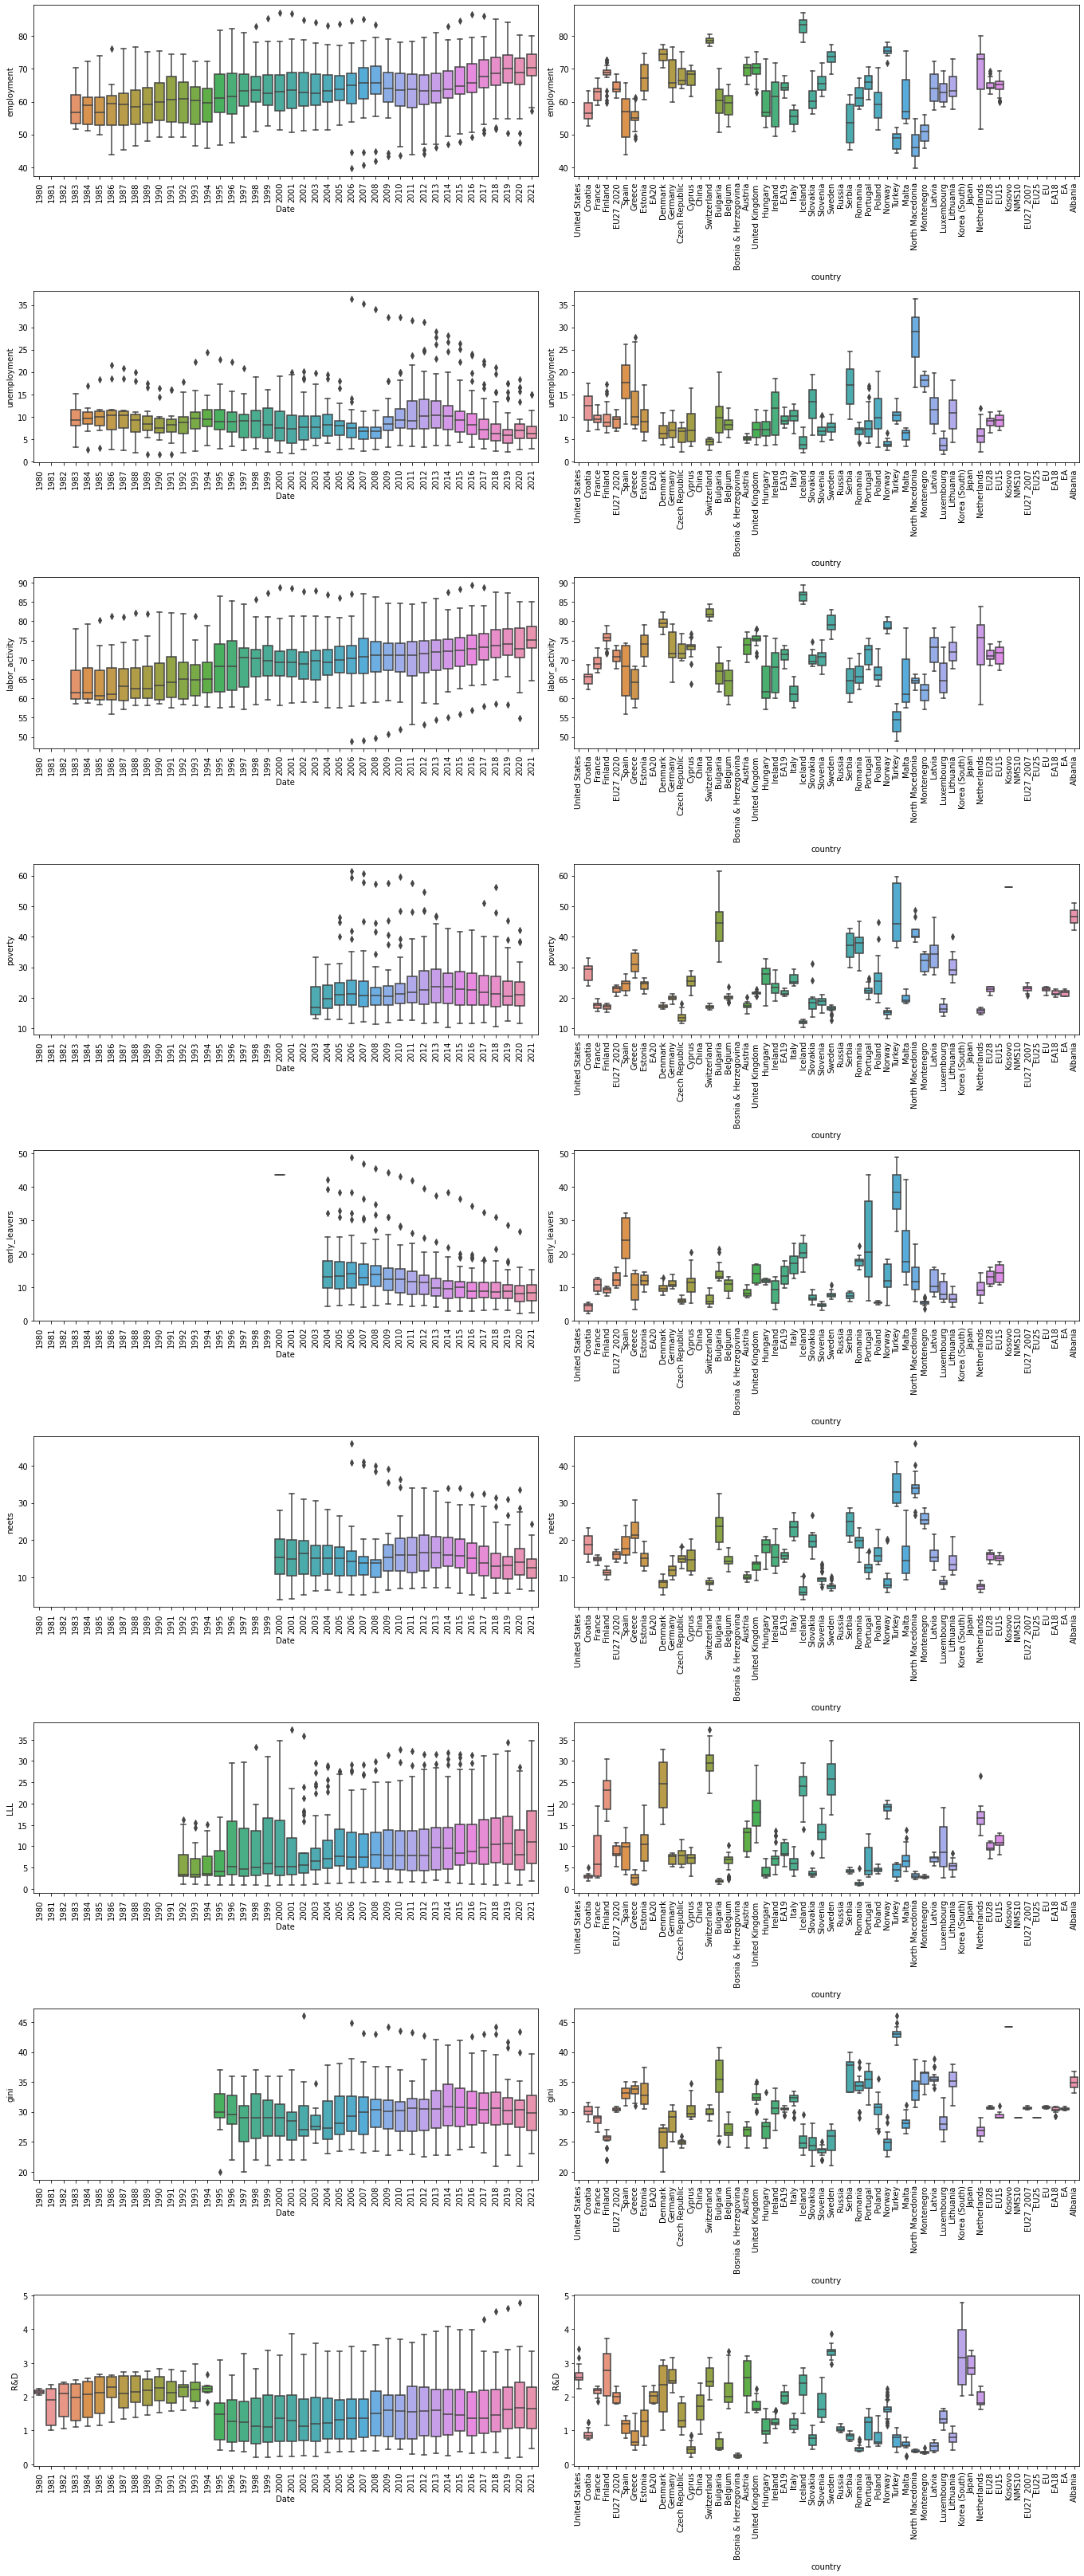

In [13]:
fig, axes = plt.subplots(9, 2, figsize=(19, 45))

sns.boxplot(ax=axes[0, 0], data=df_economics, x='Date', y='employment')
axes[0, 0].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[1, 0], data=df_economics, x='Date', y='unemployment')
axes[1, 0].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[2, 0], data=df_economics, x='Date', y='labor_activity')
axes[2, 0].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[3, 0], data=df_economics, x='Date', y='poverty')
axes[3, 0].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[4, 0], data=df_economics, x='Date', y='early_leavers')
axes[4, 0].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[5, 0], data=df_economics, x='Date', y='neets')
axes[5, 0].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[6, 0], data=df_economics, x='Date', y='LLL')
axes[6, 0].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[7, 0], data=df_economics, x='Date', y='gini')
axes[7, 0].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[8, 0], data=df_economics, x='Date', y='R&D')
axes[8, 0].tick_params(axis='x', labelrotation=90)
plt.tight_layout() 

sns.boxplot(ax=axes[0, 1], data=df_economics, x='country', y='employment')
axes[0, 1].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[1, 1], data=df_economics, x='country', y='unemployment')
axes[1, 1].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[2, 1], data=df_economics, x='country', y='labor_activity')
axes[2, 1].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[3, 1], data=df_economics, x='country', y='poverty')
axes[3, 1].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[4, 1], data=df_economics, x='country', y='early_leavers')
axes[4, 1].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[5, 1], data=df_economics, x='country', y='neets')
axes[5, 1].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[6, 1], data=df_economics, x='country', y='LLL')
axes[6, 1].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[7, 1], data=df_economics, x='country', y='gini')
axes[7, 1].tick_params(axis='x', labelrotation=90)
sns.boxplot(ax=axes[8, 1], data=df_economics, x='country', y='R&D')
axes[8, 1].tick_params(axis='x', labelrotation=90)
plt.tight_layout() 

<p style="color:black; background-color:white; padding:5px;">
After replacing the country names, we moved on to visualize the data using a boxplot. This requires, on the one hand, to better visualize and understand the set of data and, on the other hand, to use the specifics of the graph type. Using a boxplot we can see the variation in values both by year and by country, which gives us invaluable information for all types of analysis and conclusions. For example, the poverty level in Bulgaria and Turkey has the largest variation in values of all countries, while in Denmark and Switzerland these values are almost unchanged during the studied period. Another example is the unemployment rate values, which are extremely close in the period up to 2008, after which the variation increases in the following years as an effect of the global crisis.</p>

---

<span style="background-color:white">
<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px"> Second basic step. Missing values </h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px"> In this step, missing values analysis is done. The goal is to examine their proportions, check for a pattern, and remove them where appropriate: </ul>
<li style="color:black; background-color:white; padding:5px">general check for missing data</li>
<li style="color:black; background-color:white; padding:5px">searching for a pattern in the missing data</li>
<li style="color:black; background-color:white; padding:5px">check for Outliers in missing data</li>
<li style="color:black; background-color:white; padding:5px">visualization of missing data</li>
<li style="color:black; background-color:white; padding:5px">cluster visualization of missing data</li>
</span>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Missing values by columns</h4>
<p style="color:black; background-color:white; padding:5px;">
In this step, we run a check for missing values on all columns. As a result, the missing values will be presented as an absolute number and as a relative number. The relative is calculated based on the percentage of missing values of the column from all elements of the column itself.</p>

In [14]:
def missing_values_features(df):
    df_missing = df.isna().sum()
    b = df_missing / len(df)
    df_missing_relative = b.map(lambda n: '{:,.2%}'.format(n))
    print("Missing values")
    missing_all = pd.concat([df_missing, df_missing_relative], axis=1, keys=('Absolute number','Relative number'))

    missing_all.index = missing_all.index.map(str)
    
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,6))
    axes[0].barh(missing_all.index, missing_all["Absolute number"])
    axes[0].set(title='Absolute number')
    axes[0].invert_xaxis()

    axes[0].yaxis.tick_right()

    axes[1].barh(missing_all.index, (b*100), color = "c")
    axes[1].set(title='Relative number')


    axes[0].bar_label(axes[0].barh(missing_all.index, missing_all["Absolute number"]), label_type='center')
    axes[1].bar_label((axes[1].barh(missing_all.index, (b*100))), fmt='%.2f')

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.30)
    plt.show()

Missing values


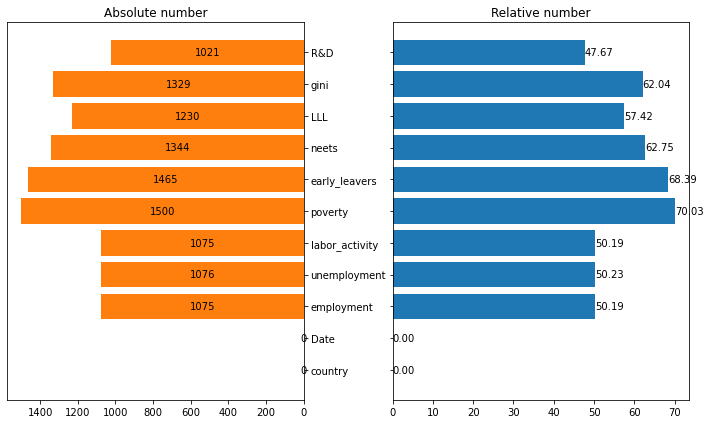

In [15]:
missing_values_features(df_economics)

<p style="color:black; background-color:white; padding:5px;">
The graph shows that there is a significant amount of missing values. Every single feature has over 1000 missing values in absolute numbers or over almost 50% in relative terms. The most missing values are for the poverty level - almost 70%, and the least for R&D expenditures - 47.67%.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Missing values by rows</h4>
<p style="color:black; background-color:white; padding:5px;">
After the visualization of the missing values by columns in the previous substep, here the analysis continues by visualizing the missing values by rows. Rowwise missing values analysis outputs the unique elements of each column and sums the missing values of all columns associated with it.</p>

In [317]:
def missing_rows (df):
     for col in df.columns:
        if not df[col].dtype == "float" or df[col].dtype == "int":
            missing_model = df.groupby(col).apply(lambda x: x.isna().sum().sum()).to_frame(name=None).reset_index()
            missing_model.rename({0:"missing"}, inplace=True, axis=1)
            print(tabulate(missing_model, headers = 'keys', tablefmt = 'psql'))
            fig = px.bar(missing_model, x=missing_model[missing_model.columns[0]], y = missing_model["missing"], 
                    labels={"missing": "Missing values"},width=1200, height=400)
            fig.show()
        else:
            pass

+----+----------------------+-----------+
|    | country              |   missing |
|----+----------------------+-----------|
|  0 | Albania              |       235 |
|  1 | Austria              |       160 |
|  2 | Belgium              |       120 |
|  3 | Bosnia & Herzegovina |       373 |
|  4 | Bulgaria             |       191 |
|  5 | China                |       357 |
|  6 | Croatia              |       217 |
|  7 | Cyprus               |       189 |
|  8 | Czech Republic       |       184 |
|  9 | Denmark              |       110 |
| 10 | EA                   |       216 |
| 11 | EA18                 |       210 |
| 12 | EA19                 |       195 |
| 13 | EA20                 |       356 |
| 14 | EU                   |       219 |
| 15 | EU15                 |       212 |
| 16 | EU25                 |       239 |
| 17 | EU27_2007            |       213 |
| 18 | EU27_2020            |       215 |
| 19 | EU28                 |       225 |
| 20 | Estonia              |     

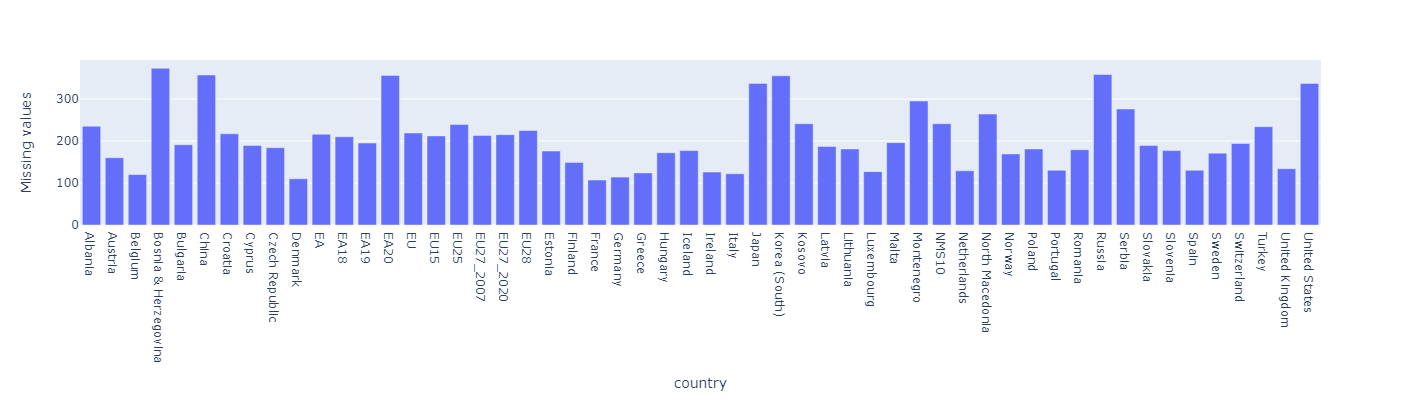

+----+--------+-----------+
|    |   Date |   missing |
|----+--------+-----------|
|  0 |   1980 |       394 |
|  1 |   1981 |       387 |
|  2 |   1982 |       390 |
|  3 |   1983 |       375 |
|  4 |   1984 |       380 |
|  5 |   1985 |       376 |
|  6 |   1986 |       373 |
|  7 |   1987 |       370 |
|  8 |   1988 |       371 |
|  9 |   1989 |       369 |
| 10 |   1990 |       371 |
| 11 |   1991 |       370 |
| 12 |   1992 |       359 |
| 13 |   1993 |       358 |
| 14 |   1994 |       361 |
| 15 |   1995 |       379 |
| 16 |   1996 |       369 |
| 17 |   1997 |       348 |
| 18 |   1998 |       343 |
| 19 |   1999 |       329 |
| 20 |   2000 |       281 |
| 21 |   2001 |       273 |
| 22 |   2002 |       263 |
| 23 |   2003 |       259 |
| 24 |   2004 |       207 |
| 25 |   2005 |       177 |
| 26 |   2006 |       161 |
| 27 |   2007 |       157 |
| 28 |   2008 |       152 |
| 29 |   2009 |       152 |
| 30 |   2010 |       141 |
| 31 |   2011 |       133 |
| 32 |   2012 |     

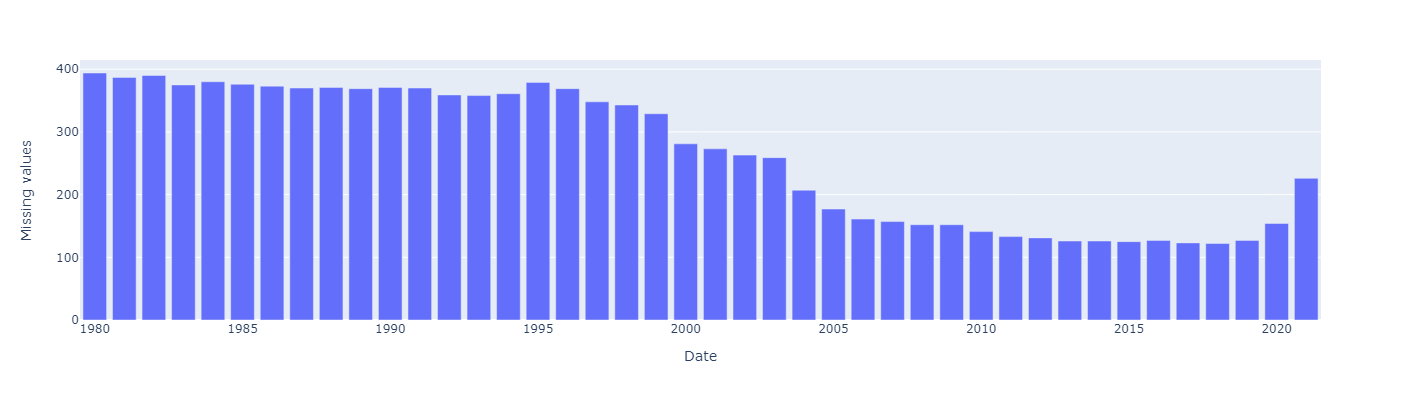

In [318]:
missing_rows(df_economics)

<p style="color:black; background-color:white; padding:5px;">
The first graph shows the missing values by country from all columns. We can clearly see that countries like USA, South Korea, Russia and Bosnia and Herzegovina have the most missing values and countries like Denmark and Belgium have the fewest. The second graph shows us that from the beginning of the studied period until 1999, the missing values are the highest to over 300. After that they fall and in the rest of the period they are almost in the range of 100 - 200.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Check for outliers in missing values</h4>
<p style="color:black; background-color:white; padding:5px;">
From the graphical visualization of missing values up to this point, it is clear that there is a disparity in missing values by country and by year. Therefore, we will now use an outlier detection toolkit approach to pinpoint those that have extreme missing values.</p>

In [18]:
def find_outliers_IQR(df):
    df88 = df.select_dtypes(include='object')
    for col in df88.columns:
        df88 = df.groupby(col).apply(lambda x: x.isna().sum().sum()).to_frame()
        q1=df88.quantile(0.25)
        q3=df88.quantile(0.75)
        IQR=q3-q1
        outliers = df88[((df88<(q1-1.5*IQR)) | (df88>(q3+1.5*IQR)))]
        
    if outliers.empty:
        pass
    else:
        print (tabulate(df88, tablefmt = 'psql'))
        fig = px.box(df88, y=df88[0],width=700, height=400)
        fig.show()
        print("number of outliers: "+ str(len(df88)))
        print("max outlier value: "+ str(outliers.max()))
        print("min outlier value: "+ str(outliers.min()))

+----------------------+-----+
| Albania              | 235 |
| Austria              | 160 |
| Belgium              | 120 |
| Bosnia & Herzegovina | 373 |
| Bulgaria             | 191 |
| China                | 357 |
| Croatia              | 217 |
| Cyprus               | 189 |
| Czech Republic       | 184 |
| Denmark              | 110 |
| EA                   | 216 |
| EA18                 | 210 |
| EA19                 | 195 |
| EA20                 | 356 |
| EU                   | 219 |
| EU15                 | 212 |
| EU25                 | 239 |
| EU27_2007            | 213 |
| EU27_2020            | 215 |
| EU28                 | 225 |
| Estonia              | 176 |
| Finland              | 149 |
| France               | 107 |
| Germany              | 114 |
| Greece               | 124 |
| Hungary              | 172 |
| Iceland              | 177 |
| Ireland              | 126 |
| Italy                | 122 |
| Japan                | 337 |
| Korea (South)        | 355 |
| Kosovo

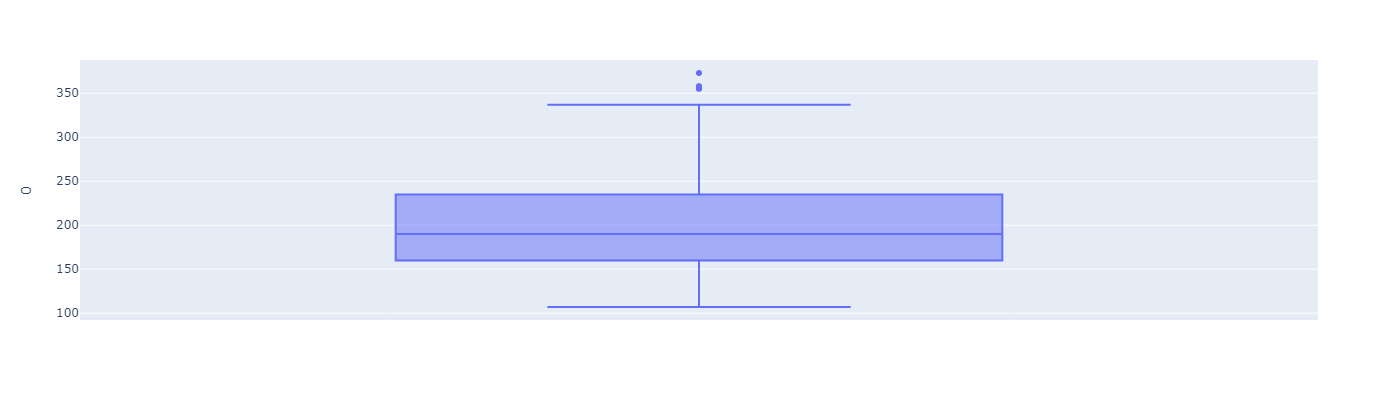

number of outliers: 54
max outlier value: 0    373.0
dtype: float64
min outlier value: 0    355.0
dtype: float64


In [19]:
find_outliers_IQR(df_economics)

<p style="color:black; background-color:white; padding:5px">The graph shows that the following countries are outliers for missing values by country: Bosnia and Herzegovina, China, South Korea and Russia.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Missing rows by filter</h4>
<p style="color:black; background-color:white; padding:5px;">
Another interesting approach is to filter the rows by the number of missing values in the columns. This will be checked by function, that checks for all missing values .</p>

In [20]:
def missing_rows_all (df):
    results = df.select_dtypes(include=["float"])
    len_results = len(results.columns)
    len_results_null = df.loc[df.isnull().sum(1)==len_results]
    
    observations_part, features_part = len_results_null.shape
    observations, features = df.shape
    obesrvation_relative = 100/(observations/observations_part)
    
    print(f"The database has {len_results} columns(features) with float type datas")
    print(f"The folowing {observations_part} rows dont have any data on any of that columns (features):")
    print(f"The part of dataframe with filtered missing values is {obesrvation_relative:.2f} % of the whole database")

    return(len_results_null)

In [21]:
missing_rows_all(df_economics)

The database has 9 columns(features) with float type datas
The folowing 763 rows dont have any data on any of that columns (features):
The part of dataframe with filtered missing values is 35.62 % of the whole database


country  Date  employment  unemployment  labor_activity  \
1             Croatia  1980         NaN           NaN             NaN   
2              France  1980         NaN           NaN             NaN   
3             Finland  1980         NaN           NaN             NaN   
4           EU27_2020  1980         NaN           NaN             NaN   
5               Spain  1980         NaN           NaN             NaN   
...               ...   ...         ...           ...             ...   
2129            NMS10  2021         NaN           NaN             NaN   
2130           Kosovo  2021         NaN           NaN             NaN   
2131  United Kingdom   2021         NaN           NaN             NaN   
2132           Turkey  2021         NaN           NaN             NaN   
2140        EU27_2007  2021         NaN           NaN             NaN   

      poverty  early_leavers  neets  LLL  gini  R&D  
1         NaN            NaN    NaN  NaN   NaN  NaN  
2         NaN            NaN    NaN  NaN   NaN  NaN  
3         NaN            NaN    NaN  NaN   NaN  NaN  
4         NaN            NaN    NaN  NaN   NaN  NaN  
5         NaN            NaN    NaN  NaN   NaN  NaN  
...       ...            ...    ...  ...   ...  ...  
2129      NaN            NaN    NaN  NaN   NaN  NaN  
2130      NaN            NaN    NaN  NaN   NaN  NaN  
2131      NaN            NaN    NaN  NaN   NaN  NaN  
2132      NaN            NaN    NaN  NaN   NaN  NaN  
2140      NaN            NaN    NaN  NaN   NaN  NaN  

[763 rows x 11 columns]

<p style="color:black; background-color:white; padding:5px;">The data shows that 35.38% of the entire database are rows with completely missing values across all columns. In absolute number, this is 743 lines. These are countries or years that do not have data for any of the economic and social indicators for the studied time period.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Visualization of missing values</h3>
<p style="color:black; background-color:white; padding:5px;">
To visualize and understand the missing data from a different perspective, several basic visualization methods including the Missingno library tools are indicated.</p>

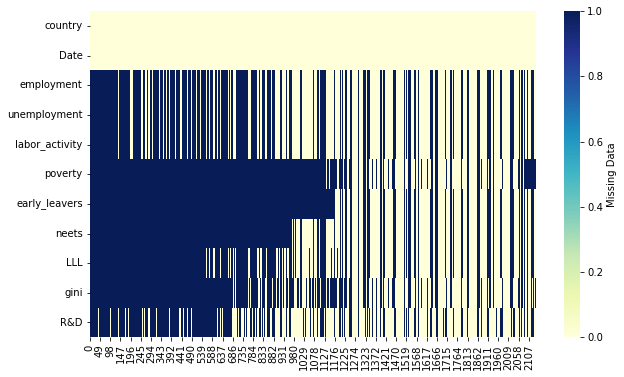

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df_economics.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.show()

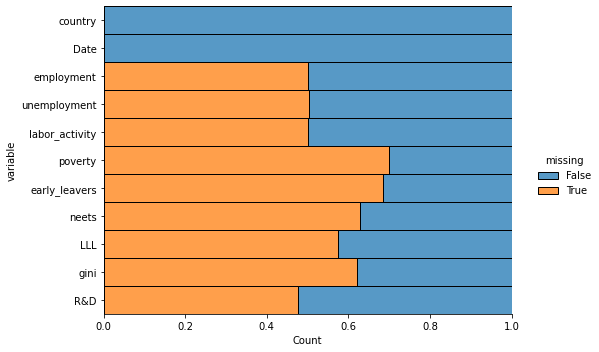

In [23]:
sns.displot(
    data=df_economics.isna().melt(value_name="missing"), 
    y="variable",
    hue="missing",
    multiple="fill",
    height = 5,
    aspect=1.5
)

<AxesSubplot:>

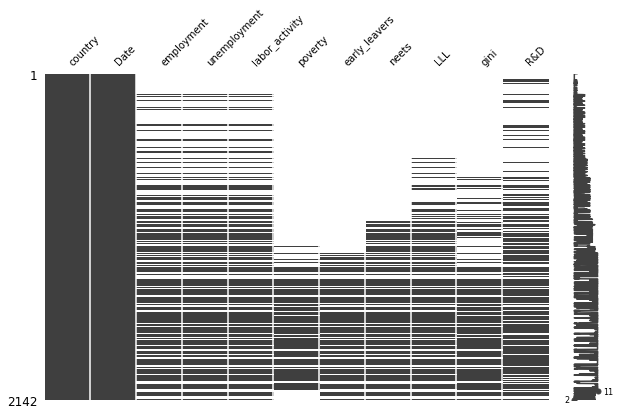

In [24]:
msno.matrix(df_economics, figsize=(10, 6), fontsize=10)

<AxesSubplot:>

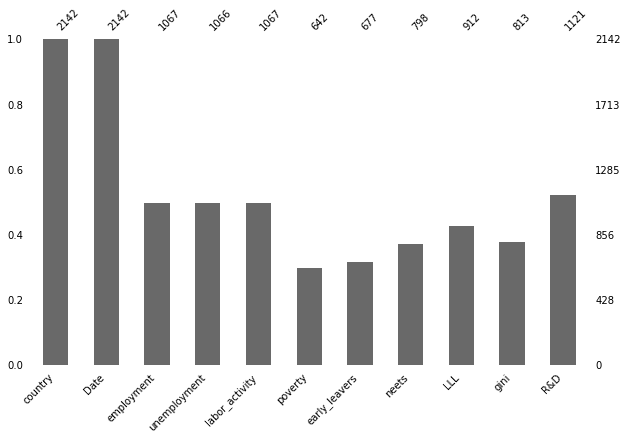

In [25]:
msno.bar(df_economics, figsize=(10, 6), fontsize=10)

<p style="color:black; background-color:white; padding:5px;">The graphs show very well both the number of missing values by columns and by rows. Rows with completely full of values are shown as solid lines.</p> 

<AxesSubplot:>

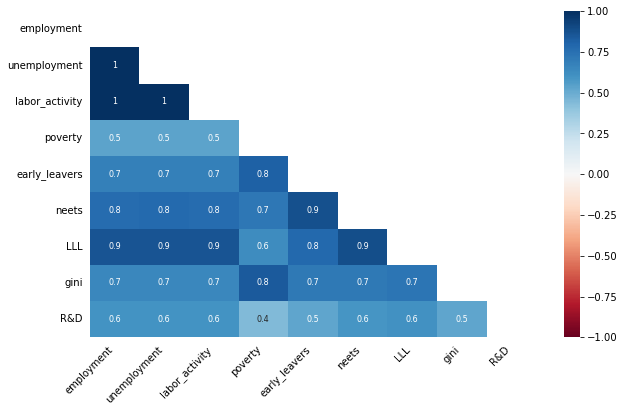

In [26]:
msno.heatmap(df_economics, figsize=(10, 6), fontsize=10)

<p style="color:black; background-color:white; padding:5px;">The heatmap clearly shows the correlation relationship between the missing value columns. Since there are many missing values it is not surprising that the correlation coefficients are high for all combinations. Perhaps more interesting is the lack of connection between the poverty level and indicators related to the dynamics of the labor market.</p>

<AxesSubplot:>

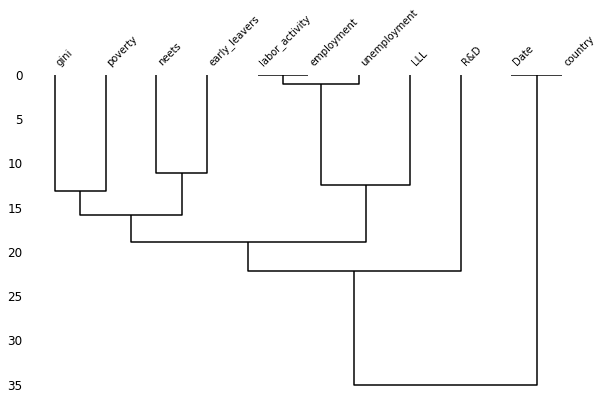

In [27]:
msno.dendrogram(df_economics, figsize=(10, 6), fontsize=10)

<p style="color:black; background-color:white; padding:5px;">The dendrogram shows very clearly the relationship between the missing values. Indicators related to social ills - poverty, inequality, early leavers and NEETs are combined together. On the other hand, indicators related to the labor market - economic activity, unemployment and employment are also combined together, and lifelong learning is combined with them. Only the R&D costs are identified independently.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Cluster visualization of missing values </h3>
<p style="color:black; background-color:white; padding:5px;">
An interesting approach is the use of clustering methods to group the missing values in some form of cluster patterns. First, let's process the database by summing the missing data for each country across all years and indicators.</p>

In [43]:
df_employment_cluster = df_economics.set_index('country').isna().groupby('country').sum()
df_employment_cluster = df_employment_isced11.iloc[:, 0:]
df_employment_cluster.head()

unemployment  labor_activity  poverty  early_leavers  \
country                                                                      
Albania                         27              27       23             27   
Austria                         15              15       24             24   
Belgium                          3               3       24             24   
Bosnia & Herzegovina            42              42       42             42   
Bulgaria                        20              20       27             24   

                      neets  LLL  gini  R&D  
country                                      
Albania                  27   27    23   27  
Austria                  20   16    16   15  
Belgium                  20   12    16   15  
Bosnia & Herzegovina     42   42    42   37  
Bulgaria                 21   21    23   15

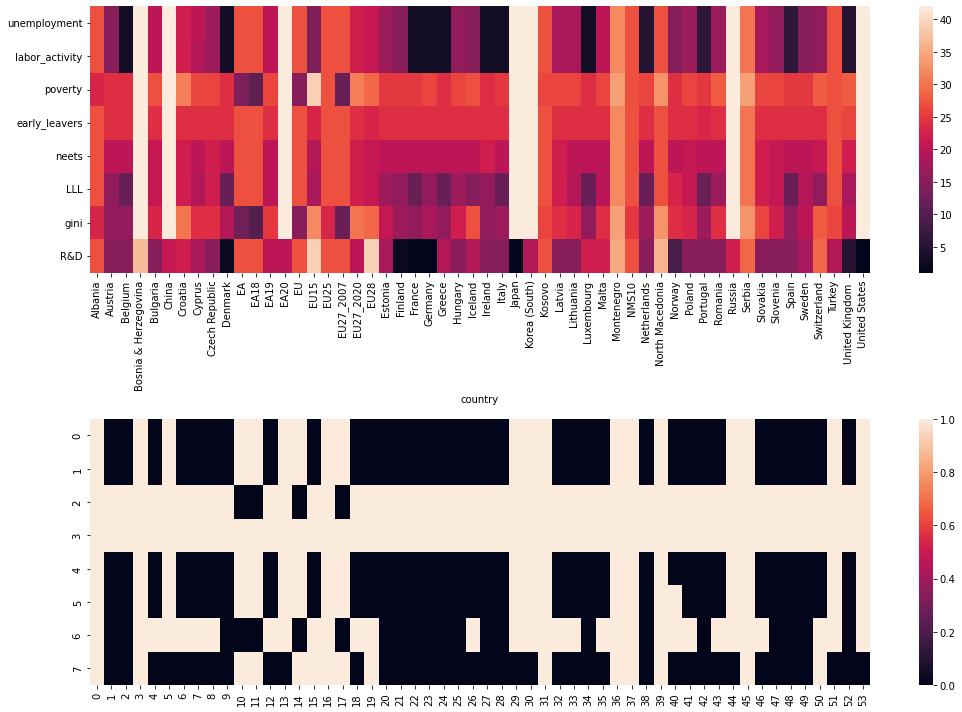

In [44]:
Y = df_employment_cluster.to_numpy()
Y = Y.reshape(-1, 1)

kmeans= KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(Y)

Z = kmeans.labels_
A = Z.reshape(54,8)

fig, ax =plt.subplots(2,1, figsize=(15, 10))
sns.heatmap(df_employment_cluster.transpose(),  ax=ax[0])
sns.heatmap(A.transpose(),  ax=ax[1])
fig.tight_layout()
plt.show()

<p style="color:black; background-color:white; padding:5px;">The first graph visualizes the number of missing values using color shades. The lighter the color, the more missing values there are. This is most visible in countries that were already indicated as those with the most missing values - Bosnia and Herzegovina, South Korea, China, USA where the color is almost white. The second graph visualizes cluster 1 and cluster 2 measured by the K-means method.</p>

---

<h2 style="color:black; background-color:white; padding:10px; margin-bottom:-15px">1.1. Regression models using Scikit-Learn</h2>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-7px">In this "standard or traditional approach" ie. without using deep learning we will go through three steps: </ul>
<li style="color:black; background-color:white; padding:5px">First estimate alogitm for standardization/normalization of data and removal of missing data;</li>
<li style="color:black; background-color:white; padding:5px">Second testing the regression models for the "best" model based on regresion metric;</li>
<li style="color:black; background-color:white; padding:5px">Third, optimize the hyperparameters of the "best" model to boost its result;</li>

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step one: Standartization</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">Having clarified that data transformation is key for several reasons, one of which is the sensitivity of the algorithms to different scales and the presence of outliers in this substep, we will approach this as follows: </ul>
<li style="color:black; background-color:white; padding:5px">first: a function will be created with the basic normalization and standardization methods;</li>
<li style="color:black; background-color:white; padding:5px">second: databases will be launched to transform through all methods;</li>
<li style="color:black; background-color:white; padding:5px">third: an exemplary linear regression will be conducted and, based on its results, the most appropriate method will be derived</li>
<li style="color:black; background-color:white; padding:5px">fourth: this will be repeated in 200 iterations to objectify the result more.</li>

In [45]:
def standar_normal (df, iterations, x, y):
    flg1={}
    flg2={}
    for i in range(1,iterations):
        temp1={}
        dict9={}
        
        df= df.dropna(axis= 0, how='any')
        
        global df_standart
        scaler_standart = StandardScaler()
        df_standart = pd.DataFrame(scaler_standart.fit_transform(df.values), columns=df.columns, index=df.index)
        X_standart= df_standart[[x]].values
        y_standart=df_standart[[y]].values
        X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_standart,y_standart ,train_size=0.95)
        model_standart = LinearRegression()
        model_standart.fit(X_train_st, y_train_st)
        standart_score = model_standart.score(X_test_st, y_test_st)
        dict9.update({"StandardScaler":standart_score})

        global df_normal
        scaler_normal = MinMaxScaler()
        df_normal = pd.DataFrame(scaler_normal.fit_transform(df.values), columns=df.columns, index=df.index)
        X_normal= df_normal[[x]].values
        y_normal=df_normal[[y]].values
        X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_normal,y_normal ,train_size=0.8)
        model_normal = LinearRegression()
        model_normal.fit(X_train_n, y_train_n)
        normal_score = model_normal.score(X_test_n, y_test_n)
        dict9.update({"MinMaxScaler":normal_score})

        X_linear= df[[x]].values
        y_linear=df[[y]].values
        X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_linear,y_linear ,train_size=0.8)
        model_linear = LinearRegression()
        model_linear.fit(X_train_l, y_train_l)
        linear_score = model_linear.score(X_test_l, y_test_l)
        dict9.update({"Linear regresion":linear_score})

        global df_robust
        from sklearn.preprocessing import RobustScaler
        transformer = RobustScaler()
        df_robust = pd.DataFrame(transformer.fit_transform(df.values), columns=df.columns, index=df.index)
        X_robust= df[[x]].values
        y_robust=df[[y]].values
        X_train_ro, X_test_ro, y_train_ro, y_test_ro = train_test_split(X_robust,y_robust ,train_size=0.8)
        model_robust = LinearRegression()
        model_robust.fit(X_train_ro, y_train_ro)
        robust_score = model_robust.score(X_test_ro, y_test_ro)
        dict9.update({"RobustScaler":robust_score})

        global df_power
        from sklearn.preprocessing import PowerTransformer
        pt = PowerTransformer()
        df_power = pd.DataFrame(pt.fit_transform(df.values), columns=df.columns, index=df.index)
        X_pt= df[[x]].values
        y_pt=df[[y]].values
        X_train_pt, X_test_pt, y_train_pt, y_test_pt = train_test_split(X_pt,y_pt ,train_size=0.8)
        model_pt = LinearRegression()
        model_pt.fit(X_train_pt, y_train_pt)
        pt_score = model_pt.score(X_test_pt, y_test_pt)
        dict9.update({"PowerTransformer":pt_score})
        
        res_key, res_val = min(dict9.items(), key=lambda x: abs(1 - x[1]))
        temp1.update({res_key:res_val})

        flg1[i]=dict9
        flg2[i]=temp1

    #print("Речник с всички трансформации от използваните модели за normalization / standartization за всяка една итерация:")
    #print(flg1)
    print("---------------------------------------------")
    #print("Речник с най-точните трансформации от използваните модели спрямо linear regresion за всяка една итерация:")
    #print(flg2)
    print("---------------------------------------------")
    precise = [precise for v in flg2.values() for precise in v.keys()]
    more_precise = {g: precise.count(g) for g in set(precise)}
    print("A dictionary with the number of most accurate transformations from the models used from all iterations:")
    print(more_precise)
    print("The most accurate transformation of the models used from all iterations:")   
    maximum  = max(more_precise, key=more_precise.get)
    print(maximum, more_precise[maximum])

    
    if maximum == "StandardScaler":
        print("the precice database is named : df_standart")
    elif maximum == "MinMaxScaler":
        print("the precice database is named : df_normal")
    elif maximum == "Linear regresion":
        print("the basic database is no needed for transformation")
    elif maximum == "RobustScaler":
        print("the precice database is named : df_robust")
    elif maximum == "PowerTransformer":
        print("the precice database is named : df_power")

In [46]:
standar_normal(df_economics.iloc[:, 2:], 200, "employment", "unemployment" )

---------------------------------------------
---------------------------------------------
A dictionary with the number of most accurate transformations from the models used from all iterations:
{'Linear regresion': 42, 'StandardScaler': 48, 'RobustScaler': 37, 'PowerTransformer': 40, 'MinMaxScaler': 32}
The most accurate transformation of the models used from all iterations:
StandardScaler 48
the precice database is named : df_standart


<p style="color:black; background-color:white; padding:5px;">StandardScaler has been selected as the most appropriate, and with great convention we will take it as such and scale the data.</p>

In [47]:
scaler_standart = StandardScaler()
df_economics2 = df_economics.iloc[:,2:]
df_standart = pd.DataFrame(scaler_standart.fit_transform(df_economics2.values), columns=df_economics2.columns, index=df_economics2.index)
df_economics3= pd.concat([df_economics[["country", "Date"]], df_standart[::]], axis=1)
df_economics3 = df_economics3.round(1)
df_economics_st = df_economics3
df_economics_st

country  Date  employment  unemployment  labor_activity  poverty  \
0     United States  1980         NaN           NaN             NaN      NaN   
1           Croatia  1980         NaN           NaN             NaN      NaN   
2            France  1980         NaN           NaN             NaN      NaN   
3           Finland  1980         NaN           NaN             NaN      NaN   
4         EU27_2020  1980         NaN           NaN             NaN      NaN   
...             ...   ...         ...           ...             ...      ...   
2137       Portugal  2021         0.7          -0.5             0.7      NaN   
2138         Poland  2021         0.7          -1.1             0.3      NaN   
2139         Norway  2021         1.4          -0.9             1.4      NaN   
2140      EU27_2007  2021         NaN           NaN             NaN      NaN   
2141        Austria  2021         1.0          -0.5             1.0      NaN   

      early_leavers  neets  LLL  gini  R&D  
0               NaN    NaN  NaN   NaN  0.7  
1               NaN    NaN  NaN   NaN  NaN  
2               NaN    NaN  NaN   NaN  NaN  
3               NaN    NaN  NaN   NaN  NaN  
4               NaN    NaN  NaN   NaN  NaN  
...             ...    ...  ...   ...  ...  
2137           -0.9   -0.8  0.3   0.7  0.0  
2138           -0.9   -0.3 -0.6  -0.8 -0.2  
2139            0.0   -1.1  1.2   NaN  0.3  
2140            NaN    NaN  NaN   NaN  NaN  
2141           -0.6   -0.7  0.5  -0.8  1.8  

[2142 rows x 11 columns]

<p style="color:black; background-color:white; padding:5px;">As a next substep, the missing data is removed.</p>

In [48]:
df_economics_st = df_economics_st.dropna(axis= 0, how='any')

In [49]:
df_economics_st

country  Date  employment  unemployment  labor_activity  poverty  \
1178   Denmark  2004         1.4          -0.7             1.4     -0.8   
1182     Italy  2004        -0.8          -0.2            -1.1      0.2   
1183    Norway  2004         1.3          -0.9             1.2     -0.9   
1185  Portugal  2004         0.4          -0.5             0.3     -0.1   
1186   Estonia  2004        -0.1           0.3             0.0      0.2   
...        ...   ...         ...           ...             ...      ...   
2067    Serbia  2020        -0.4           0.1            -0.4      0.7   
2069  Slovenia  2020         0.8          -0.8             0.6     -0.9   
2070    Sweden  2020         1.3          -0.1             1.7     -0.9   
2081    Turkey  2020        -2.0           0.9            -2.3      1.7   
2085  Slovakia  2020         0.4          -0.4             0.3     -1.1   

      early_leavers  neets  LLL  gini  R&D  
1178           -0.5   -1.3  1.9  -1.4  0.9  
1182            1.5    0.8 -0.5   0.7 -0.7  
1183           -1.0   -0.8  0.9  -1.1 -0.1  
1185            3.7   -0.5 -0.8   1.8 -1.0  
1186            0.2    0.2 -0.5   1.7 -0.9  
...             ...    ...  ...   ...  ...  
2067           -0.9    0.8 -0.8   0.8 -0.8  
2069           -1.1   -0.9 -0.2  -1.5  0.6  
2070           -0.6   -1.2  2.3  -0.7  2.1  
2081            2.0    2.8 -0.6   3.1 -0.6  
2085           -0.6    0.4 -0.9  -2.1 -0.8  

[546 rows x 11 columns]

<p style="color:black; background-color:white; padding:5px;">After the step taken, we have as a result a database cleared of missing values, which is also standardized using StandardScaler. The database thus prepared is ready for the application of regression models and analysis of the best model measured by regression metrics.</p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step two. Regressions</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this substep, we will move on to examining dependencies between variables in the databases. </ul>
<li style="color:black; background-color:white; padding:5px">first - despite the risk of leakage of standardization between the trainer and the test part, the databases will be divided precisely under their standardized form</li>
<li style="color:black; background-color:white; padding:5px">second - a training and test part will be created in relation to 0.8 to 0.2.</li>
<li style="color:black; background-color:white; padding:5px">third, a relationship between two main dependencies will be investigated by means of a function testing the main regression models;</li>
<li style="color:black; background-color:white; padding:5px">fourth, The ability of the polynomial regression model to estimate regression dependence will be applied and measured;</li>

<p style="color:black; background-color:white; padding:5px;">Before the analysis, let's visualize the correlation dependence between the indicators using the Pearson coefficient.</p>

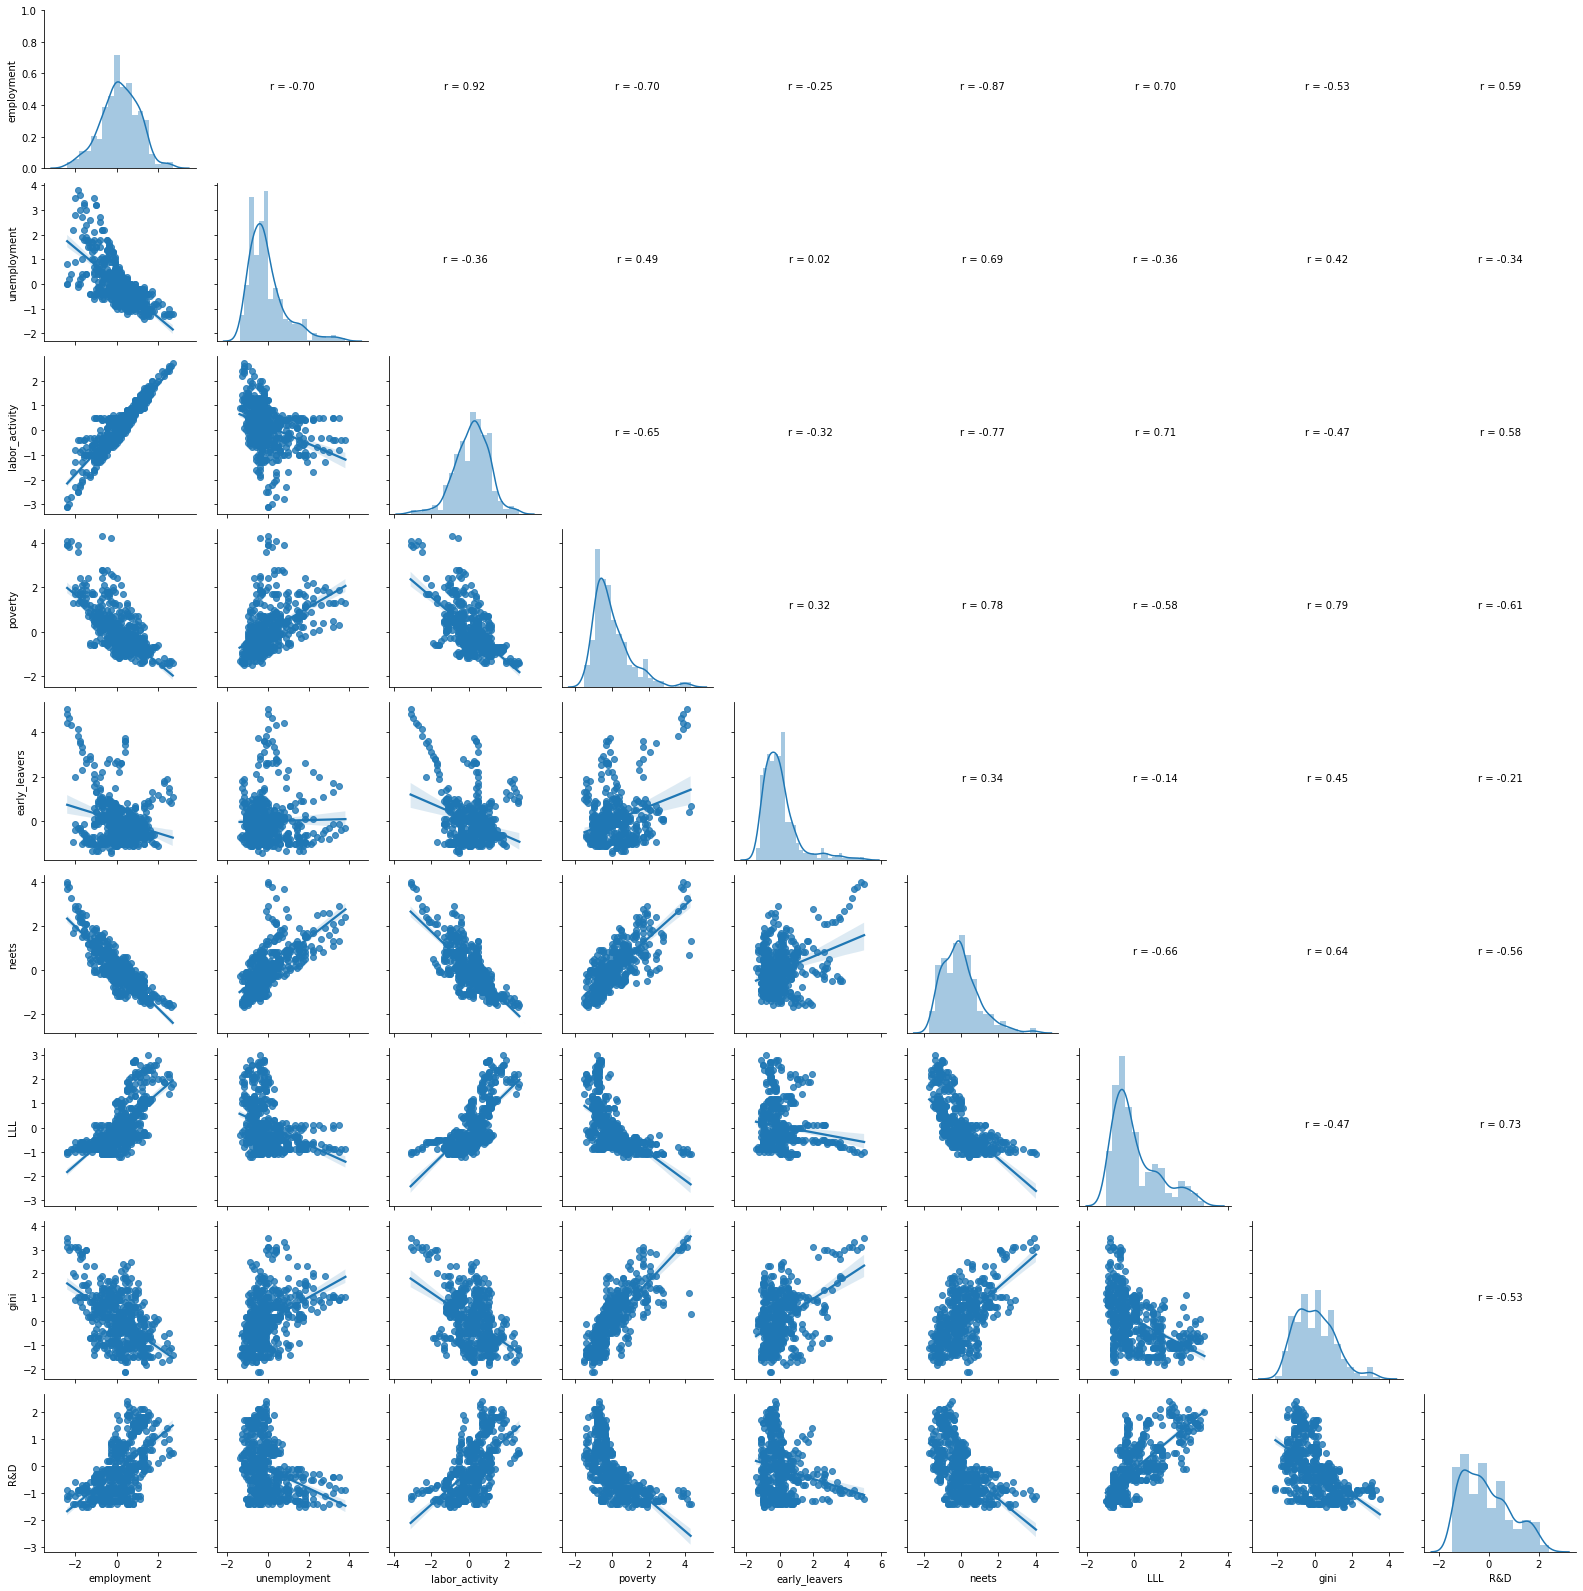

In [50]:
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(df_economics_st.iloc[:,[2,3,4,5,6,7,8,9,10]])
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

<p style="color:black; background-color:white; padding:5px;">The data in the graph provides a huge opportunity for analysis, but given the limitations of this report, the study will concentrate on examining the relationship between the poverty and LLL. The connection between the two indicators is indirect but still logically justified. With low levels of lifelong learning, the workforce fails to keep their knowledge and skills adequate to new market needs. This prevents them from working in highly paid jobs that rely on skilled labor that keeps their knowledge and skills up to date. However, poverty is influenced by many other factors, so the relationship between the two indicators is more complex, which suggests its in-depth study.</p>

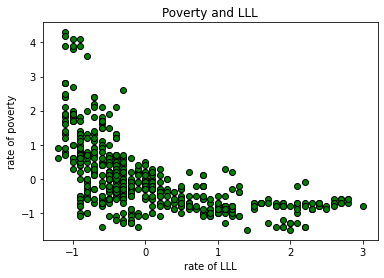

In [51]:
plt.scatter(df_economics_st["LLL"], df_economics_st["poverty"], color="green",edgecolor="black" )
plt.title("Poverty and LLL")
plt.xlabel("rate of LLL")
plt.ylabel("rate of poverty")
plt.show()

In [52]:
X_economics= df_economics_st[['LLL']].values
y_economics=df_economics_st[['poverty']].values
X_train_ec, X_test_ec, y_train_ec, y_test_ec = train_test_split(X_economics,y_economics ,train_size=0.8, random_state = 42)

In [54]:
def regression_models (df, X_train, y_train, X_test, y_test):
    dict_reg= {}
    
    cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

    regressors = [
        KNeighborsRegressor(),
        GradientBoostingRegressor(),
        ExtraTreesRegressor(),
        RandomForestRegressor(),
        DecisionTreeRegressor(),
        LinearRegression(),
        Lasso(),
        Ridge(),
        RANSACRegressor(base_estimator=LinearRegression()),
        ElasticNet(),
        TheilSenRegressor()
    ]

    for model in regressors:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
        print(model)
        print(f"\tExplained variance: {explained_variance_score(y_test, y_pred):.3f}")
        print(f"\tMean absolute error: {mean_absolute_error(y_test, y_pred):.3f}")
        print(f"\tMean squared error: {mean_squared_error(y_test, y_pred):.3f}")
        print(f"\tRandom mean squared error: {mean_squared_error(y_test, y_pred, squared=False):.3f}")        
        print(f"\tmean R2 score: {mean(scores):.3f}")
        print()
        
        dict_reg.update({model:mean(scores)})
        maximum11  = max(dict_reg, key=dict_reg.get)
       
    print(f" With the best result in terms of coefficient of determination is a model: {maximum11}, с R2: {dict_reg[maximum11]}")
    
    plt.scatter(X_train, y_train, color = "red")
    plt.plot(X_train, model.predict(X_train), color = "blue", label=(f"{maximum11} - R2: {dict_reg[maximum11]:.3f}"))

    plt.title("Poverty vs LLL (Training set)")
    plt.xlabel("rate of LLL")
    plt.ylabel("rate of Poverty")
    plt.legend()
    plt.show()

KNeighborsRegressor()
	Explained variance: 0.539
	Mean absolute error: 0.550
	Mean squared error: 0.617
	Random mean squared error: 0.786
	mean R2 score: 0.386

GradientBoostingRegressor()
	Explained variance: 0.596
	Mean absolute error: 0.486
	Mean squared error: 0.537
	Random mean squared error: 0.733
	mean R2 score: 0.453

ExtraTreesRegressor()
	Explained variance: 0.593
	Mean absolute error: 0.489
	Mean squared error: 0.540
	Random mean squared error: 0.735
	mean R2 score: 0.449

RandomForestRegressor()
	Explained variance: 0.592
	Mean absolute error: 0.495
	Mean squared error: 0.544
	Random mean squared error: 0.737
	mean R2 score: 0.451

DecisionTreeRegressor()
	Explained variance: 0.593
	Mean absolute error: 0.490
	Mean squared error: 0.541
	Random mean squared error: 0.736
	mean R2 score: 0.449

LinearRegression()
	Explained variance: 0.354
	Mean absolute error: 0.621
	Mean squared error: 0.856
	Random mean squared error: 0.925
	mean R2 score: 0.292

Lasso()
	Explained variance

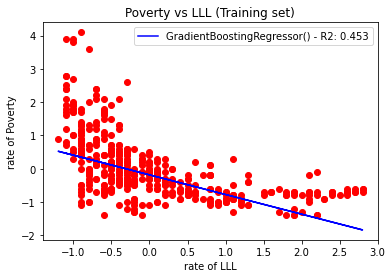

In [55]:
regression_models(df_economics_st, X_train_ec, y_train_ec, X_test_ec, y_test_ec)

<p style="color:black; background-color:white; padding:5px;">The results show that the GradientBoostingRegressor model gives the best result. Lets see is it possible to boost its result in the next step.</p>

---

<h3 style="color:black; background-color:white; padding:10px; margin-bottom:-10px">Step three. Boosting the parameters of best method</h3>
<p style="color:black; background-color:white; padding:5px;">In the previous step, we saw that GradientBoostingRegressor model is the best in regression metrics. Let us now optimize its hyperparameters.</p>

In [57]:
param1 = {'n_estimators': [200,500,1000],           
          'max_depth': [1,3,5],           
          'min_samples_split': [1,3,5],           
          'learning_rate': [0.01,0.02,0.03]}

model_gradienboosting_best = GridSearchCV(estimator = GradientBoostingRegressor(), 
                        param_grid = param1, 
                        scoring= 'r2',cv = 2)      

# fit the model
result_gb_best = model_gradienboosting_best.fit(X_train_ec, y_train_ec) 
print('Best Score: %s' % result_gb_best.best_score_)
print('Best Hyperparameters: %s' % result_gb_best.best_params_)
print('R2  %s' % result_gb_best.score(X_test_ec, y_test_ec))

Best Score: 0.4699550178949444
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 1, 'min_samples_split': 3, 'n_estimators': 500}
R2  0.5719708475425906


<p style="color:black; background-color:white; padding:5px;">Finally, we tested the regression relationship between the poverty rate and the LLL using multiple regression algorithms. The best result gives GradientBoostingRegressor after refining the parameters the result increases, which gives more stability to the model. The result of best_score_ ( the average of r2 scores on left-out test folds for the best parameter combination) is 0.46 .But the score is 0.57 R2. In the next point will check if the polynomial or deep learning can do better.</p>

---

<h3 style="color:black; background-color:white; padding:10px;  margin-bottom:-10px">Step fourth: Polynomial regression</h3>
<p style="color:black; background-color:white; padding:5px;">Since it is evident that the relationship between the poverty level and lifelong learning is not linear, we will therefore use the polynomial regression model. A function has been created to test the possible combinations and their result by a given degree range.</p>

In [65]:
def polynomial_regresion(df, variable1, variable2, degree, train_size, random_state):
    f = plt.figure(figsize=(22,10))
    for i in range(1, degree+1):
        X= df[[variable1]].values.reshape(-1, 1)
        y=df[[variable2]].values.reshape(-1, 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size=train_size, random_state = random_state)

        polynomial_regression = PolynomialFeatures(degree=i)
        X_polynomial = polynomial_regression.fit_transform(X_train)
        linear_regression = LinearRegression()
        linear_regression.fit(X_polynomial, y_train)
        r2 = r2_score(y_train, linear_regression.predict(polynomial_regression.fit_transform(X_train)))

        X_train.sort(axis=0)
        f.add_subplot(2, 3, i)
        plt.scatter(X, y, color='red')
        plt.plot(X_train, linear_regression.predict(polynomial_regression.fit_transform(X_train)), color='blue')
        plt.title('Truth or Bluff (Linear Regression)')
        plt.xlabel('Position level')
        plt.ylabel('Salary')
        plt.text(1, 4, 'R-squared = %0.5f' % r2)
        fig.tight_layout()
    plt.show()

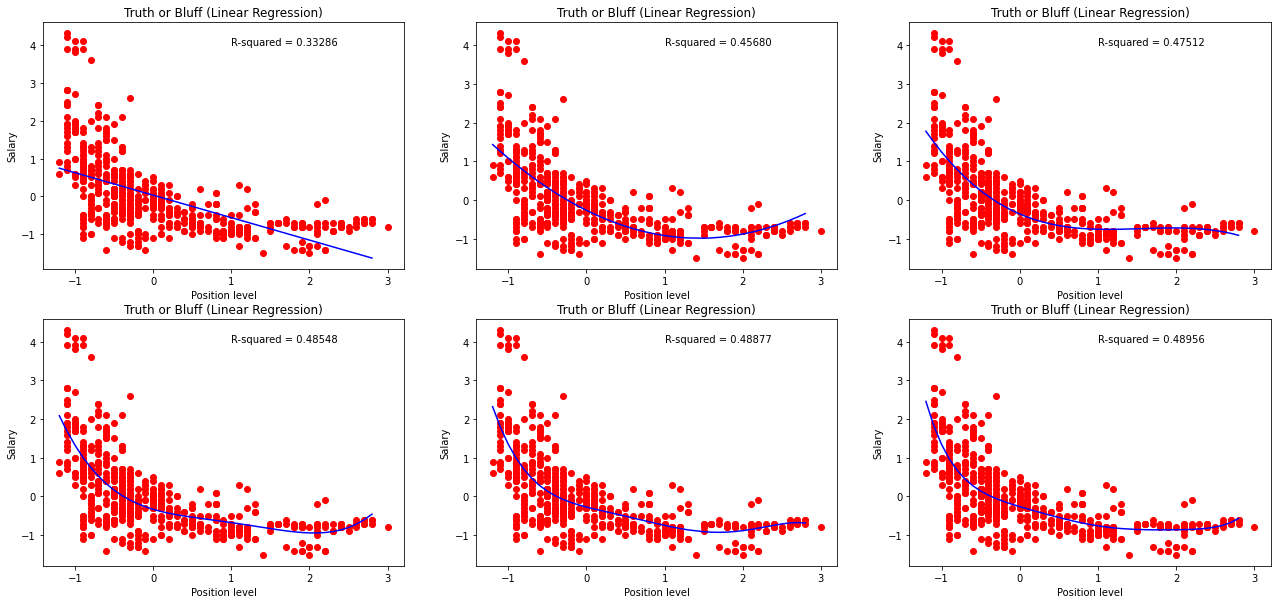

In [66]:
polynomial_regresion(df = df_economics_st, variable1 = 'LLL', variable2 = 'poverty',degree = 6, train_size = 0.8, random_state=42)

<p style="color:black; background-color:white; padding:5px;">Testing variations of the polynomial regression model we see that the best result exceeds 0.49 R2. This is the best result of non-optimized models, we have already seen that GradientBoostingRegressor achieves 0.45 R2. But compared to the optimized GradientBoostingRegressor model which achieves over 0.57 R2, the polynomial performs worse. However, the lack of optimization in the polynomial model allows the results to be better.</p>

---

<h2 style="color:black; background-color:white; padding:10px; margin-bottom:-15px">1.2. Regression models using deep learning</h2>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-7px">In this "advanced approach" ie. using deep learning we will go through the same three steps: </ul>
<li style="color:black; background-color:white; padding:5px">First build simple deep learning model as a basis for further development;</li>
<li style="color:black; background-color:white; padding:5px">Second, create model for testing alogitm for standardization/normalization of data;</li>
<li style="color:black; background-color:white; padding:5px">Third, build more complex deep learning model;</li>
<li style="color:black; background-color:white; padding:5px">Fourth, tune the regresion model for best results;</li>

<p style="color:black; background-color:white; padding:5px;">Let's first drop all missing values without doing any standardization or normalization of the given ones beforehand. As a result, we have a database with no missing data with values on the original scales.</p>

In [73]:
df_no_missing = df_economics.dropna()
df_no_missing

country  Date  employment  unemployment  labor_activity  poverty  \
1178   Denmark  2004        76.0           5.3            80.2     16.8   
1182     Italy  2004        57.8           8.0            62.8     25.3   
1183    Norway  2004        75.3           4.3            78.7     16.2   
1185  Portugal  2004        67.8           6.7            72.6     22.6   
1186   Estonia  2004        63.2          10.6            70.7     25.3   
...        ...   ...         ...           ...             ...      ...   
2067    Serbia  2020        61.3           9.5            67.7     29.8   
2069  Slovenia  2020        70.9           5.0            74.6     15.7   
2070    Sweden  2020        75.5           8.5            82.5     16.1   
2081    Turkey  2020        47.5          13.4            54.9     38.6   
2085  Slovakia  2020        67.5           6.8            72.4     13.8   

      early_leavers  neets   LLL  gini   R&D  
1178            8.8    7.2  25.6  23.9  2.42  
1182           23.1   20.6   6.3  32.9  1.05  
1183            4.7   10.4  17.4  25.2  1.54  
1185           39.3   12.4   4.2  37.8  0.73  
1186           13.9   16.5   6.6  37.4  0.85  
...             ...    ...   ...   ...   ...  
2067            5.6   20.7   3.7  33.3  0.91  
2069            4.1    9.5   8.4  23.5  2.14  
2070            7.7    7.6  28.6  26.9  3.49  
2081           26.7   33.6   5.8  43.4  1.09  
2085            7.6   17.7   2.8  20.9  0.90  

[546 rows x 11 columns]

<p style="color:black; background-color:white; padding:5px;">Let's take a visual look once again at what lifelong learning rates and poverty rates look like for the period under study.</p>

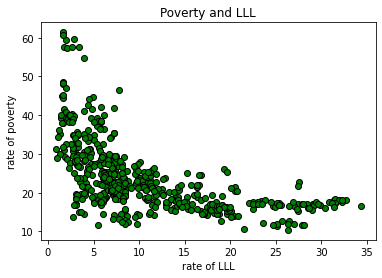

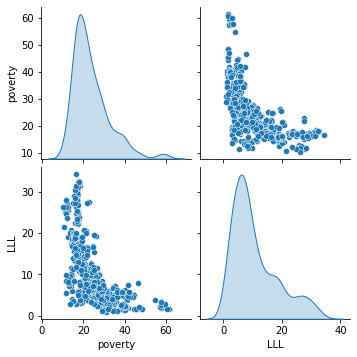

In [176]:
plt.scatter(df_no_missing["LLL"], df_no_missing["poverty"], color="green",edgecolor="black" )
plt.title("Poverty and LLL")
plt.xlabel("rate of LLL")
plt.ylabel("rate of poverty")
plt.show()
sns.pairplot(df_no_missing[['poverty', 'LLL']], diag_kind='kde')
plt.show()

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step one. Build simpple model</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this substep, we will move on to examining dependencies between rates of life long learning and poverty</ul>
<li style="color:black; background-color:white; padding:5px">first - will make the basic preparations in the way that the databases will be divided to training and test part and will be created in relation to 0.8 to 0.2.</li>
<li style="color:black; background-color:white; padding:5px">second, a relationship between the two variables will be investigated by creating basic regression models;</li>
<li style="color:black; background-color:white; padding:5px">third, will create dictionary for saving the regresion results from all deep learning models;</li>

In [71]:
def prepare_data(df, train_fraq, random_state, variable1, variable2):
    
    train_df = df.sample(frac=train_fraq, random_state=random_state)
    test_df = df.drop(train_df.index)

    x_train = train_df[variable1]
    x_test = test_df[variable1]

    y_train = train_df[variable2]
    y_test = test_df[variable2]
    
    return train_df, test_df, x_train, x_test, y_train, y_test

In [74]:
train_df, test_df, x_train, x_test, y_train, y_test = prepare_data(df_no_missing, train_fraq=0.80, random_state=42, variable1="LLL", variable2="poverty")

<p style="color:black; background-color:white; padding:5px;">After creating both the training and test parts of the database, we created both the x and y varieties of the training and test parts to participate in the deep learning regression models. Let's now look at the descriptive statistics of the original database, cleaned of missing values, of the training and test data.</p>

In [173]:
df_no_missing.describe().transpose()

count         mean       std      min       25%      50%  \
Date            546.0  2012.567766  4.676310  2004.00  2009.000  2013.00   
employment      546.0    65.530952  7.576246    44.30    60.725    65.50   
unemployment    546.0     8.724542  4.556417     2.10     5.600     7.70   
labor_activity  546.0    71.680952  6.302046    49.00    67.800    72.10   
poverty         546.0    23.695788  8.864944    10.40    17.425    21.30   
early_leavers   546.0    12.176007  7.489072     2.20     7.400    10.60   
neets           546.0    15.227289  6.264009     4.50    10.400    14.50   
LLL             546.0    10.715751  7.795457     0.90     5.100     8.00   
gini            546.0    30.178938  4.498148    20.90    26.625    29.90   
R&D             546.0     1.560733  0.856480     0.32     0.830     1.39   

                      75%      max  
Date            2017.0000  2020.00  
employment        71.0750    86.60  
unemployment      10.3000    27.70  
labor_activity    75.8000    89.30  
poverty           27.6000    61.40  
early_leavers     14.0000    48.80  
neets             18.4000    41.10  
LLL               14.8750    34.30  
gini              33.1000    44.90  
R&D                2.1575     3.73

In [174]:
train_df.describe().transpose()

count         mean       std      min      25%      50%  \
Date            437.0  2012.485126  4.678458  2004.00  2009.00  2013.00   
employment      437.0    65.755378  7.408624    44.30    61.00    65.70   
unemployment    437.0     8.496339  4.182789     2.10     5.60     7.70   
labor_activity  437.0    71.753089  6.271895    49.10    67.70    72.30   
poverty         437.0    23.241648  8.593648    10.40    17.40    21.10   
early_leavers   437.0    12.099085  7.405639     2.20     7.30    10.60   
neets           437.0    14.975057  6.003328     4.50    10.40    14.20   
LLL             437.0    10.810526  7.705817     0.90     5.50     8.10   
gini            437.0    29.933410  4.450727    20.90    26.40    29.60   
R&D             437.0     1.580435  0.870762     0.32     0.83     1.41   

                    75%      max  
Date            2017.00  2020.00  
employment        71.10    86.60  
unemployment      10.20    25.10  
labor_activity    75.90    89.30  
poverty           26.90    61.40  
early_leavers     13.90    46.90  
neets             17.60    41.10  
LLL               15.30    34.30  
gini              32.80    44.20  
R&D                2.16     3.73

In [175]:
test_df.describe().transpose()

count         mean       std      min      25%      50%  \
Date            109.0  2012.899083  4.674487  2004.00  2009.00  2013.00   
employment      109.0    64.631193  8.188426    44.60    58.80    64.50   
unemployment    109.0     9.639450  5.751474     2.60     5.40     7.50   
labor_activity  109.0    71.391743  6.442712    49.00    68.20    71.80   
poverty         109.0    25.516514  9.708544    11.60    17.90    22.30   
early_leavers   109.0    12.484404  7.842349     2.80     7.50    11.10   
neets           109.0    16.238532  7.156917     5.40    10.40    15.20   
LLL             109.0    10.335780  8.170640     1.00     4.40     7.60   
gini            109.0    31.163303  4.572961    20.90    27.90    31.10   
R&D             109.0     1.481743  0.795545     0.35     0.84     1.34   

                    75%      max  
Date            2017.00  2020.00  
employment        70.50    84.60  
unemployment      12.90    27.70  
labor_activity    75.40    87.10  
poverty           31.20    60.60  
early_leavers     15.60    48.80  
neets             20.40    40.80  
LLL               14.30    31.40  
gini              34.00    44.90  
R&D                2.15     3.47

<p style="color:black; background-color:white; padding:5px;">The data from the tables show on the one hand that there is a clear division 80% training and 20% test part, and on the other hand that their statistical parameters are approximately the same. This is important so that there is no confusion of the result due to a disparity in the data.</p>

<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">Before starting with the basic model, we will create two functions and a dictionary, which will be used in the other more complex models in the next steps of building the most optimal regression model based on neural networks and deep learning. </ul>
<li style="color:black; background-color:white; padding:5px">The first function will visualize the change in the underlying regression metrics during training at each epoch;</li>
<li style="color:black; background-color:white; padding:5px">The second function will visualize the regression prediction line;</li>
<li style="color:black; background-color:white; padding:5px">The dictionary will collect the data from each model based on their score, so that these results can then be compared;</li>

In [110]:
def plot_metrics(history):
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(18,8))    
    ax1.plot(history.history['loss'], label='Train loss')
    ax1.plot(history.history['val_loss'], label='Validation loss')
    ax1.set_ylim([0, 10])
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Error [poverty]')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(history.history['r_square'], label='Train r_square')
    ax2.plot(history.history['val_r_square'], label='Validation r_square')
    ax2.set_ylim([0, 1])
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('R2 [poverty]')
    ax2.legend()
    ax2.grid(True)  
    
    ax3.plot(history.history['mse'], label='Train mse')
    ax3.plot(history.history['val_mse'], label=' Validation mse') 
    ax3.set_ylim([0, 100])
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('mse [poverty]')
    ax3.legend()
    ax3.grid(True) 
    
    ax4.plot(history.history['mae'], label='Train mae')
    ax4.plot(history.history['val_mae'], label='Validation mae') 
    ax4.set_ylim([0, 10])
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('mae [poverty]')
    ax4.legend()
    ax4.grid(True) 
    
    ax5.plot(history.history['mape'], label='Train mape')
    ax5.plot(history.history['val_mape'], label='Validation mape') 
    ax5.set_ylim([0, 30])
    ax5.set_xlabel('Epoch')
    ax5.set_ylabel('mape [poverty]')
    ax5.legend()
    ax5.grid(True) 

    plt.tight_layout()
    plt.show()
    
def plot_model(x, y):
    plt.scatter(x_test, y_test, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('rate of poverty')
    plt.ylabel('rate of LLL')
    plt.legend()

test_results = {}

<p style="color:black; background-color:white; padding:5px;">Let's create a basic model with input and output layer, we will use for loss function mean absolute error, for optimizer Adam with learning rate equal to 0.01 and for metrics, apart from the main ones, we will also use r square.</p>

In [103]:
simple_model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
    layers.Dense(units=1),
])

simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics = [tfa.metrics.r_square.RSquare() ,'mse', 'mae', 'mape']
)
simple_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [104]:
%%time
history_simple_model = simple_model.fit(
    x_train, y_train,
    validation_split = 0.2,
    batch_size=10,
    epochs=100,
    verbose=0,
)

Wall time: 8.62 s


In [105]:
history_simple_model_df = pd.DataFrame(history_simple_model.history)
history_simple_model_df['epoch'] = history_simple_model.epoch
history_simple_model_df.tail()

loss  r_square        mse       mae       mape  val_loss  \
95  5.256935  0.308471  57.202442  5.256935  21.969831  5.314770   
96  5.231694  0.325291  55.811298  5.231694  22.137978  5.187815   
97  5.264091  0.310723  57.016354  5.264091  21.960411  5.192085   
98  5.253472  0.321092  56.158478  5.253472  22.199923  5.222690   
99  5.246768  0.318924  56.337894  5.246768  21.972385  5.194292   

    val_r_square    val_mse   val_mae   val_mape  epoch  
95      0.268813  48.493557  5.314770  24.157030     95  
96      0.274785  48.097496  5.187815  22.956211     96  
97      0.276732  47.968372  5.192085  23.046112     97  
98      0.275263  48.065800  5.222690  23.398310     98  
99      0.277030  47.948612  5.194292  23.083355     99

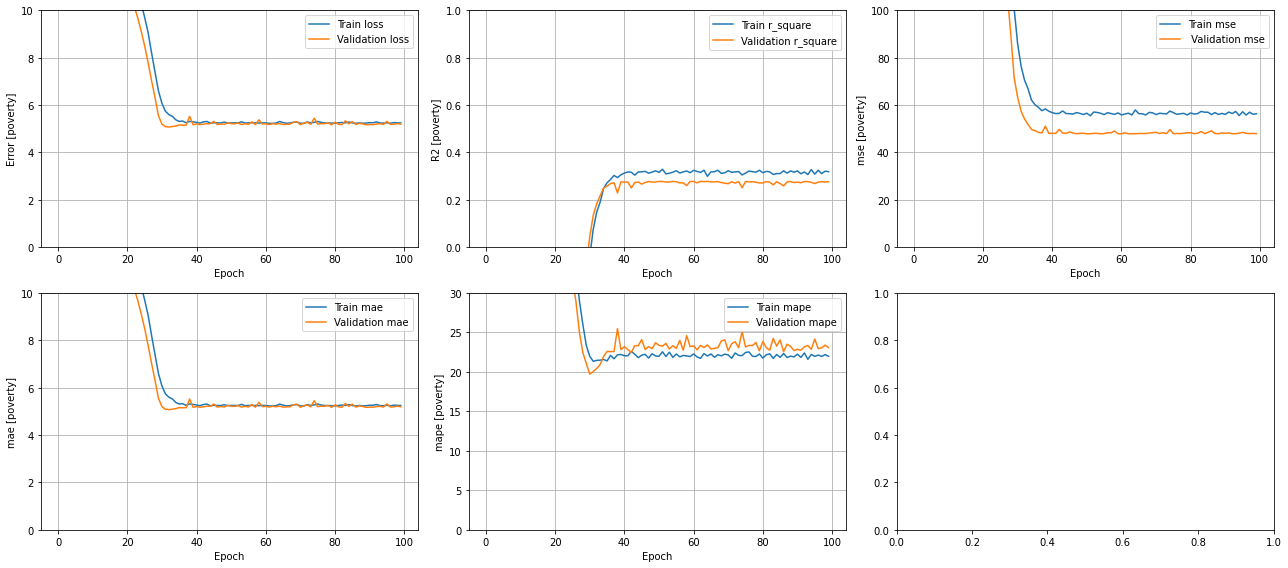

In [111]:
plot_metrics(history_simple_model)

2/2 [==============================] - 0s 2ms/step


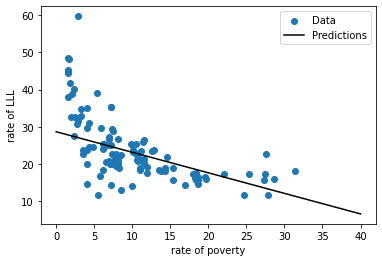

In [107]:
x = tf.linspace(0, 40, 40)
y_simple_model = simple_model.predict(x)
plot_model(x, y_simple_model)

<p style="color:black; background-color: white; padding:5px;">Lets see the resultas of the simple model</p>

In [158]:
test_results['simple_model'] = simple_model.evaluate(
x_test, y_test, verbose=0)

df_results = pd.DataFrame(test_results).T
df_results = df_results.rename(columns={0: 'loss', 1: 'R2', 2: 'mse', 3: 'mae', 4:"mape"})
df_results

loss        R2        mse       mae       mape
model_normalization  4.816889  0.338569  49.052704  4.816889  19.888180
model_complex        4.110958  0.500610  37.035526  4.110958  17.314785
simple_model         4.837427  0.336082  49.237129  4.837427  20.018219

<p style="color:black; background-color: white; padding:5px;">In the first model, no specific type of activation function is specified, which means that by default it is linear. A linear model cannot handle this type of data well, which is to be expected. R2 is just over 0.33, which is better than the linear model in traditional models which had a value of 0.29 and that too with scaled data. from loss graph we see that there is no overfiting or underfiting of the model. After the 35th epoch, the remaining indicators in the other graphs reach their equilibrium position and their values do not change.</p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step two. Build model based on normalization</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this substep, we will move on to examining dependencies between rates of life long learning and poverty</ul>
<li style="color:black; background-color:white; padding:5px">first - will make the basic preparations in the way that the databases use alogitm for standardization/normalization of data;.</li>
<li style="color:black; background-color:white; padding:5px">second, a relationship between the two variables will be investigated by creating the same basic regression model from the previous step but using normalization algorithm;</li>
<li style="color:black; background-color:white; padding:5px">third, will save the regresion results and compare it with the basic model;</li>

In [109]:
x_train_array = np.array(x_train)
x_train_normal = layers.Normalization(input_shape=[1,], axis=None)
x_train_normal.adapt(x_train_array)

In [130]:
model_normalization = tf.keras.Sequential([
    x_train_normal,
    layers.Dense(units=1)
])

model_normalization.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics = [tfa.metrics.r_square.RSquare() ,'mse', 'mae', 'mape']
)

model_normalization.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [113]:
model_normalization.predict(x_train_array[:10])

1/1 [==============================] - 0s 47ms/step


array([[ 0.5038723 ],
       [-3.194333  ],
       [-1.6168994 ],
       [ 0.67914265],
       [-4.1057386 ],
       [ 1.1874268 ],
       [-2.1251833 ],
       [-0.512696  ],
       [ 1.6256027 ],
       [ 0.48634514]], dtype=float32)

<p style="color:black; background-color: white; padding:5px;">we see that the data normalization is successful</p>

In [131]:
%%time
history_model_normalization = model_normalization.fit(
    x_train,
    y_train,
    epochs=100,
    verbose=0,
    batch_size=5,
    validation_split = 0.2)

Wall time: 12.3 s


In [132]:
history_df_model_normalization= pd.DataFrame(history_model_normalization.history)
history_df_model_normalization['epoch'] = history_model_normalization.epoch
history_df_model_normalization.tail()

loss  r_square        mse       mae       mape  val_loss  \
95  5.219107  0.323605  55.950539  5.219107  21.858225  5.197725   
96  5.217972  0.323298  55.976170  5.217972  21.851559  5.195713   
97  5.219600  0.323134  55.989788  5.219600  21.851702  5.197494   
98  5.218034  0.323273  55.978062  5.218034  21.851028  5.195507   
99  5.219219  0.322533  56.039444  5.219219  21.826731  5.193295   

    val_r_square    val_mse   val_mae   val_mape  epoch  
95      0.277051  47.947079  5.197725  23.118668     95  
96      0.276944  47.954212  5.195713  23.093643     96  
97      0.277106  47.943443  5.197494  23.116930     97  
98      0.276976  47.952065  5.195507  23.092567     98  
99      0.276767  47.965939  5.193295  23.060549     99

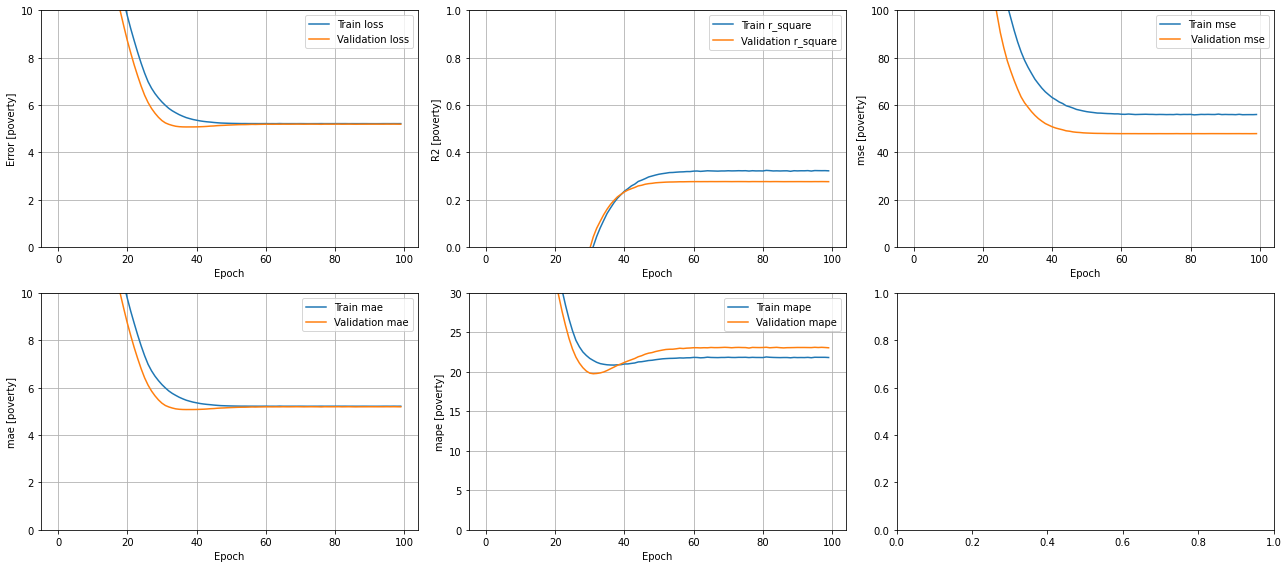

In [133]:
plot_metrics(history_model_normalization)

2/2 [==============================] - 0s 5ms/step


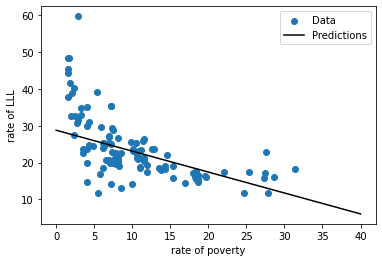

In [134]:
y_model_normalization = model_normalization.predict(x)
plot_model(x, y_model_normalization)

<p style="color:black; background-color: white; padding:5px;">Lets see the resultas of the simple model</p>

In [135]:
test_results['model_normalization'] = model_normalization.evaluate(
x_test, y_test, verbose=0)

df_results = pd.DataFrame(test_results).T
df_results = df_results.rename(columns={0: 'loss', 1: 'R2', 2: 'mse', 3: 'mae', 4:"mape"})
df_results

loss        R2        mse       mae      mape
model_normalization  4.816889  0.338569  49.052704  4.816889  19.88818

<p style="color:black; background-color: white; padding:5px;">By normalizing the data, we managed to slightly improve the result in the previous model. P2 changes from 0.336 to 0.339.</p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step three. Build complex regresion model</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this substep, we will create more complex deep leartning regresion model and will compare results with the simple ones:</ul>
<li style="color:black; background-color:white; padding:5px">first - will create more complec model based on more hidden layers</li>
<li style="color:black; background-color:white; padding:5px">second, a relationship between the two variables will be analyzed and visuzlized using the data normalization from previous step;</li>
<li style="color:black; background-color:white; padding:5px">third, will save the regresion results and compare it with the previous models;</li>

In [152]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics = [tfa.metrics.r_square.RSquare() ,'mse', 'mae', 'mape'])
    model.summary()
    return model

In [153]:
model_complex = build_and_compile_model(x_train_normal)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense_25 (Dense)            (None, 64)                128       
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [154]:
%%time
history_model_complex = model_complex.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, 
    batch_size=30,
    epochs=100)

Wall time: 5.72 s


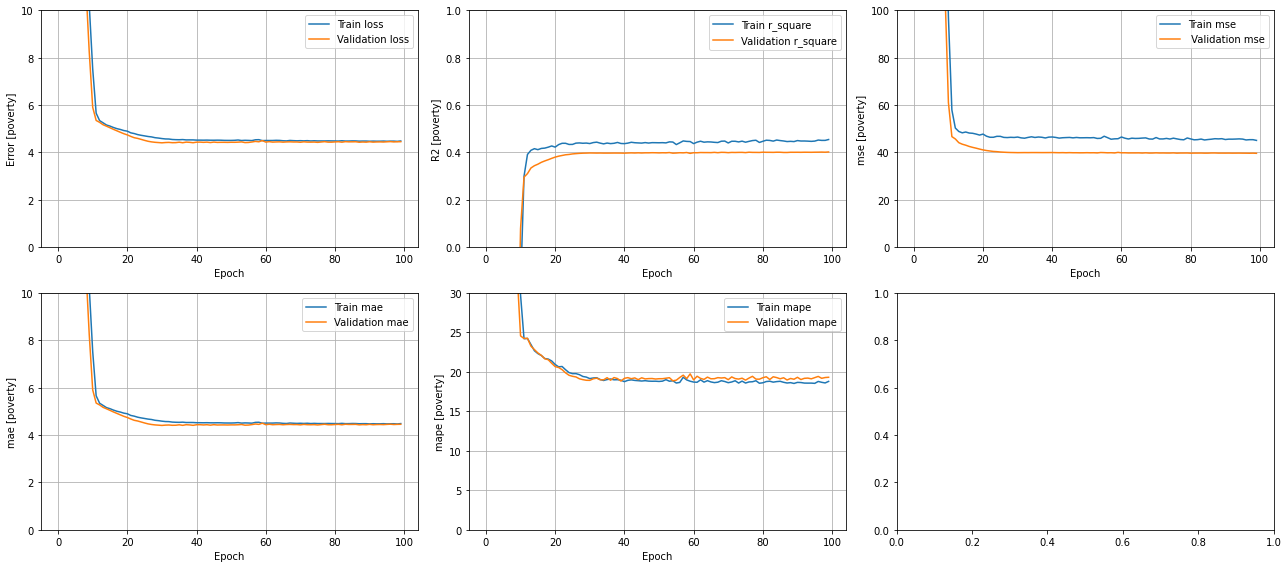

In [155]:
plot_metrics(history_model_complex)

2/2 [==============================] - 0s 4ms/step


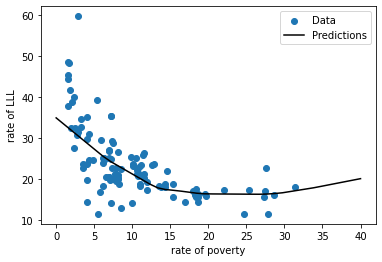

In [156]:
y_model_complex = model_complex.predict(x)
plot_model(x, y_model_complex)

<p style="color:black; background-color: white; padding:5px;">Lets see the resultas of the regresion models till now</p>

In [159]:
test_results['model_complex'] = model_complex.evaluate(
    x_test, y_test,
    verbose=0)

df_results = pd.DataFrame(test_results).T
df_results = df_results.rename(columns={0: 'loss', 1: 'R2', 2: 'mse', 3: 'mae', 4:"mape"})
df_results

loss        R2        mse       mae       mape
model_normalization  4.816889  0.338569  49.052704  4.816889  19.888180
model_complex        4.110958  0.500610  37.035526  4.110958  17.314785
simple_model         4.837427  0.336082  49.237129  4.837427  20.018219

<p style="color:black; background-color: white; padding:5px;">This model shows significantly better results. Not only compared to previous simple deep learning models, but also compared to traditional models. This model's score of just over 0.50 R2 is more than all traditional non-optimized models, including polynomial ones.</p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step fourth. Tune the regresion model</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-5px">In this substep, we will tune and model and algotithm hyperparameters and compare the results with the previons models: </ul>
<li style="color:black; background-color:white; padding:5px">first, model will be created to optimize only learning rate and the results of the best model will be displayed. Will see the diference using get_best_model and get_best_hyperparameters;</li>
<li style="color:black; background-color:white; padding:5px">second, model with tuning all hyperparameters will be build and the results of the best model will be displayed;</li>
<li style="color:black; background-color:white; padding:5px">third, will save the regresion results and compare it with the previous models;</li>

In [161]:
def model_builder_optimal_rate(hp): 
    model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
    
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4]) 

    optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate)

    model.compile(loss='mean_absolute_error',
                optimizer=optimizer,
                metrics = [tfa.metrics.r_square.RSquare() ,'mse', 'mae', 'mape'])
    return model

In [163]:
tuner_optimal_rate = kt.RandomSearch(
    model_builder_optimal_rate,                
    objective = kt.Objective("val_r_square", direction="max"),            
    seed = 42,                    
    max_trials = 3,                
    directory='random_search',
    project_name="tuner_optimal_rate",
    overwrite=True)

tuner_optimal_rate.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}


In [164]:
%%time
tuner_optimal_rate.search(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

INFO:tensorflow:Oracle triggered exit
Wall time: 25.9 s


In [165]:
tuner_optimal_rate.results_summary()

Results summary
Results in random_search\tuner_optimal_rate
Showing 10 best trials
Trial summary
Hyperparameters:
learning_rate: 0.1
Score: 0.42815327644348145
Trial summary
Hyperparameters:
learning_rate: 0.001
Score: 0.40506649017333984
Trial summary
Hyperparameters:
learning_rate: 0.0001
Score: -3.7943849563598633


In [166]:
best_model_optimal_rate = tuner_optimal_rate.get_best_models(num_models=1)[0]
best_model_optimal_rate.build(input_shape=[None,1])
best_model_optimal_rate.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


2/2 [==============================] - 0s 3ms/step


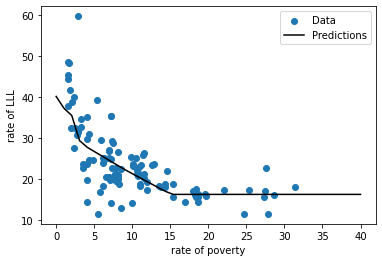

In [167]:
y_best_model_optimal_rate = best_model_optimal_rate.predict(x)
plot_model(x, y_best_model_optimal_rate)

<p style="color:black; background-color: white; padding:5px;">Lets see the resultas of the regresion models till now</p>

In [168]:
test_results['best_model_optimal_rate'] = best_model_optimal_rate.evaluate(
    x_test, y_test,
    verbose=0)
df_results = pd.DataFrame(test_results).T
df_results = df_results.rename(columns={0: 'loss', 1: 'R2', 2: 'mse', 3: 'mae', 4:"mape"})
df_results

loss        R2        mse       mae       mape
model_normalization      4.816889  0.338569  49.052704  4.816889  19.888180
model_complex            4.110958  0.500610  37.035526  4.110958  17.314785
simple_model             4.837427  0.336082  49.237129  4.837427  20.018219
best_model_optimal_rate  3.819535  0.576927  31.375692  3.819535  16.503820

<p style="color:black; background-color: white; padding:5px;">This model shows the best results. The R2 score of 0.577 is higher than even the optimal Gradienbooster model with a R2 score of 0.571.:</p>

<p style="color:black; background-color: white; padding:5px;">Only in this model will we show the difference between using the best model and using the best parameters. Essentially get_best_models() gives the best hyperparameters + the weights stored at the best epoch. Whereas, get_best_hyperparameters() returns only the best hyperparameters using which you can further train your model on complete training data.</p>

In [169]:
best_hps_model_optimal_rate=tuner_optimal_rate.get_best_hyperparameters(num_trials=1)[0]
print(f"""
    The hyperparameter search is complete. The optimal learning rate for the optimizer
    is {best_hps_model_optimal_rate.get('learning_rate')} 
    """)


    The hyperparameter search is complete. The optimal learning rate for the optimizer
    is 0.1 
    


In [170]:
%%time
best_hps_model_optimal_rate = tuner_optimal_rate.hypermodel.build(best_hps_model_optimal_rate)
history_best_hps_optimal_rate = best_hps_model_optimal_rate.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 5.69 s


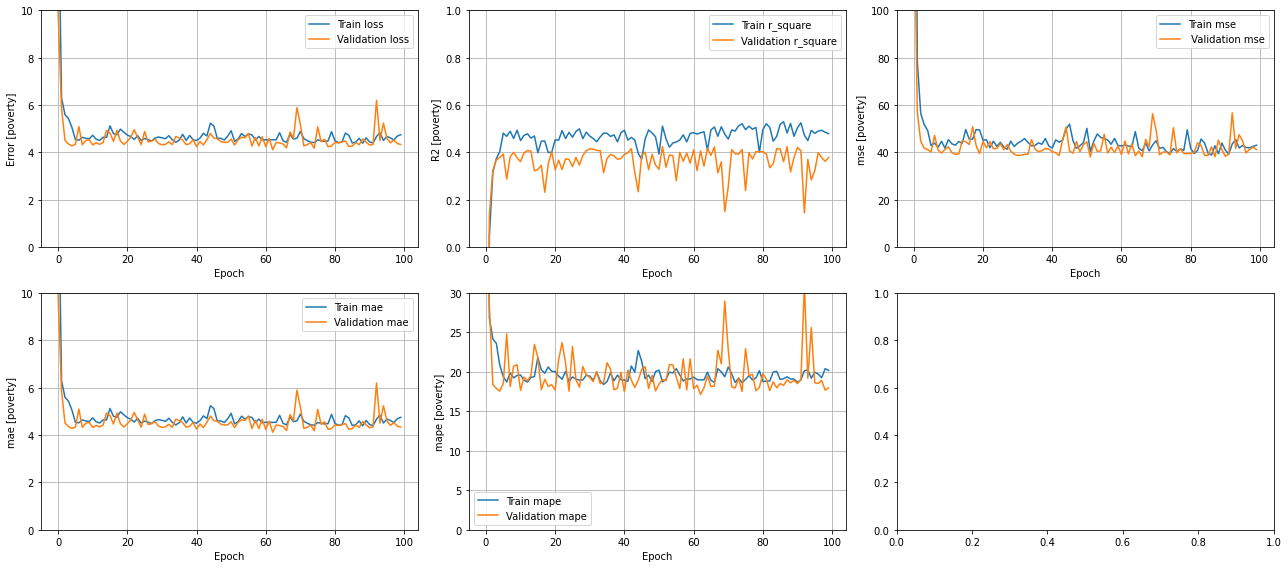

In [171]:
plot_metrics(history_best_hps_optimal_rate)

2/2 [==============================] - 0s 2ms/step


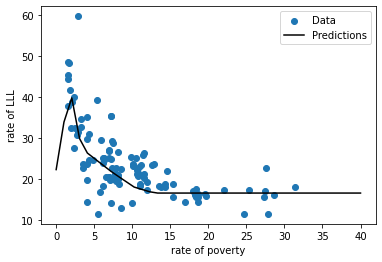

In [172]:
y_best_hps_optimal_rate = best_hps_model_optimal_rate.predict(x)
plot_model(x, y_best_hps_optimal_rate)

<p style="color:black; background-color: white; padding:5px;">Lets see the resultas of the regresion models till now</p>

In [173]:
test_results['best_hps_model_optimal_rate'] = best_hps_model_optimal_rate.evaluate(
    x_test, y_test,
    verbose=0)

df_results = pd.DataFrame(test_results).T
df_results = df_results.rename(columns={0: 'loss', 1: 'R2', 2: 'mse', 3: 'mae', 4:"mape"})
df_results

loss        R2        mse       mae  \
model_normalization          4.816889  0.338569  49.052704  4.816889   
model_complex                4.110958  0.500610  37.035526  4.110958   
simple_model                 4.837427  0.336082  49.237129  4.837427   
best_model_optimal_rate      3.819535  0.576927  31.375692  3.819535   
best_hps_model_optimal_rate  3.879969  0.582481  30.963795  3.879969   

                                  mape  
model_normalization          19.888180  
model_complex                17.314785  
simple_model                 20.018219  
best_model_optimal_rate      16.503820  
best_hps_model_optimal_rate  16.641953

<p style="color:black; background-color: white; padding:5px;">The result proves that the optimized model gives the best results so far.</p>

---

<p style="color:black; background-color: white; padding:5px;">Let's now create an advanced method for hyperparameter tuning.
The optimization will incude the two types of Hyperparameters (1. Model hyperparameters which influence model selection such as the number and width of hidden layers and 2. Algorithm hyperparameters which influence the speed and quality of the learning algorithm such as the learning rate for Stochastic Gradient Descent (SGD) and etc.)</p>

In [174]:
def build_advanced_model(hp):
    model = keras.Sequential()
    
    for i in range(1, hp.Int("num_layers", 2, 6)):
        model.add(
            layers.Dense(
                # Define the hyperparameter.
                units=hp.Int("units", min_value=20, max_value=100, step=10),
                activation=hp.Choice("activation", ["relu", "tanh"])
            )
        )
        model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1)))
        model.add(layers.BatchNormalization())
            
    model.add(
            layers.Dense(
                # Define the hyperparameter.
                units=1,
                activation=hp.Choice("activation", ["relu", "softmax"])
            )
        )      
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
   
    optimizers_dict = {
        "Adam":    Adam(learning_rate=hp_learning_rate),
        "SGD":     SGD(learning_rate=hp_learning_rate),
        }

    hp_optimizers = hp.Choice(
        'optimizer', 
        values=["Adam", "SGD"]
        )

    model.compile(
        optimizer=optimizers_dict[hp_optimizers], loss="mean_absolute_error", metrics = [tfa.metrics.r_square.RSquare() ,'mse', 'mae', 'mape']
    )
    return model

In [175]:
tuner_advanced= kt.RandomSearch(
    build_advanced_model,                
    objective = kt.Objective("val_r_square", direction="max"),            
    seed = 42,                    
    max_trials = 3,                
    directory='random_search',
    project_name="model_advanced",
    overwrite=True)

tuner_advanced.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 100, 'step': 10, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
optimizer (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam', 'SGD'], 'ordered': False}


In [176]:
%%time
tuner_advanced.search(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

INFO:tensorflow:Oracle triggered exit
Wall time: 33.1 s


In [177]:
tuner_advanced.results_summary()

Results summary
Results in random_search\model_advanced
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 2
units: 70
activation: relu
dropout_1: 0.1
learning_rate: 0.001
optimizer: Adam
dropout_2: 0.1
dropout_3: 0.1
dropout_4: 0.1
Score: 0.4029148817062378
Trial summary
Hyperparameters:
num_layers: 4
units: 30
activation: tanh
dropout_1: 0.1
learning_rate: 0.001
optimizer: Adam
dropout_2: 0.30000000000000004
dropout_3: 0.0
dropout_4: 0.30000000000000004
Score: -7.359794616699219
Trial summary
Hyperparameters:
num_layers: 5
units: 20
activation: tanh
dropout_1: 0.1
learning_rate: 0.01
optimizer: SGD
dropout_2: 0.0
dropout_3: 0.0
dropout_4: 0.0
Score: -7.3619384765625


In [178]:
best_model_advanced = tuner_advanced.get_best_models(num_models=1)[0]
best_model_advanced.build(input_shape=[None,1])
best_model_advanced.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                140       
                                                                 
 dropout (Dropout)           (None, 70)                0         
                                                                 
 batch_normalization (BatchN  (None, 70)               280       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1)                 71        
                                                                 
Total params: 491
Trainable params: 351
Non-trainable params: 140
_________________________________________________________________


2/2 [==============================] - 0s 3ms/step


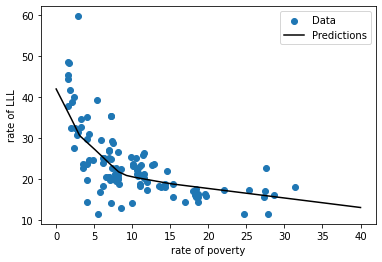

In [179]:
y_best_model_advanced = best_model_advanced.predict(x)
plot_model(x, y_best_model_advanced)

<p style="color:black; background-color: white; padding:5px;">Lets see the resultas of the regresion models till now</p>

In [180]:
test_results['best_model_advanced'] = best_model_advanced.evaluate(
    x_test, y_test,
    verbose=0)

df_results = pd.DataFrame(test_results).T
df_results = df_results.rename(columns={0: 'loss', 1: 'R2', 2: 'mse', 3: 'mae', 4:"mape"})
df_results

loss        R2        mse       mae  \
model_normalization          4.816889  0.338569  49.052704  4.816889   
model_complex                4.110958  0.500610  37.035526  4.110958   
simple_model                 4.837427  0.336082  49.237129  4.837427   
best_model_optimal_rate      3.819535  0.576927  31.375692  3.819535   
best_hps_model_optimal_rate  3.879969  0.582481  30.963795  3.879969   
best_model_advanced          3.907771  0.565338  32.235142  3.907771   

                                  mape  
model_normalization          19.888180  
model_complex                17.314785  
simple_model                 20.018219  
best_model_optimal_rate      16.503820  
best_hps_model_optimal_rate  16.641953  
best_model_advanced          16.979670

<p style="color:black; background-color: white; padding:5px;">This model performs slightly worse due to the random selection of values in the optimization of the hyperparameters. However, a R2 of over 0.56 is very good compared to all other models.</p>

---

<h2 style="color:black; background-color:white; padding:10px; margin-bottom:-25px">2.  Time series analysis </h2>
<h3 style="color:black; background-color:white; padding:10px; margin-bottom:-15px">(Testing the ability of deep learning to deal with, predict and forecast time series economic dynamics.)</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this point, we will go through the basic steps:</ul>
<li style="color:black; background-color:white; padding:5px">First, we will load and we will see the database object of time analysis;</li>
<li style="color:black; background-color:white; padding:5px">Second, аn analysis of missing data will be done;</li>
<li style="color:black; background-color:white; padding:5px">Third, After an analysis of the appropriateness of the unemployment rates of the countries, a country will be selected which will be the subject of analysis in this report;</li>
<li style="color:black; background-color:white; padding:5px">Fourth, we will apply time - series analysis by means of "traditional models" i.e. without using deep learning;</li>
<li style="color:black; background-color:white; padding:5px">Fifth, we will explore the applicability of deep learning for time-series economic analysis;</li>
<li style="color:black; background-color:white; padding:5px">Sixth, we will compare and summarize the results of the regression analysis;</li>

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">First basic step. Loading, tidy and precessing</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this step, we familiarize ourselves with the data, its parameters and elements. Basic manipulations will be performed to help us use and better understand the elements to continue the research in the next steps. It includes the following manipulations: </ul>
<li style="color:black; background-color:white; padding:5px">loading the databasess</li>
<li style="color:black; background-color:white; padding:5px">extraction of uniqueness by features and observations</li>
<li style="color:black; background-color:white; padding:5px">extraction basic information about the datas</li>
<li style="color:black; background-color:white; padding:5px">graphical visualization</li>

<p style="color:black; background-color: white; padding:5px;">let's create a function to load the EU and other countries unemployment rate database by month and load the data.</p>

In [181]:
def load_and_name_db (**kwargs):
    global key
    for key, value in kwargs.items():
        df_name = key
        globals()[df_name] = eurostat.get_data_df(value)
        return globals()[df_name]

In [182]:
load_and_name_db(df_unemployment = "une_rt_m")

s_adj     age     unit sex geo\time  2022M12  2022M11  2022M10  2022M09  \
0      NSA   TOTAL   PC_ACT   F       AT      4.4      5.0      4.6      5.2   
1      NSA   TOTAL   PC_ACT   F       BE      4.8      4.7      4.8      5.1   
2      NSA   TOTAL   PC_ACT   F       BG      3.6      3.5      3.4      3.2   
3      NSA   TOTAL   PC_ACT   F       CH      NaN      NaN      NaN      4.8   
4      NSA   TOTAL   PC_ACT   F       CY      7.9      7.7      5.5      6.1   
...    ...     ...      ...  ..      ...      ...      ...      ...      ...   
1946    TC  Y_LT25  THS_PER   T       SE    148.0    147.0    146.0    145.0   
1947    TC  Y_LT25  THS_PER   T       SI      9.0      9.0      9.0      8.0   
1948    TC  Y_LT25  THS_PER   T       SK     27.0     26.0     27.0     27.0   
1949    TC  Y_LT25  THS_PER   T       TR      NaN   1046.0   1047.0   1041.0   
1950    TC  Y_LT25  THS_PER   T       UK      NaN      NaN      NaN      NaN   

      2022M08  ...  1983M10  1983M09  1983M08  1983M07  1983M06  1983M05  \
0         4.8  ...      NaN      NaN      NaN      NaN      NaN      NaN   
1         5.4  ...      NaN      NaN      NaN      NaN      NaN      NaN   
2         3.3  ...      NaN      NaN      NaN      NaN      NaN      NaN   
3         4.8  ...      NaN      NaN      NaN      NaN      NaN      NaN   
4         8.9  ...      NaN      NaN      NaN      NaN      NaN      NaN   
...       ...  ...      ...      ...      ...      ...      ...      ...   
1946    143.0  ...     70.0     71.0     70.0     69.0     68.0     67.0   
1947      8.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
1948     27.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
1949   1034.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
1950      NaN  ...   1148.0   1148.0   1143.0   1147.0   1157.0   1169.0   

      1983M04  1983M03  1983M02  1983M01  
0         NaN      NaN      NaN      NaN  
1         NaN      NaN      NaN      NaN  
2         NaN      NaN      NaN      NaN  
3         NaN      NaN      NaN      NaN  
4         NaN      NaN      NaN      NaN  
...       ...      ...      ...      ...  
1946     66.0     66.0     65.0     63.0  
1947      NaN      NaN      NaN      NaN  
1948      NaN      NaN      NaN      NaN  
1949      NaN      NaN      NaN      NaN  
1950   1179.0   1176.0   1169.0   1168.0  

[1951 rows x 485 columns]

<p style="color:black; background-color: white; padding:5px;">At first glance, we see a table with 1951 rows and 485 columns. Let's look at the data in detail using the functions already created in the regression.</p>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Extraction of uniqueness by columns and elements</h4>
<p style="color:black; background-color:white; padding:5px;">
After loading databases, especially when they are large, it is important to get familiar with features and observations in them. In this way, we will understand what the "idea" of the database is and what can and should be done with it in terms of meaningful content.</p>

In [183]:
uniques(df_unemployment)

Names of columns (features): 
Index(['s_adj', 'age', 'unit', 'sex', 'geo\time', '2022M12', '2022M11',
       '2022M10', '2022M09', '2022M08',
       ...
       '1983M10', '1983M09', '1983M08', '1983M07', '1983M06', '1983M05',
       '1983M04', '1983M03', '1983M02', '1983M01'],
      dtype='object', length=485)

Elements of columns (observations): "s_adj": 
 ['NSA' 'SA' 'TC']
Number of elements of columns (observations): "s_adj": 
 3

Elements of columns (observations): "age": 
 ['TOTAL' 'Y25-74' 'Y_LT25']
Number of elements of columns (observations): "age": 
 3

Elements of columns (observations): "unit": 
 ['PC_ACT' 'THS_PER']
Number of elements of columns (observations): "unit": 
 2

Elements of columns (observations): "sex": 
 ['F' 'M' 'T']
Number of elements of columns (observations): "sex": 
 3

Elements of columns (observations): "geo\time": 
 ['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EA19' 'EA20' 'EE' 'EL' 'ES'
 'EU27_2020' 'FI' 'FR' 'HR' 'HU' 'IE' 'IS' 'IT' 'JP' 'LT' 'LU' 'LV' 

<p style="color:black; background-color: white; padding:5px;">The data above show us that unemployment is measured according to many different demographic types - age, gender, as well as measurement units. We also already know countries and a time period with a length of 485 cases.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Extraction of basic information about the data</h4>
<p style="color:black; background-color:white; padding:5px;">
Parallel to the previous substep, it is important to outline the database parameters such as size, number of cases, data type, etc. In this way, we will understand what the "idea" of the database is and what can and should be done with it in terms of technical content.</p>

In [184]:
db_info(df_unemployment)

1. Оbservations and features: 
 1951 Оbservations and 485 features
------------------------------------------------------
2. Number of cases in the table: 946235
------------------------------------------------------
3. The sum of element types by type is as follows: 
 object       5
float64    480
dtype: int64
------------------------------------------------------
4. Group the features by data type:
 object = ['s_adj', 'age', 'unit', 'sex', 'geo\\time'] 

 int = [] 

 float64 = ['2022M12', '2022M11', '2022M10', '2022M09', '2022M08', '2022M07', '2022M06', '2022M05', '2022M04', '2022M03', '2022M02', '2022M01', '2021M12', '2021M11', '2021M10', '2021M09', '2021M08', '2021M07', '2021M06', '2021M05', '2021M04', '2021M03', '2021M02', '2021M01', '2020M12', '2020M11', '2020M10', '2020M09', '2020M08', '2020M07', '2020M06', '2020M05', '2020M04', '2020M03', '2020M02', '2020M01', '2019M12', '2019M11', '2019M10', '2019M09', '2019M08', '2019M07', '2019M06', '2019M05', '2019M04', '2019M03', '2019M02'

<p style="color:black; background-color: white; padding:5px;">The database parameters are 485 columns and 1951 cases. Of which 480 columns are numerical and the rest are categorical.</p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Basic second step. Prepare and get familiar with data</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this step, we will prepare the data for the subsequent time analysis on the one hand, and on the other hand, we will familiarize ourselves with the time order in detail, emphasizing the following important points:</ul>
<li style="color:black; background-color:white; padding:5px">Filtering and transformation, total values will be displayed and unnecessary columns will be deleted;</li>
<li style="color:black; background-color:white; padding:5px">missing values will be analyzed;</li>
<li style="color:black; background-color:white; padding:5px">those countries which, on the one hand, do not have missing values and on the other hand, best reflect the cyclical economic development will be examined;</li>
<li style="color:black; background-color:white; padding:5px">a country will be selected that will be the subject of research in the following models;</li>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Filtering and transformation.</h4>
<p style="color:black; background-color: white; padding:5px;">Since the task of our analysis is to predict a time series and not to examine relationships and dependencies, we will do a transformation of the data. First, the data will be filtered by total values to remove different subtypes and duplicate values. Then unnecessary general category columns will be removed and the timeline will be rearranged into a logical sequence.</p>

In [185]:
df_unemployment = df_unemployment[(df_unemployment["s_adj"] == "NSA") & 
                                  (df_unemployment["age"] == "TOTAL") & 
                                  (df_unemployment["unit"] == "PC_ACT") & 
                                  (df_unemployment["sex"] == "T")]

df_unemployment = df_unemployment.drop(df_unemployment.columns[[0, 1, 2, 3]], axis=1)

df_unemployment = df_unemployment[list(df_unemployment.columns[:1]) + list(df_unemployment.columns[:1:-1])]
df_unemployment.head()

geo\time  1983M01  1983M02  1983M03  1983M04  1983M05  1983M06  1983M07  \
74       AT      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
75       BE      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
76       BG      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
77       CH      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
78       CY      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

    1983M08  1983M09  ...  2022M02  2022M03  2022M04  2022M05  2022M06  \
74      NaN      NaN  ...      5.7      4.8      4.4      4.4      4.0   
75      NaN      NaN  ...      5.3      5.4      5.6      5.6      5.6   
76      NaN      NaN  ...      4.9      4.9      4.9      4.8      4.3   
77      NaN      NaN  ...      4.7      4.5      4.3      4.0      4.0   
78      NaN      NaN  ...      6.7      6.7      6.6      6.6      7.4   

    2022M07  2022M08  2022M09  2022M10  2022M11  
74      4.3      4.9      4.9      4.2      5.4  
75      5.7      5.7      5.5      5.4      5.3  
76      3.9      3.6      3.5      3.6      3.8  
77      4.3      4.3      4.3      NaN      NaN  
78      7.4      7.2      5.7      5.4      7.7  

[5 rows x 480 columns]

In [186]:
df_unemployment["geo\\time"] = df_unemployment["geo\\time"].replace(pytz.country_names)

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Missing values.</h4>
<p style="color:black; background-color: white; padding:5px;">The table above contains all countries with aggregated unemployment rates for each year. At first glance, it appears that there are missing values. Let's use the already created function for missing values by rows and visualize the result.</p>

+----+----------------+-----------+
|    | geo\time       |   missing |
|----+----------------+-----------|
|  0 | Austria        |       132 |
|  1 | Belgium        |        39 |
|  2 | Bulgaria       |       204 |
|  3 | Croatia        |       204 |
|  4 | Cyprus         |       204 |
|  5 | Czech Republic |       120 |
|  6 | Denmark        |         0 |
|  7 | EA19           |       183 |
|  8 | EA20           |       204 |
|  9 | EL             |       183 |
| 10 | EU27_2020      |       204 |
| 11 | Estonia        |       205 |
| 12 | Finland        |        60 |
| 13 | France         |       240 |
| 14 | Germany        |       288 |
| 15 | Hungary        |       156 |
| 16 | Iceland        |       240 |
| 17 | Ireland        |         0 |
| 18 | Italy          |         0 |
| 19 | Japan          |         0 |
| 20 | Latvia         |       183 |
| 21 | Lithuania      |       180 |
| 22 | Luxembourg     |         0 |
| 23 | Malta          |       204 |
| 24 | Netherlands    |     

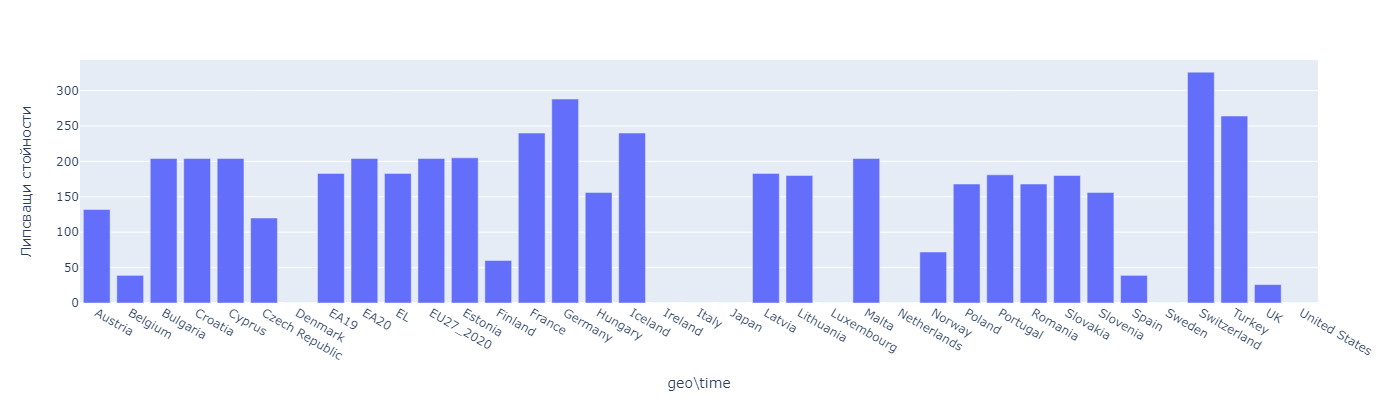

In [187]:
missing_rows(df_unemployment)

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Analysis of countries without missing values.</h4>
<p style="color:black; background-color: white; padding:5px;">From the table and graph, it can be seen that only 8 countries have no missing values in the entire time series. These are Denmark, Ireland, Italy, Japan, Luxembourg, Netherlands, Sweden, United States. One of these countries should be the subject of study because it has a whole timeline. But here the question is also related to which country has the most pronounced and clean business cycle as economic instability. Let's filter out all countries and leave only those without missing values for further analysis. Let's create a new table to help us visualize the unemployment rate in these countries.</p>

In [188]:
df_unemployment_noNAN = df_unemployment[~df_unemployment.isnull().any(axis=1)].T
new_header = df_unemployment_noNAN.iloc[0]
df_unemployment_noNAN = df_unemployment_noNAN[1:]
df_unemployment_noNAN.columns = new_header 

to_date = lambda x: pd.to_datetime(df_unemployment_noNAN.index, format='%YM%m')
df_unemployment_noNAN = df_unemployment_noNAN.assign(Date=to_date)
df_unemployment_noNAN = df_unemployment_noNAN.set_index('Date')
df_unemployment_noNAN = df_unemployment_noNAN[df_unemployment_noNAN.columns].astype(float)
df_unemployment_noNAN

geo\time    Denmark  Ireland  Italy  Japan  Luxembourg  Netherlands  Sweden  \
Date                                                                          
1983-01-01      8.7     13.3    7.2    2.8         3.7         10.0     3.8   
1983-02-01      9.2     13.6    7.3    2.9         3.7         10.2     3.8   
1983-03-01      9.1     13.7    7.4    3.0         3.5         10.3     3.8   
1983-04-01      8.9     13.6    7.3    2.9         3.3          9.7     3.1   
1983-05-01      8.5     13.6    7.2    2.6         3.2          9.4     3.4   
...             ...      ...    ...    ...         ...          ...     ...   
2022-07-01      4.7      4.6    7.4    2.5         4.2          3.4     6.4   
2022-08-01      4.9      4.6    7.7    2.6         4.3          3.7     6.6   
2022-09-01      4.5      4.1    7.9    2.7         4.4          3.9     6.5   
2022-10-01      4.5      4.1    8.1    2.6         4.6          3.7     7.1   
2022-11-01      4.8      4.0    7.8    2.4         4.6          3.5     6.4   

geo\time    United States  
Date                       
1983-01-01           11.4  
1983-02-01           11.3  
1983-03-01           10.8  
1983-04-01           10.0  
1983-05-01            9.8  
...                   ...  
2022-07-01            3.8  
2022-08-01            3.8  
2022-09-01            3.3  
2022-10-01            3.4  
2022-11-01            3.4  

[479 rows x 8 columns]

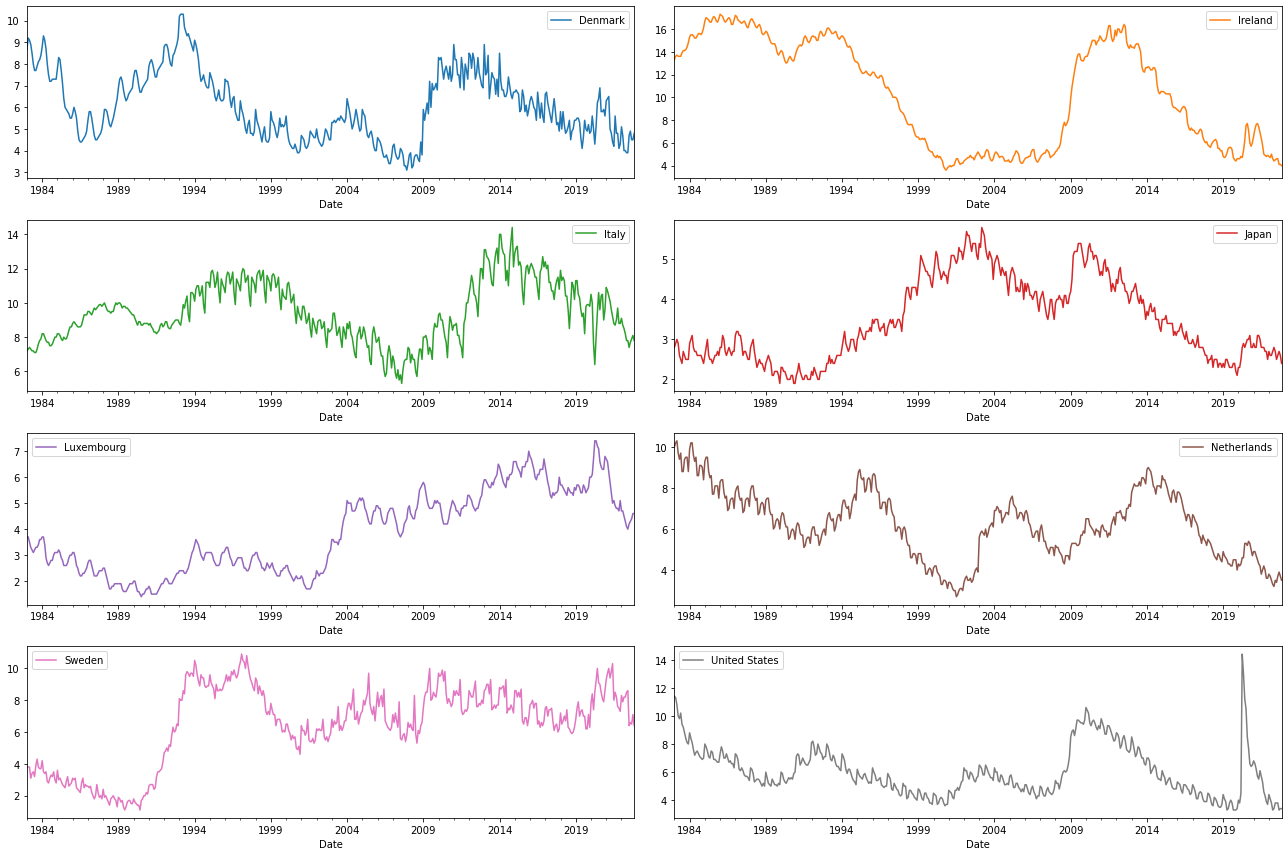

In [189]:
fig, a = plt.subplots(4, 2, figsize=(18, 12), tight_layout=True)
df_unemployment_noNAN.plot(ax=a, subplots=True);

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Selection of the country object of analysis.</h4>
<p style="color:black; background-color: white; padding:5px;">From the visualization of the data, we see that countries such as Japan, Japan, Luxembourg, Sweden and Italy are completely unsuitable for business cycle research. Denmark and the Netherlands remain with relatively similar dynamics and the USA. Since the research is always specifically related to the US economy, in this study we will take the responsibility and examine the business cycle on the data of the Netherlands</p>

In [190]:
df_unemployment_NE = df_unemployment_noNAN.iloc[:,[5]]
df_unemployment_NE

geo\time    Netherlands
Date                   
1983-01-01         10.0
1983-02-01         10.2
1983-03-01         10.3
1983-04-01          9.7
1983-05-01          9.4
...                 ...
2022-07-01          3.4
2022-08-01          3.7
2022-09-01          3.9
2022-10-01          3.7
2022-11-01          3.5

[479 rows x 1 columns]

---

<h2 style="color:black; background-color:white; padding:10px; margin-bottom:-15px">2.1. Time series analysis using "traditional" models </h2>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this point, we will go through the basic steps:</ul>
<li style="color:black; background-color:white; padding:5px">First, analysis of the time series of the selected country will be done;</li>
<li style="color:black; background-color:white; padding:5px">Second, we will use different time series analysis models;</li>

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step one. Analysis of the time series of the selected country</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In this step, we will go into detail about the timeline of the selected country for analysis. This includes the following basic sub-steps:</ul>
<li style="color:black; background-color:white; padding:5px">Time series visualization by years;</li>
<li style="color:black; background-color:white; padding:5px">Decomposition of the time series into its basic parts;</li>
<li style="color:black; background-color:white; padding:5px">Тime series analysis for stationarity;</li>
<li style="color:black; background-color:white; padding:5px">Тrend and seasonality analysis;</li>
<li style="color:black; background-color:white; padding:5px">Cross - time correlation;</li>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Analysis of the time series of the selected country.</h4>
<p style="color:black; background-color: white; padding:5px;">In the function below, it is possible to examine the dynamics of unemployment in the Netherlands  for the period under study, aggregated by year and aggregated by month. This include: Time series visualization by years, dispersion of unemployment by years, unemployment variance by month and heatmap to visualize variance by year and month.</p>

In [321]:
def visualization_time(df, value):
    df1 = df.copy()
    df1['year'] = [d.year for d in df.index]
    df1['month'] = [d.strftime('%b') for d in df.index]
    years = df1['year'].unique()

    fig = plt.figure(figsize=(17, 18))
    
    ax1 = plt.subplot2grid((4, 3), (0, 0), colspan=3)
    ax1 = plt.plot(df1.index, df1[value], color='tab:red')
    ax1 = plt.xlabel("year")
    ax1 = plt.ylabel("rate of unemployment")
    ax1 = plt.title('Year-wise Box Plot\n(The Trend)', fontsize=18); 

    ax3 = plt.subplot2grid((4, 3), (1, 0), colspan=2)
    ax3 = sns.boxplot(x='year', y=value, data=df1)
    ax3 = plt.xlabel("year")
    ax3 = plt.ylabel("rate of unemployment")
    ax3 = plt.title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
    ax3 = plt.xticks(rotation=45)

    ax4 = plt.subplot2grid((4, 3), (1, 2))
    ax4 = sns.boxplot(x='month', y=value, data=df1.loc[~df1.year.isin([1985, 2021]), :])
    ax4 = plt.xlabel("year")
    ax4 = plt.ylabel("rate of unemployment")
    ax4 = plt.title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
    
    df2 = df.copy()
    df2['year'] = df2.index.year
    df2['month'] = df2.index.month
    passengers_matrix = df2.pivot("month", "year", value)
    passengers_matrix = passengers_matrix[passengers_matrix.columns].astype(float)
    
    ax5 = plt.subplot2grid((4, 3), (2, 0), colspan=3, rowspan=2)
    ax5 = sns.heatmap(passengers_matrix, cmap="YlGnBu", annot=True);
    ax5 = plt.xlabel("year")
    ax5 = plt.ylabel("rate of unemployment")
    ax5 = plt.title('Heatmap of unemployment'); 
    
    fig.tight_layout()
    plt.show()

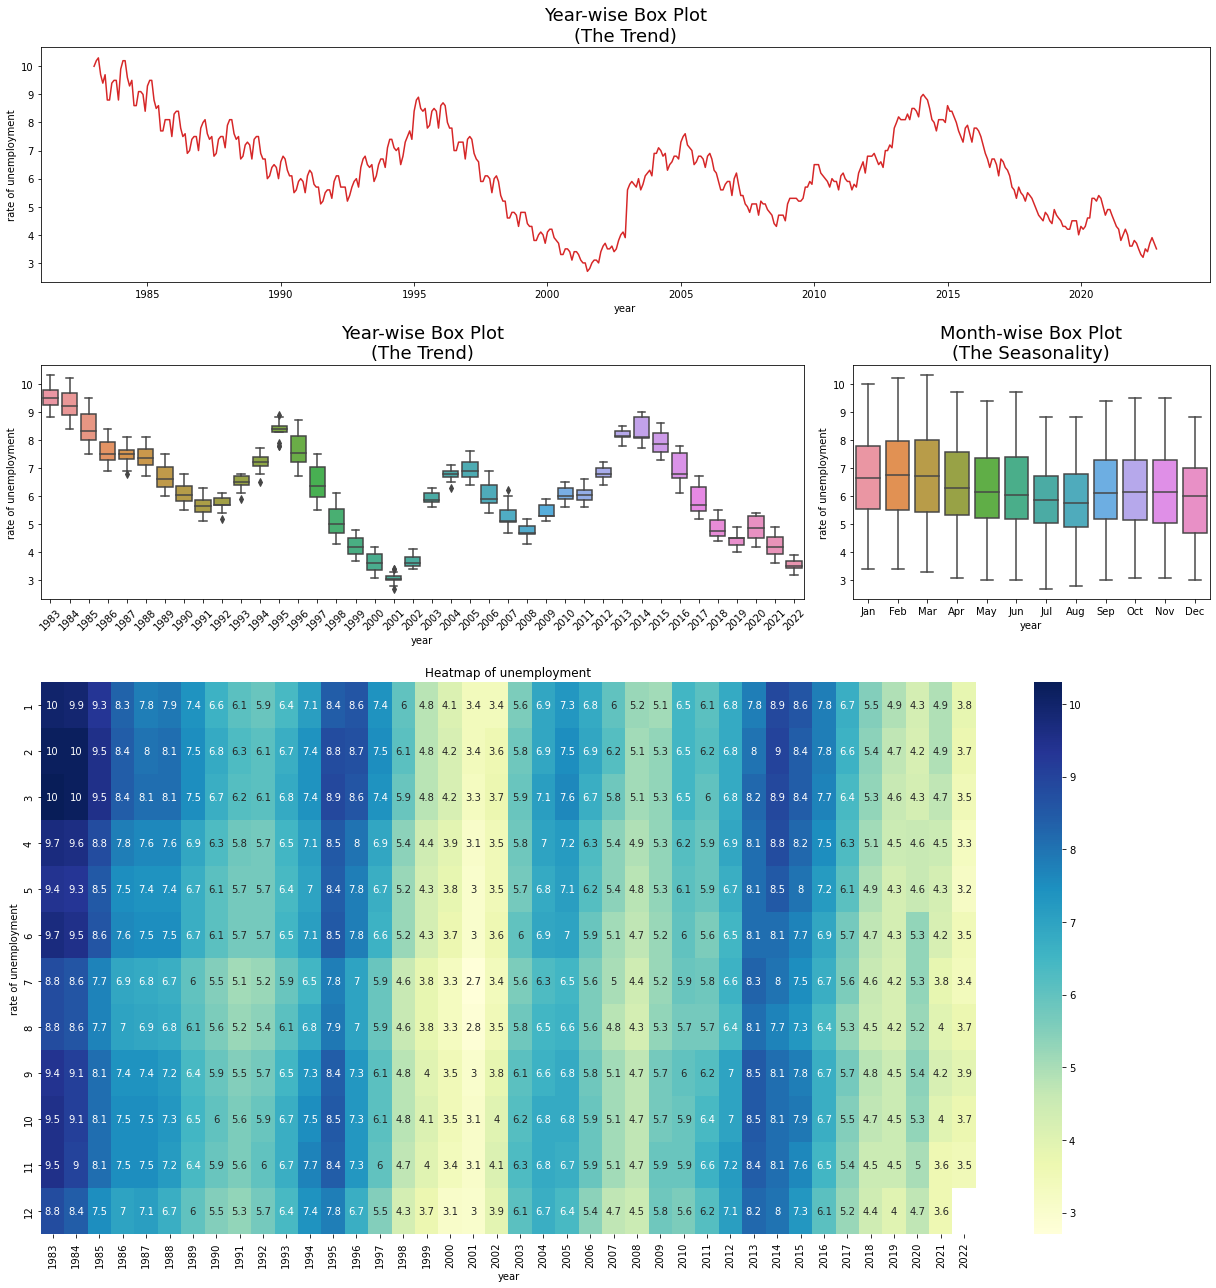

In [322]:
visualization_time(df_unemployment_NE, "Netherlands")

<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The data in the graphs show us the following important things about the time series of the unemployment rate in the Netherlands: </ul>
<li style="color:black; background-color:white; padding:5px">first, the undulating movement of the unemployment rate from the beginning to the end of the studied period is clearly visible;</li>
<li style="color:black; background-color:white; padding:5px">secondly, moments of high economic activity are associated with low levels of unemployment or the graph mirrors positive economic development;</li>
<li style="color:black; background-color:white; padding:5px">thirdly, the crisis of the late 1970s and early 1980s was associated with the highest level of overtime exceeding 10%. The crises of the mid-1990s, the early 2000s, the global financial crisis of 2008 and the Covid crisis are well visualized with peaks of unemployment;</li>
<li style="color:black; background-color:white; padding:5px">fourth, the high economic activity of the late 90s, the years before 2008 and the years before the Covid crisis are visible as the bottom of unemployment;</li>
<li style="color:black; background-color:white; padding:5px">fifth, the dispersion of unemployment by years shows that it is highest in the years leading to a bottom and recession;.</li>
<li style="color:black; background-color:white; padding:5px">sixth, the dispersion by month has no significant changes, but nevertheless it can be noticed that it is lowest in summer and highest in spring;</li>
<li style="color:black; background-color:white; padding:5px">seventh, the heatmap very well visualizes the cyclicality in the unemployment rate, where high unemployment alternates with a dark color and low unemployment with a light color, parallel to the different levels by month for each year;</li>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-15px">Decomposition of the time series into its basic parts.</h4>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">In time series analysis is very important to know about the past data, to know about the patterns which are followed by the values with time.Therefore, we will do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:</ul>
<li style="color:black; background-color:white; padding:5px">Additive time series: Value = Base Level + Trend + Seasonality + Error. The additive model is Y[t] = T[t] + S[t] + e[t]
</li>
<li style="color:black; background-color:white; padding:5px">Multiplicative Time Series: Value = Base Level x Trend x Seasonality x Error. The multiplicative model is Y[t] = T[t] * S[t] * e[t]</li>

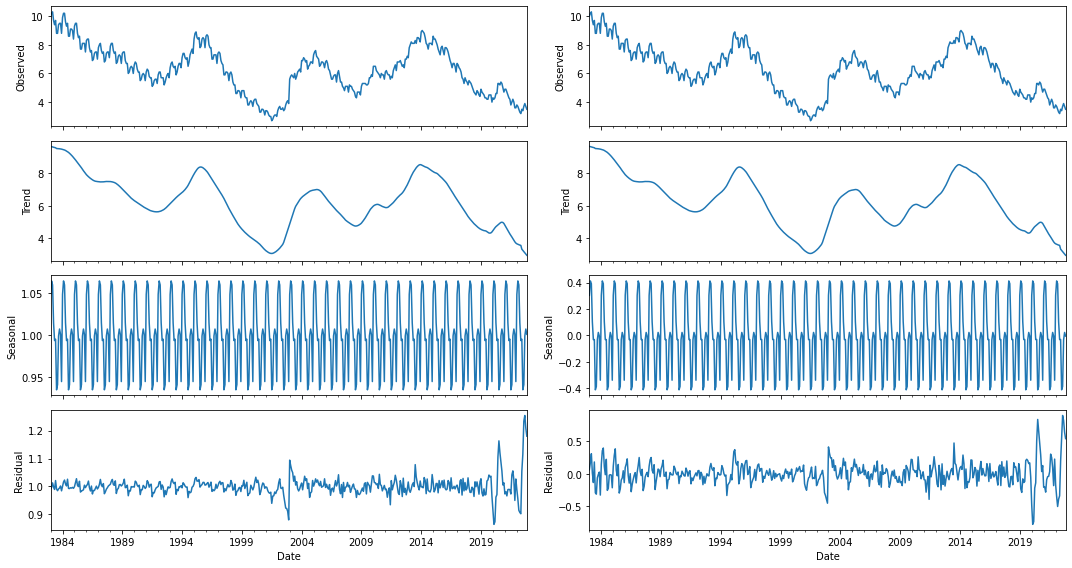

In [193]:
fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(15,8))

# Multiplicative Decomposition 
multiplicative_decomposition  = seasonal_decompose(df_unemployment_NE["Netherlands"], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_unemployment_NE["Netherlands"], model='additive', extrapolate_trend='freq')

def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')


plotseasonal(multiplicative_decomposition, axes[:,0])
plotseasonal(additive_decomposition, axes[:,1])

plt.tight_layout()
plt.show()

<p style="color:black; background-color: white; padding:5px;">If you look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-15px">Time series analysis for stationarity.</h4>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">Stationarity is an important concept in the field of time series analysis with tremendous influence on how the data is perceived and predicted. When forecasting or predicting the future, most time series models assume that each point is independent of one another. That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. In this supstep we will check for stationarity using the folowing methods:</ul>
<li style="color:black; background-color:white; padding:5px">Augmented Dickey Fuller test (ADH Test)</li>
<li style="color:black; background-color:white; padding:5px">Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)</li>

In [196]:
def stationarity (df, variable):
    # ADF Test
    result_adf = adfuller(df[variable].values, autolag='AIC')
    print(f'ADF Statistic: {result_adf[0]}')
    print(f'p-value: {result_adf[1]}')
    for key, value in result_adf[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

    # KPSS Test
    result_kpss = kpss(df[variable].values, regression='c')
    print('\nKPSS Statistic: %f' % result_kpss[0])
    print('p-value: %f' % result_kpss[1])
    for key, value in result_kpss[3].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    
    graph = sns.barplot(x=["ADF Statistic","KPSS Statistic"],y=[result_adf[1],result_kpss[1]])
    #Drawing a horizontal line at point 1.25
    graph.axhline(0.5,  color='r')
    plt.xlabel("statistic")
    plt.ylabel("p-value")
    plt.title("Stationary statistic")
    #The plot is shown
    plt.show()

ADF Statistic: -3.4138554501330782
p-value: 0.010495511621669836
Critial Values:
   1%, -3.44455286264131
Critial Values:
   5%, -2.8678027030003483
Critial Values:
   10%, -2.5701057817594894

KPSS Statistic: 0.816132
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


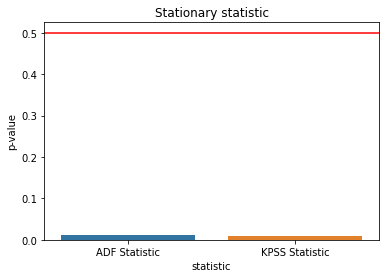

In [197]:
stationarity(df_unemployment_NE, "Netherlands")

<p style="color:black; background-color: white; padding:5px;">Тhe null hypothesis is the time series is non-stationary. The results of both tests show that the P-Value  is less than the significance level (0.05), you reject the null hypothesis and sume the time series is stationary.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-15px">Тrend and seasonality analysis.</h4>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">Although the time series is stationary, let's see what it would look like if we remove the trend and seasonal fluctuations. In this substep, we use the tool to "clean the data" of the influence of major elements such as trend and seasonal fluctuations on stationarity. This will be done through the following steps:</ul>
<li style="color:black; background-color:white; padding:5px">Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor;</li>
<li style="color:black; background-color:white; padding:5px">Subtract the trend component obtained from time series decomposition;</li>
<li style="color:black; background-color:white; padding:5px">Subtract the seasonal component obtained from time series decomposition;</li>

In [323]:
def time_decompose(df, variable):

    fig, axs = plt.subplots(3, 1, figsize=(15, 11))
    
    de_trended = signal.detrend(df[variable].values)
    axs[0].plot(df.index, df[variable], label="unemployment")
    axs[0].plot(df.index, de_trended, label="unemployment_detrended")
    axs[0].legend(loc='best')
    axs[0].set_title('Unemployment detrended by subtracting the least squares fit')

    multiplicative_decomposition  = seasonal_decompose(df[variable], model='multiplicative', extrapolate_trend='freq')
    de_trended_2 = df[variable].values - multiplicative_decomposition.trend

    axs[1].plot(df.index, df[variable], label="unemployment")
    axs[1].plot(df.index, de_trended_2, label="unemployment_detrended")
    axs[1].legend(loc='best')
    axs[1].set_title('Unemployment detrended by subtracting the trend component')

    de_seasonalized = df[variable].values / multiplicative_decomposition.seasonal
    axs[2].plot(df.index, df[variable], label="unemployment")
    axs[2].plot(df.index, de_seasonalized, label="unemployment_deseasonalized")
    axs[2].legend(loc='best')
    axs[2].set_title('Unemployment detrended by subtracting the seasonalized component')
    
    plt.tight_layout()
    plt.show()

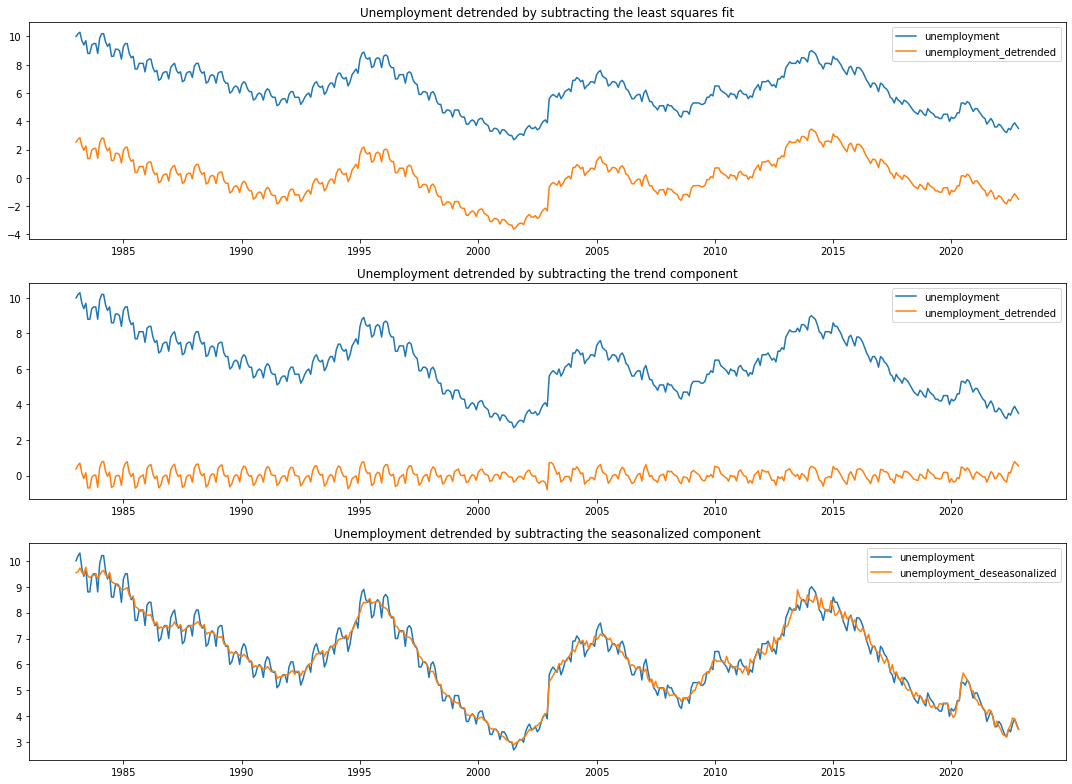

In [324]:
time_decompose(df_unemployment_NE, "Netherlands")

<p style="color:black; background-color: white; padding:5px;">The first method does not give the required result, which is visible in the first graph, but in the second it is visible how the trend component is simply missing in the time series. in the third graph we see how the seasonal fluctuations are almost completely removed and the dynamics of the time series is smoothed out.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-15px">Cross - time correlation.</h4>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-5px">In this subsection, we will examine how strongly and in what way unemployment data in time series are each correlated with itself in time lag. This will require the use of the following tools:</ul>
<li style="color:black; background-color:white; padding:5px">Autocorrelation Function (ACF) plot;</li>
<li style="color:black; background-color:white; padding:5px">Lag Plots;</li>

In [204]:
def autocorelation_time(df, variable):

    fig = plt.figure(figsize=(15, 4))
    autocorrelation_plot(df[variable].tolist())
    plt.title('Lag')
    plt.grid(True)
    plt.show()

    f = plt.figure(figsize=(18,8))
    for i in range(1,13):
        ax = f.add_subplot(2, 6, i)
        lag_plot(df[[variable]], lag=i)
        plt.title('Lag')

    plt.tight_layout()
    plt.show()

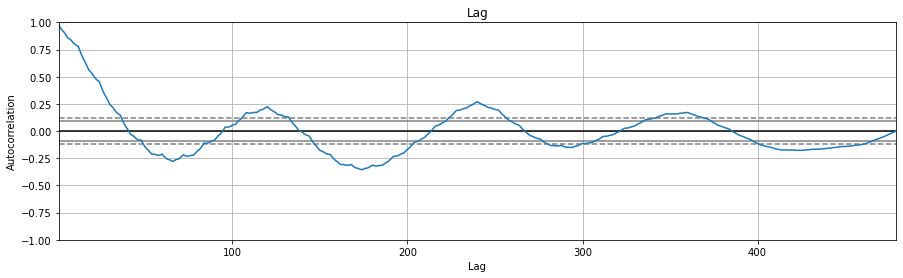

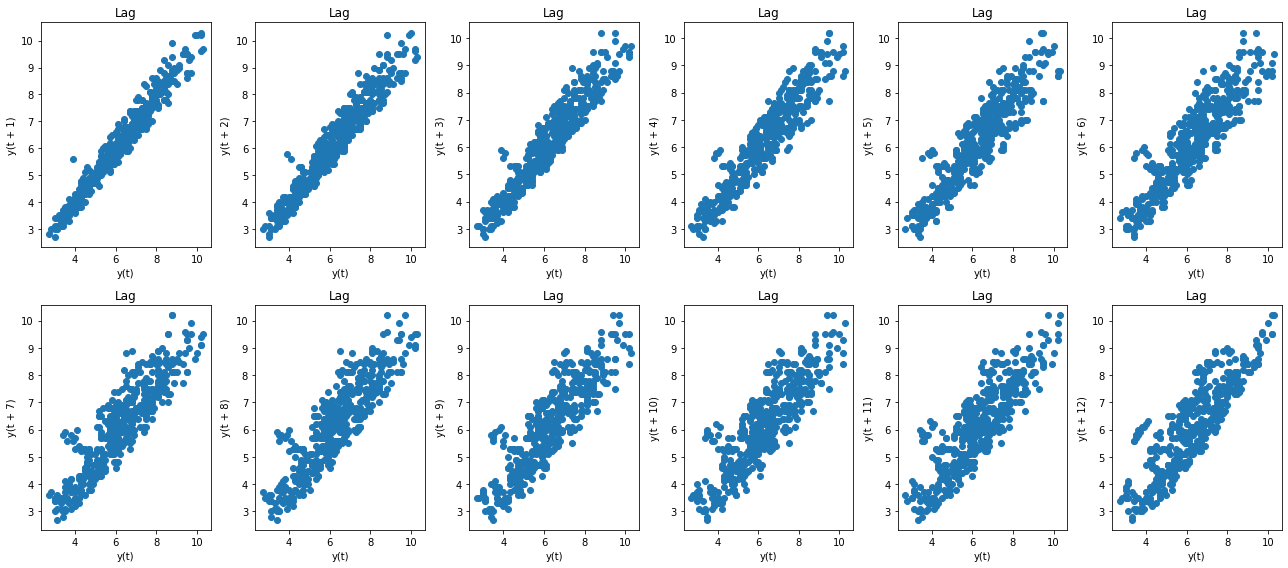

In [205]:
autocorelation_time(df_unemployment_NE, "Netherlands")

<p style="color:black; background-color: white; padding:5px;">The ACF graph (figure above), presents autocorrelation coefficients and the confidence intervals. The confidence interval is indicated by two grey, horizontal, dotted lines. If the autocorrelation coefficient is in the confidence interval, it is regarded as not statistically significant. The data clearly show that at the very beginning the autocorrelation dependence between the unemployment values drops to very low levels, and over time it even becomes statistically insignificant. This is visible through the lag plots where the apparent linear relationship between the lag values increasingly disappears with each lag. </p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step two. Time series models and analys</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-5px">In this step, the time series will be analyzed using multiple "traditional" models, this includes the following models and sub-steps:</ul>
<li style="color:black; background-color:white; padding:5px">prepare the train / test sets;</li>
<li style="color:black; background-color:white; padding:5px">AR model;</li>
<li style="color:black; background-color:white; padding:5px">MA model;</li>
<li style="color:black; background-color:white; padding:5px">ARMA model;</li>
<li style="color:black; background-color:white; padding:5px">ARIMA model;</li>
<li style="color:black; background-color:white; padding:5px">Naive forecast model;</li>
<li style="color:black; background-color:white; padding:5px">Exponential Smoothing;</li>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Test / train sets</h4>
<p style="color:black; background-color: white; padding:5px;">In this substep, we will prepare the training and test part of the timeline. The split will be in the proportion of 90% / 10%, which will allow models trained in 90% of the data to give the most accurate forecast that will be tested for the remaining 10% of the years.</p>

--------------------------------------------------------------
 The train set has 430 cases/ years, which is 89.77% ot time set
--------------------------------------------------------------
 The test set has 49 cases/ years, which is 10.23% ot time set
--------------------------------------------------------------


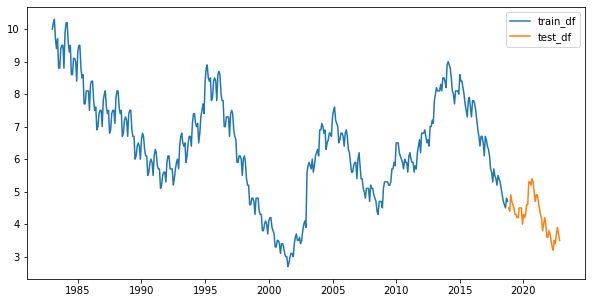

In [206]:
split_time = 430

train_df =  df_unemployment_NE[:split_time]
test_df = df_unemployment_NE[split_time:]

print("--------------------------------------------------------------")
print(f" The train set has {len(train_df)} cases/ years, which is {round(100/(len(df_unemployment_NE) / len(train_df)), 2) }% ot time set")
print("--------------------------------------------------------------")
print(f" The test set has {len(test_df)} cases/ years, which is {round(100/(len(df_unemployment_NE) / len(test_df)), 2) }% ot time set")
print("--------------------------------------------------------------")
fig = plt.figure(figsize = (10, 5))
plt.plot(train_df, label="train_df")
plt.plot(test_df, label = "test_df" )
plt.legend()
plt.show()

<p style="color:black; background-color: white; padding:5px;">Before proceeding with the time series analysis models it is important to do the following. First, if the data is not stationary, let's differentiate it. Second let's derive autocorrelation plot and partial autocorrelation plot to determine the coefficients of the following models.</p>

In [207]:
def differencing (df):
    fig = plt.figure(figsize=(15, 12))

    ax1 = plt.subplot2grid((4, 4), (0, 0), colspan=2, rowspan=2)
    ax1 = plt.plot(df)
    ax1 = plt.xlabel("years")
    ax1 = plt.ylabel("rate of unemployment")

    ax2 = plt.subplot2grid((4, 4), (0, 2), rowspan=1 , colspan=2)
    plot_acf(df, lags=40, ax=ax2)
    ax2 = plt.xlabel("Lag")
    ax2 = plt.ylabel("ACF")

    ax3 = plt.subplot2grid((4, 4), (1, 2), rowspan=1, colspan=2)
    plot_pacf(df, lags=40, ax=ax3)
    ax3 = plt.xlabel("Lag")
    ax3 = plt.ylabel("PACF")


    ax4 = plt.subplot2grid((4, 4), (2, 0), colspan=2, rowspan=2)
    ax4 = plt.plot(df.diff())
    ax4 = plt.xlabel("years")
    ax4 = plt.ylabel("differentiated values")

    ax5 = plt.subplot2grid((4, 4), (2, 2), rowspan=1, colspan=2)
    plot_acf(df.diff(), lags=40, ax=ax5)
    ax5 = plt.xlabel("Lag")
    ax5 = plt.ylabel("ACF")

    ax6 = plt.subplot2grid((4, 4), (3, 2), rowspan=1, colspan=2)
    plot_pacf(df.diff(), lags=40, ax=ax6)
    ax6 = plt.xlabel("Lag")
    ax6 = plt.ylabel("PACF")

    fig.tight_layout()

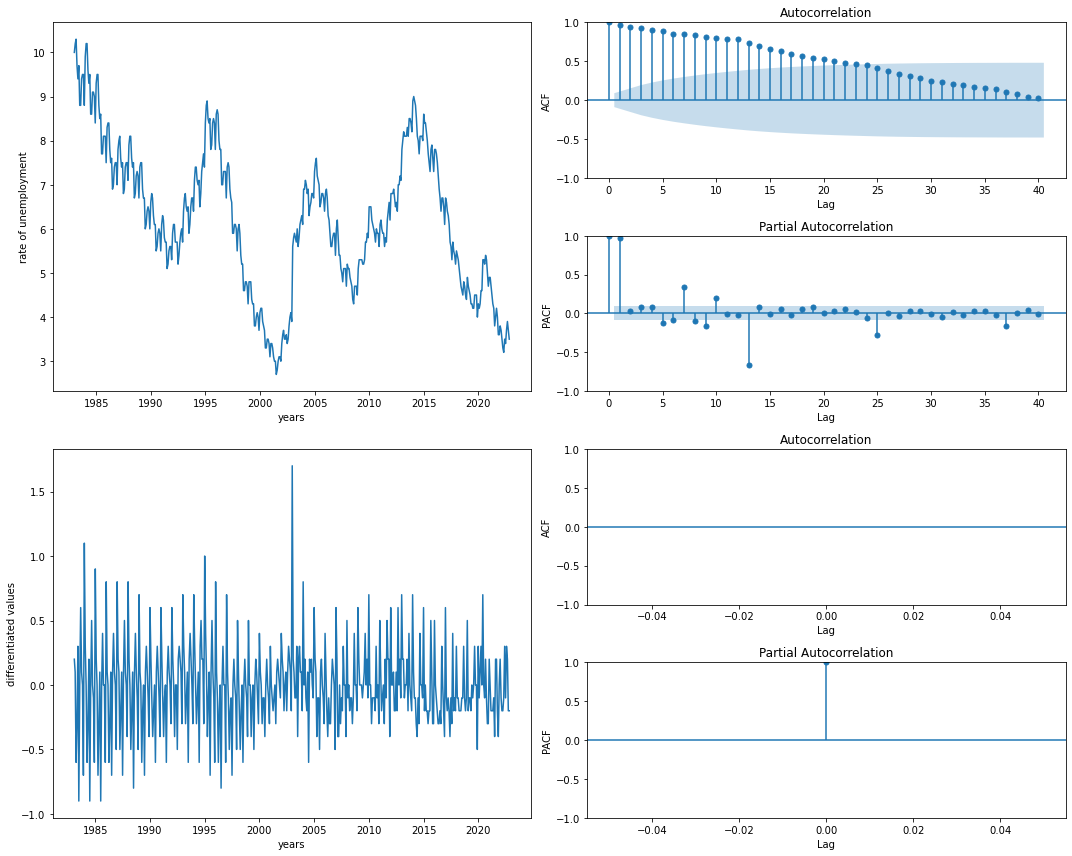

In [208]:
differencing(df_unemployment_NE)

<p style="color:black; background-color: white; padding:5px;">The figure above first gives us information about the changes in autocorrelation ploт and partial autocorrelation plot if there was a need to differentiate the data. Since the data is stationary we see that differentiation is not necessary and we can proceed to the models.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Autoregressive (AR) model</h4>
<p style="color:black; background-color: white; padding:5px;">Autoregressive (AR) modeling is one of the techniques used for time-series analysis. An autoregressive model is a time-series model that describes how a particular variable’s past values influence its current value. In other words, an AR model attempts to predict the next value in a series by incorporating the most recent past values and using them as input data. Autoregressive models are based on the idea that past events can help us predict future events. Autoregressive modeling is training a regression model on the value of the response variable itself. Autoregressive is made of the word, Auto and Regressive which represents the linear regression on itself (auto). The AR equation: Yt=β0+β1∗Yt−1+errort</p>

<p style="color:black; background-color: white; padding:5px;">AR models have the parameter termed as p. The parameter p represents the previous values of p number of time lags when training the model. The autocorrelation plot reveals that the correlation value up to order 13 is high enough and will be used in AR model.</p>

In [230]:
def ar_model(df, train_df, test_df, lags):
    
    global ar_model
    ar_model = AutoReg(train_df, lags=lags).fit()
    print(ar_model.summary())
    
    ar_predict = ar_model.forecast(len(test_df))
    global plot_predict
    fig = plt.figure(figsize=(20, 5))
    
    ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
    ax1 = plt.plot(train_df, label='train_df')
    ax1 = plt.plot(test_df, label='test_df')
    ax1 = plt.plot(ar_predict, color='g', label='Prediction')
    ax1 = plt.xlabel("years")
    ax1 = plt.ylabel("rate of unemployment")
    x_pos = 5800
    x_pos1 = 5000
    y_pos = 3.5
    y_pos1 = 3
    mse = mean_squared_error(test_df, ar_predict)**0.5
    mape = mean_absolute_percentage_error(test_df, ar_predict)
    ax1 = plt.text(x_pos1, y_pos, "RMSE: ")
    ax1 = plt.text(x_pos1, y_pos1, "MAPE: ")
    ax1 = plt.text(x_pos, y_pos, mse)
    ax1 = plt.text(x_pos, y_pos1, mape)

    ax2 = plt.subplot2grid((1, 3), (0, 2))
    ax2 = plt.plot(test_df["Netherlands"], label='test_df')
    ax2 = plt.plot(ar_predict, color='g', label='Prediction')
    ax2 = plt.xlabel("years")
    ax2 = plt.ylabel("rate of unemployment")
    ax2 = plt.xticks(rotation=45)

    ar_model.plot_diagnostics(figsize=(15,8))
      
    f = plt.figure(figsize=(25,20))
    for i in range(1,16):
        ax = f.add_subplot(3, 5, i)
        ar_model = AutoReg(train_df, lags=i).fit()
        plt.plot(test_df)
        plt.title(f" p = {i}")
        plot_predict(ar_model,430,479, dynamic=False, ax=ax)
    fig.tight_layout()
    plt.show()
    
    global time_results_ar
    data = [["AR model",mse,mape]]
    time_results_ar = pd.DataFrame(data, columns=['model','RMSE','MAPE'])
    return(time_results_ar)

                            AutoReg Model Results                             
Dep. Variable:            Netherlands   No. Observations:                  430
Model:                    AutoReg(13)   Log Likelihood                 243.583
Method:               Conditional MLE   S.D. of innovations              0.135
Date:                Thu, 02 Feb 2023   AIC                           -457.167
Time:                        12:37:42   BIC                           -396.670
Sample:                    02-01-1984   HQIC                          -433.249
                         - 10-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1649      0.030      5.547      0.000       0.107       0.223
Netherlands.L1      0.9757      0.025     39.579      0.000       0.927       1.024
Netherlands.L2      0.0686      

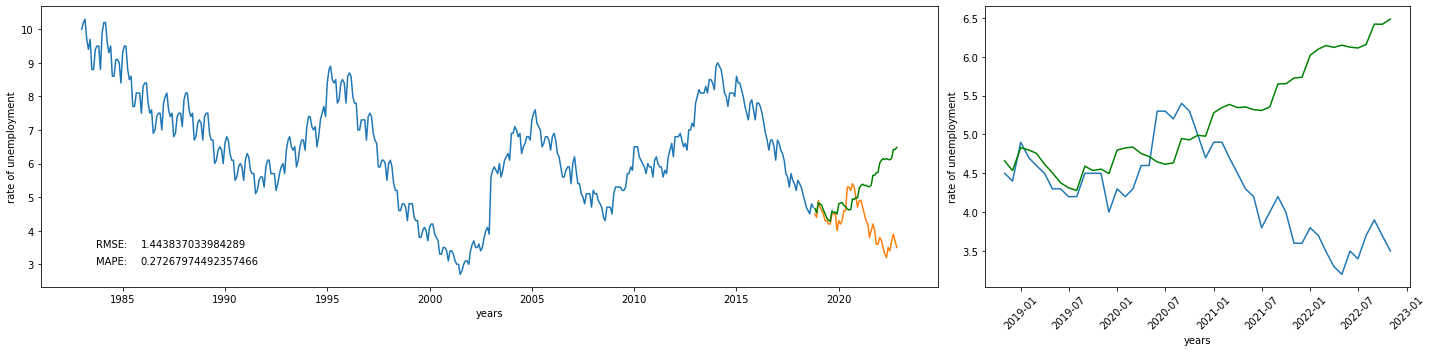

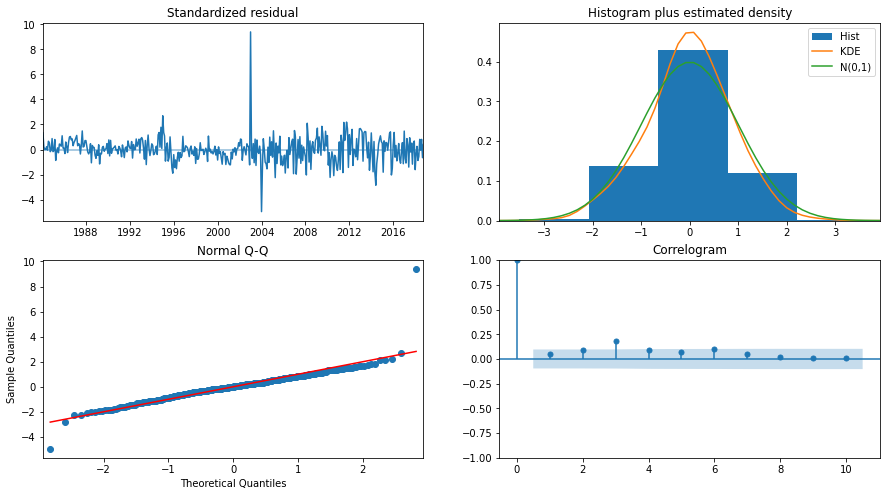

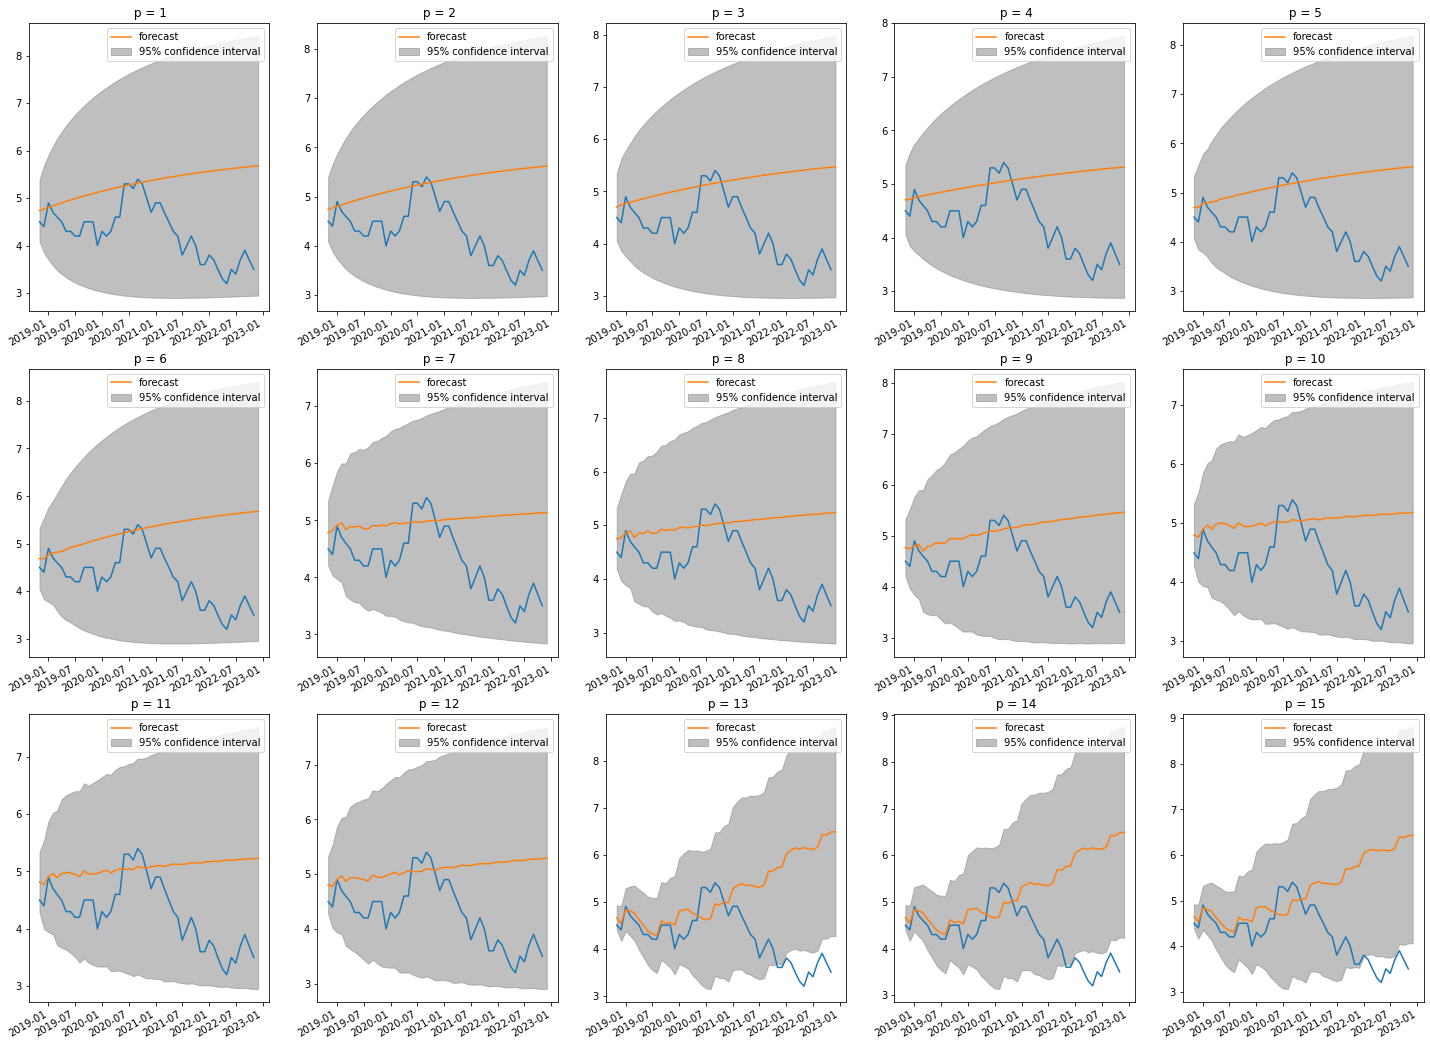

model      RMSE     MAPE
0  AR model  1.443837  0.27268

In [231]:
ar_model(df_unemployment_NE, train_df, test_df, 13)

<p style="color:black; background-color: white; padding:5px;">The autoregression model in the first few years gives more or less an approximation of the real result, but as the time series progresses, it fails to predict accurately. This is visible in the graphs above. The graphs also show how the estimated regression line changes as the "p" value changes. The results of the most accurate autoregression model are recorded and will be subject to comparison with the others.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Moving average (MA) model</h4>
<p style="color:black; background-color: white; padding:5px;">Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast. The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series. Lets take lag = 2.</p>

In [232]:
def ma_model(df, train_df, test_df, q):
    
    global ma_model
    ma_model = ARIMA(train_df,  order=(0, 0, q)).fit()
    print(ma_model.summary())
    
    ma_predict = ma_model.forecast(len(test_df))

    fig = plt.figure(figsize=(20, 5))
    
    ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
    ax1 = plt.plot(train_df, label='train_df')
    ax1 = plt.plot(test_df, label='test_df')
    ax1 = plt.plot(ma_predict, color='g', label='Prediction')
    ax1 = plt.xlabel("years")
    ax1 = plt.ylabel("rate of unemployment")
    x_pos = 5800
    x_pos1 = 5000
    y_pos = 3.5
    y_pos1 = 3
    mse = mean_squared_error(test_df, ma_predict)**0.5
    mape = mean_absolute_percentage_error(test_df, ma_predict)
    ax1 = plt.text(x_pos1, y_pos, "RMSE: ")
    ax1 = plt.text(x_pos1, y_pos1, "MAPE: ")
    ax1 = plt.text(x_pos, y_pos, mse)
    ax1 = plt.text(x_pos, y_pos1, mape)

    ax2 = plt.subplot2grid((1, 3), (0, 2))
    ax2 = plt.plot(test_df, label='test_df')
    ax2 = plt.plot(ma_predict, color='g', label='Prediction')
    ax2 = plt.xlabel("years")
    ax2 = plt.ylabel("rate of unemployment")
    ax2 = plt.xticks(rotation=45)

    ma_model.plot_diagnostics(figsize=(15,8))
      
    f = plt.figure(figsize=(25,20))
    for i in range(1,16):
        ax = f.add_subplot(3, 5, i)
        ma_model = ARIMA(train_df,  order=(0, 0, i)).fit()
        plt.plot(test_df)
        plt.title(f" q = {i}")
        plot_predict(ma_model,430,479, dynamic=False, ax=ax)
    f.tight_layout()
    plt.show()
    
    data = [["MA model",mse,mape]]
    global time_results_ma
    time_results_ma = pd.DataFrame(data, columns=['model','RMSE','MAPE'])

                               SARIMAX Results                                
Dep. Variable:            Netherlands   No. Observations:                  430
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -393.009
Date:                Thu, 02 Feb 2023   AIC                            794.018
Time:                        12:38:08   BIC                            810.274
Sample:                    01-01-1983   HQIC                           800.437
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4616      0.090     71.551      0.000       6.285       6.639
ma.L1          1.2399      0.026     47.549      0.000       1.189       1.291
ma.L2          0.8913      0.028     32.155      0.0

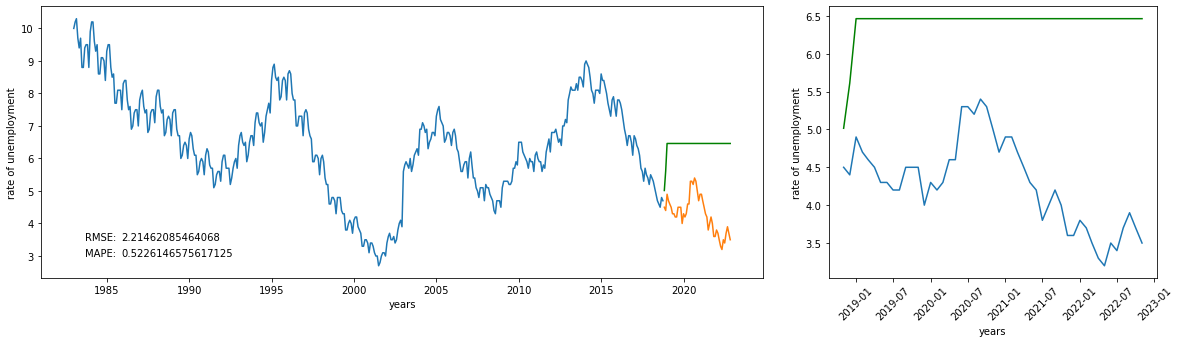

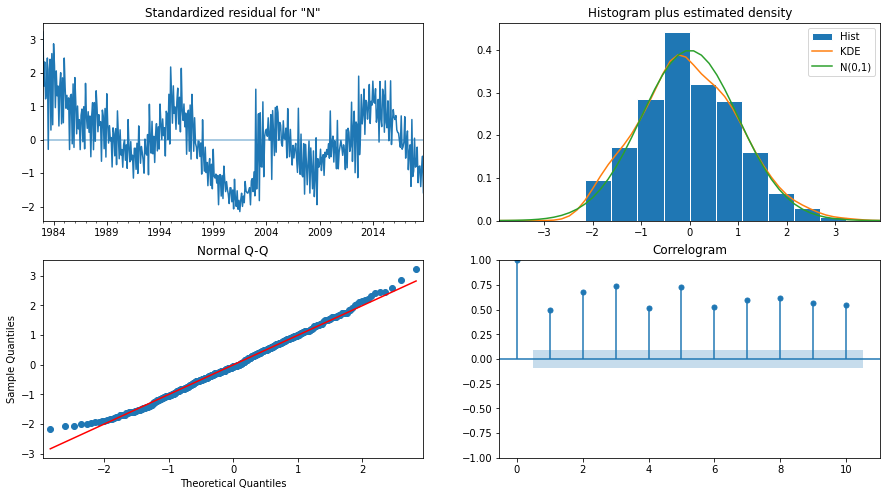

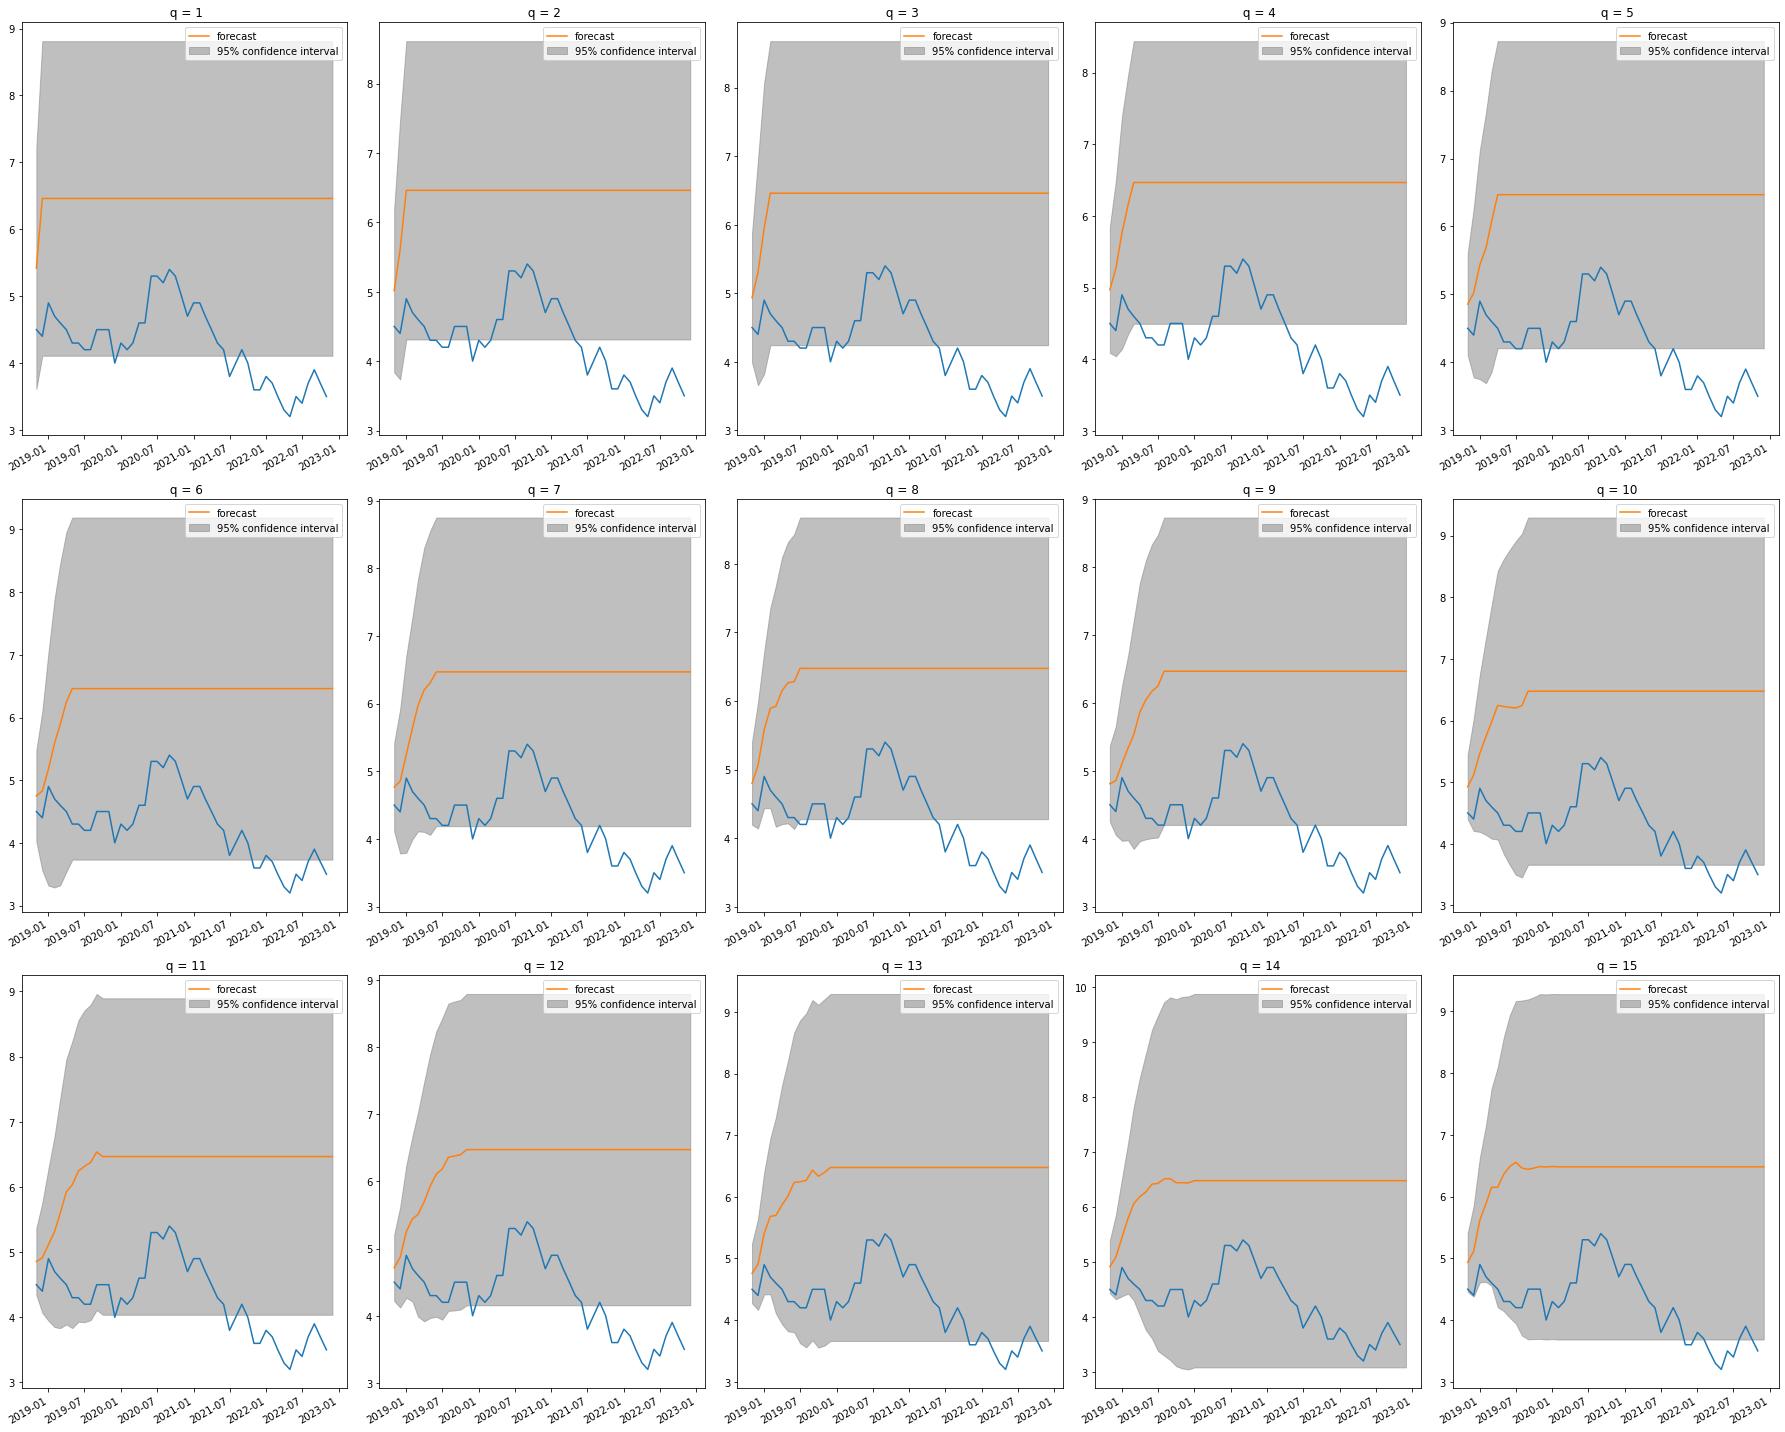

In [233]:
ma_model(df_unemployment_NE, train_df, test_df, 2)

<p style="color:black; background-color: white; padding:5px;">The Moving avarage model fails to deal with the task. This is visible in the graphs above. The graphs also show how the estimated regression line changes with a change in the "q" value, as well as with the autoregressive model without much change here. The results of the most accurate moving avarage model are recorded and will be subject to comparison with the others.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px"> Autoregressive and moving average models (ARMA)</h4>
<p style="color:black; background-color: white; padding:5px;">This model combine the AR and MA models. In this model, the impact of previous lags along with the residuals is considered for forecasting the future values of the time series. We have already best "p" and "q" number so will use it together here.</p>

In [234]:
def arma_model(df, train_df, test_df, p, q):
    
    global arma_model
    arma_model = ARIMA(train_df,  order=(p, 0, q)).fit()
    print(arma_model.summary())
    
    arma_predict = arma_model.forecast(len(test_df))

    fig = plt.figure(figsize=(20, 5))
    
    ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
    ax1 = plt.plot(train_df, label='train_df')
    ax1 = plt.plot(test_df, label='test_df')
    ax1 = plt.plot(arma_predict, color='g', label='Prediction')
    ax1 = plt.xlabel("years")
    ax1 = plt.ylabel("rate of unemployment")
    x_pos = 5800
    x_pos1 = 5000
    y_pos = 3.5
    y_pos1 = 3
    mse = mean_squared_error(test_df, arma_predict)**0.5
    mape = mean_absolute_percentage_error(test_df, arma_predict)
    ax1 = plt.text(x_pos1, y_pos, "RMSE: ")
    ax1 = plt.text(x_pos1, y_pos1, "MAPE: ")
    ax1 = plt.text(x_pos, y_pos, mse)
    ax1 = plt.text(x_pos, y_pos1, mape)

    ax2 = plt.subplot2grid((1, 3), (0, 2))
    ax2 = plt.plot(test_df, label='test_df')
    ax2 = plt.plot(arma_predict, color='g', label='Prediction')
    ax2 = plt.xlabel("years")
    ax2 = plt.ylabel("rate of unemployment")
    ax2 = plt.xticks(rotation=45)

    arma_model.plot_diagnostics(figsize=(15,8))
    
    data = [["ARMA model",mse,mape]]
    global time_results_arma
    time_results_arma = pd.DataFrame(data, columns=['model','RMSE','MAPE'])

                               SARIMAX Results                                
Dep. Variable:            Netherlands   No. Observations:                  430
Model:                ARIMA(13, 0, 2)   Log Likelihood                 221.472
Date:                Thu, 02 Feb 2023   AIC                           -408.944
Time:                        12:39:22   BIC                           -339.859
Sample:                    01-01-1983   HQIC                          -381.664
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4415      0.350     18.429      0.000       5.756       7.127
ar.L1          0.9209      0.027     34.254      0.000       0.868       0.974
ar.L2          0.0918      0.036      2.539      0.0

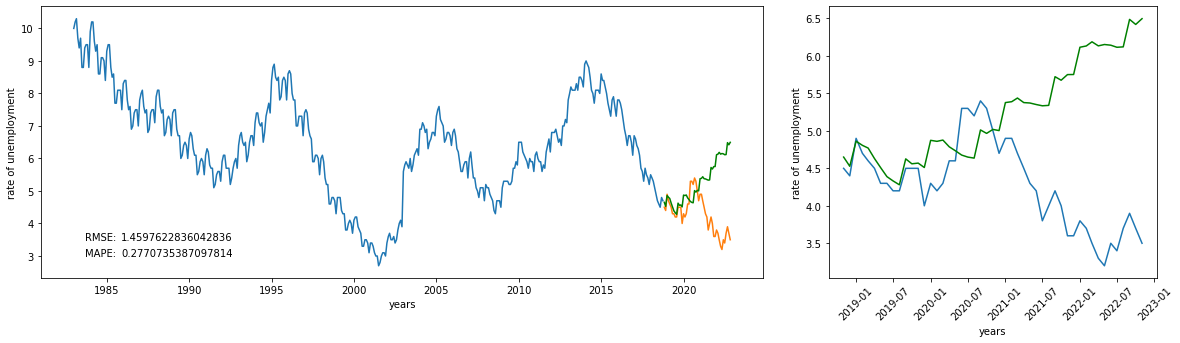

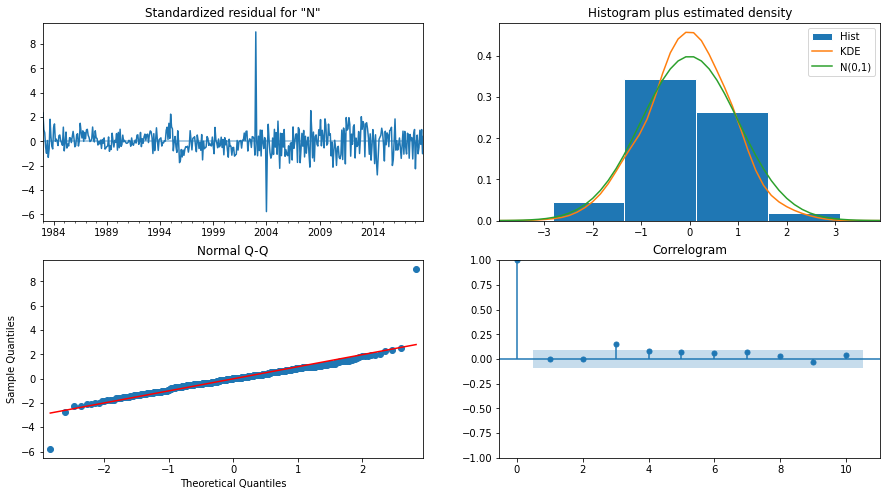

In [235]:
arma_model(df_unemployment_NE, train_df, test_df, 13, 2)

<p style="color:black; background-color: white; padding:5px;">The ARMA model performs almost as well as the autoregressive model as a predictor, with the accuracy disappearing more and more as the time period progresses. This is visible in the graphs above. The results of the ARMA model are recorded and will be subject to comparison with the others.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">ARIMA (Auto-Regressive Integrated Moving Average) model</h4>
<p style="color:black; background-color: white; padding:5px;">The ARIMA model is quite similar to the ARMA model other than the fact that it includes one more factor known as differencing which stands for Id in the ARIMA model. The value of d, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0. So in short ARIMA model is a combination of a number of differences already applied on the model in order to make it stationary, the number of previous lags along with residuals errors in order to forecast future values. A class has been created to combine two functions. The first which will look for the best combination between the values of the model and the second function which will test the model itself.</p>

In [236]:
class Arima:
    def __init__ (self, df, train_df, p, q):
        global arima_model
        arima_model = pm.auto_arima(train_df, start_p=1, start_q=1,
                              test='adf',       # use adftest to find optimal 'd'
                              max_p=p, max_q=q, # maximum p and q
                              m=1,              # frequency of series
                              d=None,           # let model determine 'd'
                              seasonal=False,   # No Seasonality
                              start_P=0, 
                              D=0, 
                              trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

        print(arima_model.summary())
    
    def Arima_model(self, df, train_df, test_df, p, d, q):
        
        global best_arima_model
        best_arima_model = ARIMA(train_df,  order=(p, d, q)).fit()
        best_arima_predict = best_arima_model.forecast(len(test_df))

        fig = plt.figure(figsize=(20, 5))

        ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
        ax1 = plt.plot(train_df, label='train_df')
        ax1 = plt.plot(test_df, label='test_df')
        ax1 = plt.plot(best_arima_predict, color='g', label='Prediction')
        ax1 = plt.xlabel("years")
        ax1 = plt.ylabel("rate of unemployment")
        x_pos = 6500
        x_pos1 = 5000
        y_pos = 3.5
        y_pos1 = 3
        mse = mean_squared_error(test_df, best_arima_predict)**0.5
        mape = mean_absolute_percentage_error(test_df, best_arima_predict)
        ax1 = plt.text(x_pos1, y_pos, "RMSE: ")
        ax1 = plt.text(x_pos1, y_pos1, "MAPE: ")
        ax1 = plt.text(x_pos, y_pos, mse)
        ax1 = plt.text(x_pos, y_pos1, mape)

        ax2 = plt.subplot2grid((1, 3), (0, 2))
        ax2 = plt.plot(test_df, label='test_df')
        ax2 = plt.plot(best_arima_predict, color='g', label='Prediction')
        ax2 = plt.xlabel("years")
        ax2 = plt.ylabel("rate of unemployment")
        ax2 = plt.xticks(rotation=45)

        best_arima_model.plot_diagnostics(figsize=(15,8))
        
        data = [["ARIMA model",mse,mape]]
        global time_results_arima
        time_results_arima = pd.DataFrame(data, columns=['model','RMSE','MAPE'])

In [237]:
arima_model = Arima(df_unemployment_NE, train_df, 5, 5)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=284.060, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=287.022, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=287.175, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=286.535, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=285.600, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=283.146, Time=0.60 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=282.530, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=279.593, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=270.419, Time=0.18 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=268.708, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=246.798, Time=0.47 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=271.805, Time=0.30 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=120.886, Time=1.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time

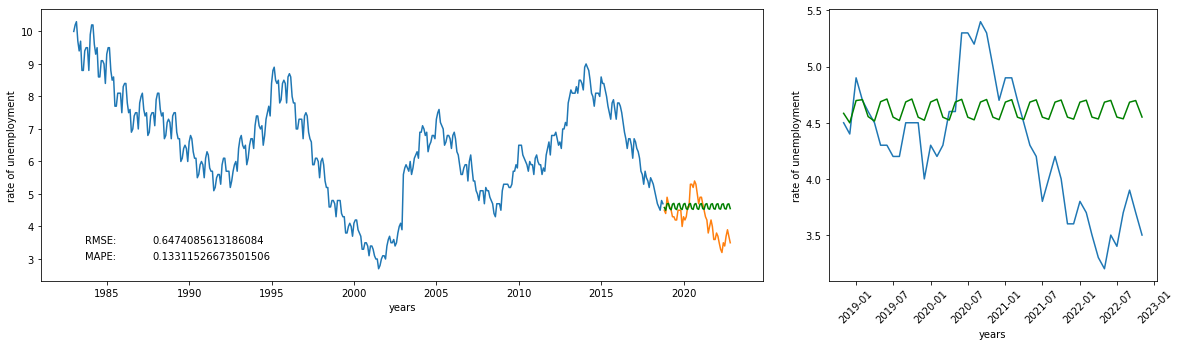

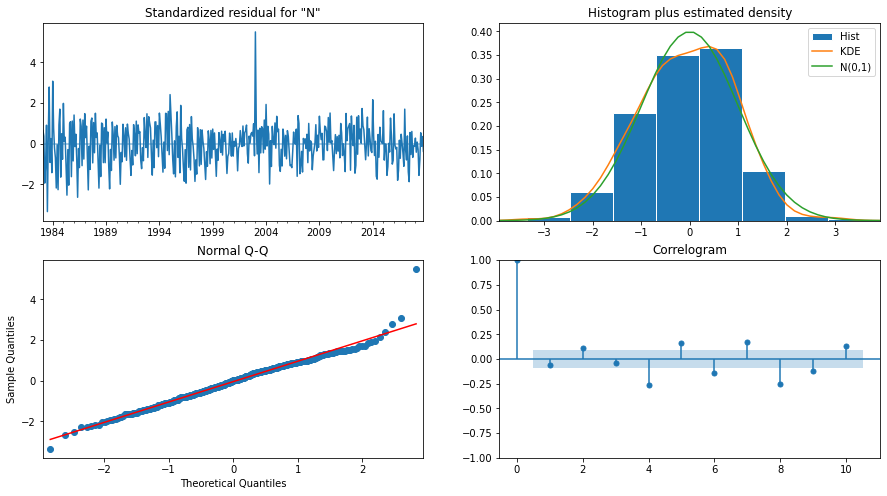

In [238]:
arima_model.Arima_model(df_unemployment_NE, train_df, test_df, 5,1,2)

<p style="color:black; background-color: white; padding:5px;">Despite the different combination of model element values, the result is again apparently not accurate. This can be seen in the graphs shown. However, the indicators are better than the previous models.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom: 10px; margin-bottom:-5px">A Naive Forecasting Model</h3>
<p style="color:black; background-color:white; padding:5px;">The naïve method of forecasting dictates that we use the previous period to forecast for the next period. In the present study of the method, we will test how the model performs when using a lag in the values: from the previous period to the t-6 period.</p>

In [239]:
def plot_series( x, y, w, w1):
    plt.plot(x, y)
    plt.xlabel("years")
    plt.ylabel("rate of unemployment")
    x_pos = 15000
    x_pos1 = 13000
    y_pos = 10
    y_pos1 = 9.5
    plt.text(x_pos1, y_pos, "RMSE: ")
    plt.text(x_pos1, y_pos1, "MAPE: ")
    plt.text(x_pos, y_pos, w)
    plt.text(x_pos, y_pos1, w1)
    plt.grid(True)
    
def plot_series1(x, y):
    plt.plot(x, y)
    plt.xlabel("years")
    plt.ylabel("rate of unemployment")
    plt.grid(True)
    
def moving_average_forecast(series, window_size):
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

def naive_model(df, split, test_df,variable):
    f = plt.figure(figsize=(25,10))
    for i in range(1,7):
        moving_avg = moving_average_forecast(df[variable], i)[split_time - i:]
        mse = mean_squared_error(test_df, moving_avg)**0.5
        mape = mean_absolute_percentage_error(test_df, moving_avg)


        f.add_subplot(2, 3, i)
        plot_series(df.index, df[variable], mse, mape)
        plot_series(test_df.index, test_df[variable], mse, mape)
        plot_series(test_df.index, moving_avg, mse, mape)
        plt.title(f" t-{i}")


    plt.show()

    f = plt.figure(figsize=(25,10))
    for i in range(4,10):
        moving_avg = moving_average_forecast(df[variable], i)[split_time - i:]
        f.add_subplot(2, 3, i-3)
        plot_series1(test_df.index, test_df[variable])
        plot_series1(test_df.index, moving_avg)
        plt.title(f" t-{i}")

    plt.show()     
    
    moving_avg1 = moving_average_forecast(df[variable], 1)[split_time - 1:]
    mse1 = mean_squared_error(test_df, moving_avg1)**0.5
    mape1 = mean_absolute_percentage_error(test_df, moving_avg1)
    data = [["Naive model",mse1,mape1]]
    global time_results_naive
    time_results_naive = pd.DataFrame(data, columns=['model','RMSE','MAPE'])

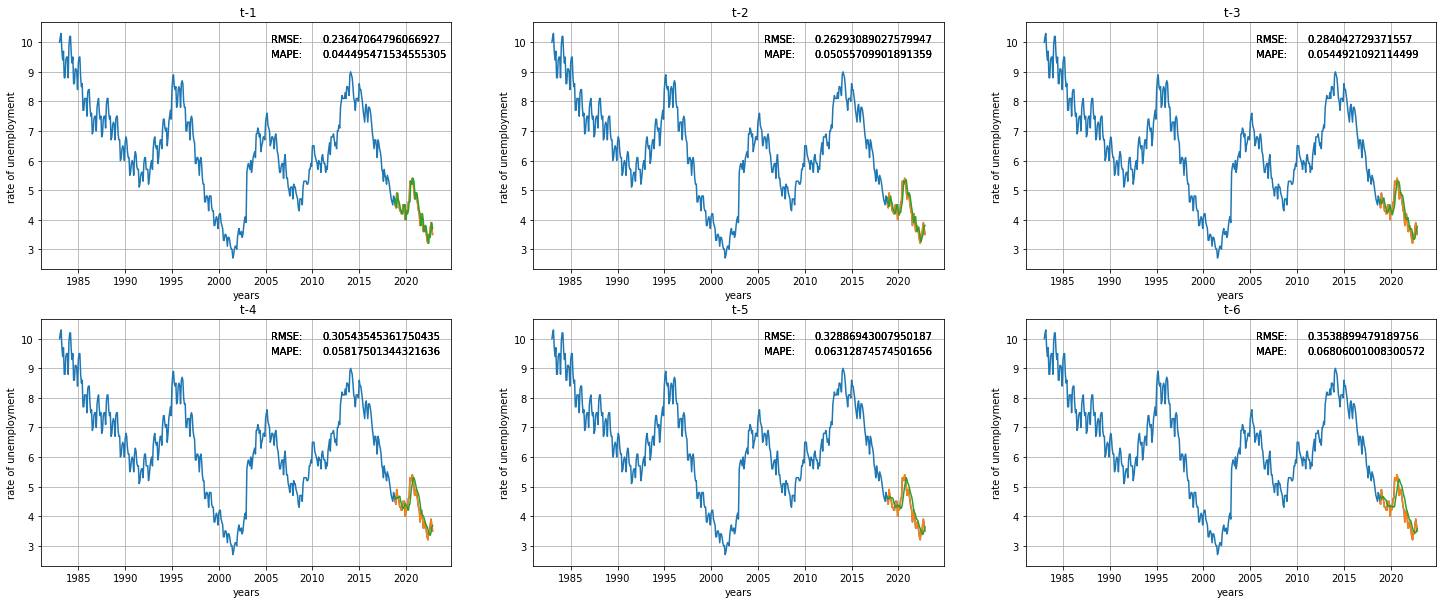

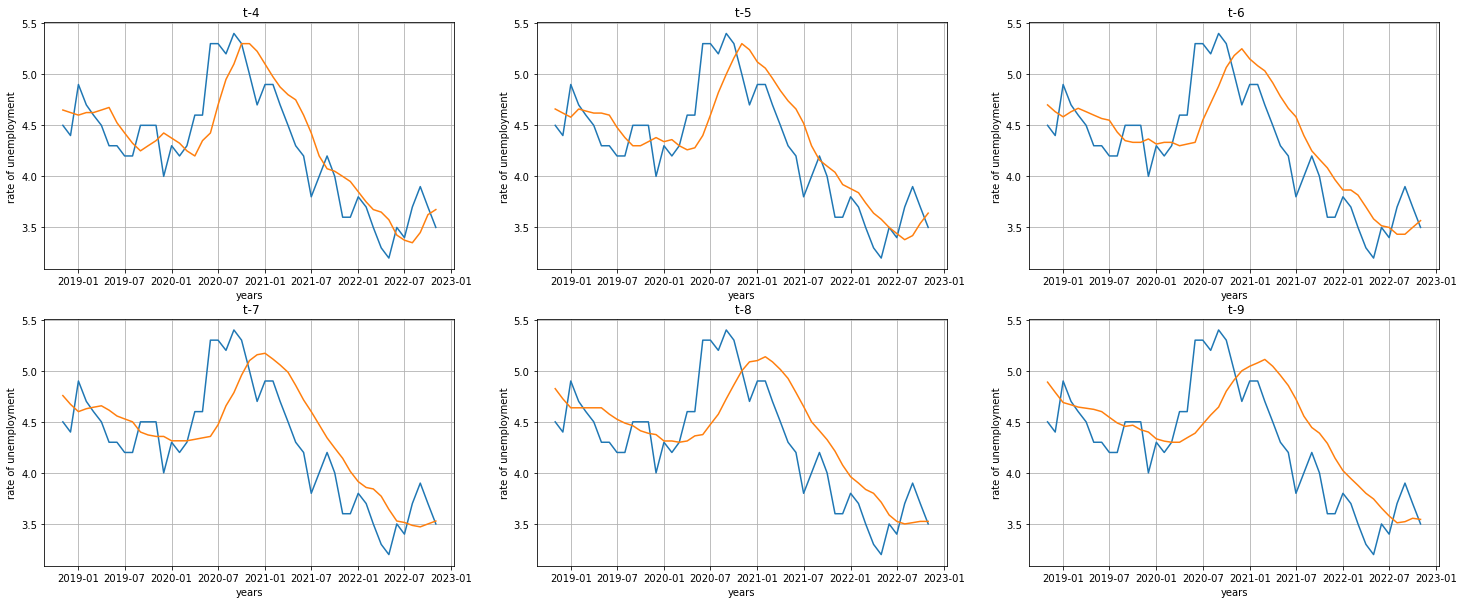

In [240]:
naive_model(df_unemployment_NE, 430, test_df, "Netherlands")

<p style="color:black; background-color: white; padding:5px;">The data from the graphs above show that the model is doing extremely well. The correct model is the one based on the previous period. However, in the absence of a previous period from which to make the forecast, the model will encounter serious difficulties.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom: 10px; margin-bottom:-5px">Exponential Smoothing</h3>
<p style="color:black; background-color:white; padding:5px;">Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality. There are three main types of exponential smoothing time series forecasting methods. A simple method that assumes no systematic structure, an extension that explicitly handles trends, and the most advanced approach that add support for seasonality. We will use all of them and see the results.</p>

In [241]:
def Exponential_Smoothing(df, df1, series ,seasonal_periods,forecast):
    
    #Single Exponential_Smoothing
    single_exp = SimpleExpSmoothing(df).fit()
    single_exp_train_pred = single_exp.fittedvalues
    single_exp_test_pred = single_exp.forecast(forecast)
    
    #Double Exponential Smoothing
    double_exp = ExponentialSmoothing(df, 
                                      trend=None, 
                                      initialization_method='heuristic', 
                                      seasonal='add', 
                                      seasonal_periods=seasonal_periods, 
                                      damped_trend=False).fit()
    double_exp_train_pred = double_exp.fittedvalues
    double_exp_test_pred = double_exp.forecast(forecast)

    #Triple Exponential Smoothing 
    global hw_model

    hw_model = ExponentialSmoothing(df[series],
                              trend    ='add',
                              initialization_method='heuristic',
                              seasonal = "add", 
                              seasonal_periods=seasonal_periods, 
                              damped_trend=True).fit()
    hw_train_pred =  hw_model.fittedvalues
    hw_test_pred =  hw_model.forecast(forecast)
    
    fig, axs = plt.subplots(4, 1, figsize=(15, 20))
    axs[0].plot(df[series], label='train_df')
    axs[0].plot(df1[series], label='test_df')
    axs[0].plot(single_exp_test_pred, color='g', label='Prediction')
    axs[0].legend()
    axs[0].set_xlabel("PC number")
    axs[0].set_ylabel("Explayned variance")
    axs[0].set_title("Single Exponential Smoothing")
    x_pos = 17870
    x_pos1 = 17800
    y_pos = 12.3
    y_pos1 = 12
    mse1 = mean_squared_error(test_df, single_exp_test_pred)**0.5
    mape1 = mean_absolute_percentage_error(test_df, single_exp_test_pred)
    axs[0] = plt.text(x_pos1, y_pos, "RMSE: ")
    axs[0] = plt.text(x_pos1, y_pos1, "MAPE: ")
    axs[0] = plt.text(x_pos, y_pos, mse1)
    axs[0] = plt.text(x_pos, y_pos1, mape1)

    axs[1].plot(df[series], label='train_df')
    axs[1].plot(df1[series], label='test_df')
    axs[1].plot(double_exp_test_pred, color='g', label='Prediction')
    axs[1].legend()
    axs[1].set_xlabel("years")
    axs[1].set_ylabel("rate of unemployment")
    axs[1].set_title("Double Exponential Smoothing")
    x_pos = 17870
    x_pos1 = 17800
    y_pos = 9.3
    y_pos1 = 9
    mse2 = mean_squared_error(test_df, double_exp_test_pred)**0.5
    mape2 = mean_absolute_percentage_error(test_df, double_exp_test_pred)
    axs[1] = plt.text(x_pos1, y_pos, "RMSE: ")
    axs[1] = plt.text(x_pos1, y_pos1, "MAPE: ")
    axs[1] = plt.text(x_pos, y_pos, mse2)
    axs[1] = plt.text(x_pos, y_pos1, mape2)
   
    axs[2].plot(df[series], label='train_df')
    axs[2].plot(df1[series], label='test_df')
    axs[2].plot(hw_test_pred, color='g', label='Prediction')
    axs[2].legend()
    axs[2].set_xlabel("years")
    axs[2].set_ylabel("rate of unemployment")
    axs[2].set_title("Triple Exponential Smoothing")
    x_pos = 17870
    x_pos1 = 17800
    y_pos = 6.5
    y_pos1 = 6.1
    mse3 = mean_squared_error(test_df, hw_test_pred)**0.5
    mape3 = mean_absolute_percentage_error(test_df, hw_test_pred)
    axs[2] = plt.text(x_pos1, y_pos, "RMSE: ")
    axs[2] = plt.text(x_pos1, y_pos1, "MAPE: ")
    axs[2] = plt.text(x_pos, y_pos, mse3)
    axs[2] = plt.text(x_pos, y_pos1, mape3)
    
    axs[3].plot(df1[series], label='test_df')
    axs[3].plot(single_exp_test_pred, color='g', label='Prediction Single Exponential Smoothing')
    axs[3].plot(double_exp_test_pred, color='r', label='Prediction Double Exponential Smoothing')
    axs[3].plot(hw_test_pred, color='b', label='Prediction Triple Exponential Smoothing')
    axs[3].legend()
    axs[3].set_xlabel("years")
    axs[3].set_ylabel("rate of unemployment")
    axs[3].set_title("Results of the three types Exponential Smoothing")
    
    fig.tight_layout()
    plt.show()
    
    data = [["Triple ES model",mse3,mape3]]
    global time_results_triple
    time_results_triple = pd.DataFrame(data, columns=['model','RMSE','MAPE'])

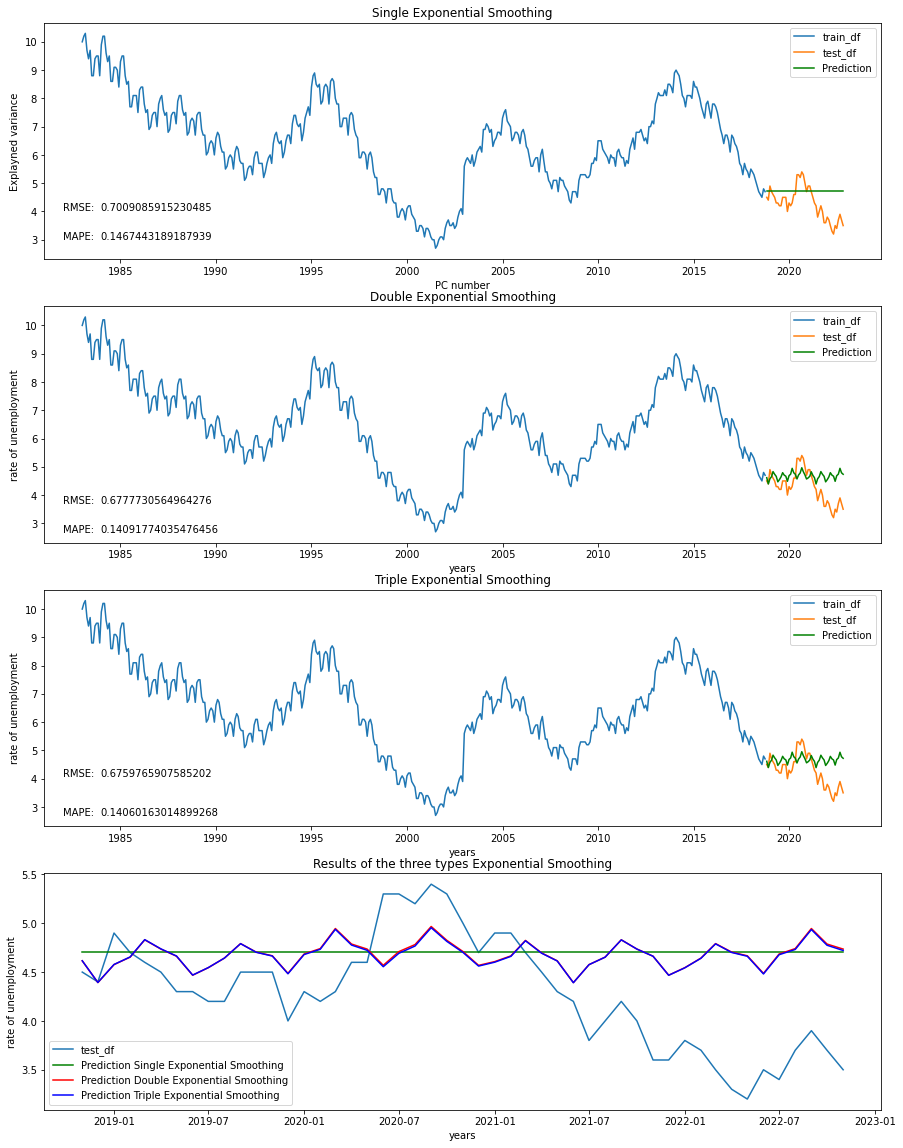

In [242]:
Exponential_Smoothing(train_df, test_df, "Netherlands", 30, 49)

<p style="color:black; background-color: white; padding:5px;">Of the three models, the first actually fails to account for the dynamics of the time series, while the second and third models do almost equally well. Results are added for comparison between models.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom: 10px; margin-bottom:-5px">Results and forecast</h3>
<p style="color:black; background-color:white; padding:5px;">In this subsection, we will summarize the results of the models so far. It will also visualize a prediction in the values of each of the models in the future equal to the test period multiplied by 3. In this way, some expected trend in the prediction value of the models can be noticed.</p>

In [243]:
time_results_all= pd.concat([time_results_ar, time_results_ma, time_results_arma, time_results_arima, time_results_naive, time_results_triple])
time_results_all

model      RMSE      MAPE
0         AR model  1.443837  0.272680
0         MA model  2.214621  0.522615
0       ARMA model  1.459762  0.277074
0      ARIMA model  0.647409  0.133115
0      Naive model  0.236471  0.044495
0  Triple ES model  0.675977  0.140602

In [228]:
def forecast(df, names):
    for i, b in zip(df, names):
        predict = i.forecast(len(test_df))
        predict1 = i.forecast(len(test_df)*3)
        fig = plt.figure(figsize=(15, 4))
        plt.plot(train_df, label='train_df')
        plt.plot(test_df, label='train_df')
        plt.plot(predict1, color='r', label='Prediction')
        plt.plot(predict, color='g', label='Prediction')
        plt.title(b)
        plt.xlabel("years")  
        plt.ylabel("rate of unemployment")                

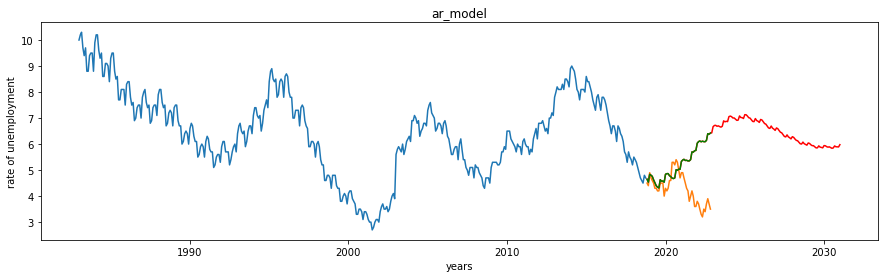

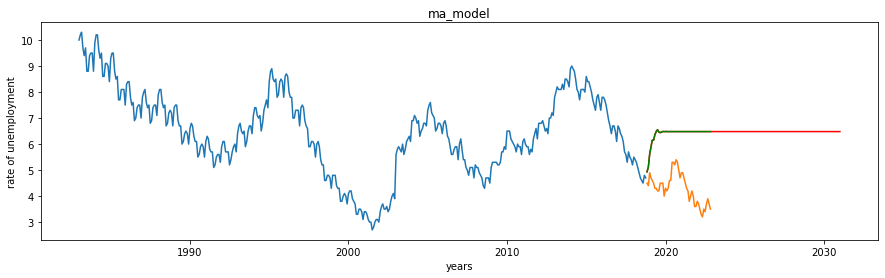

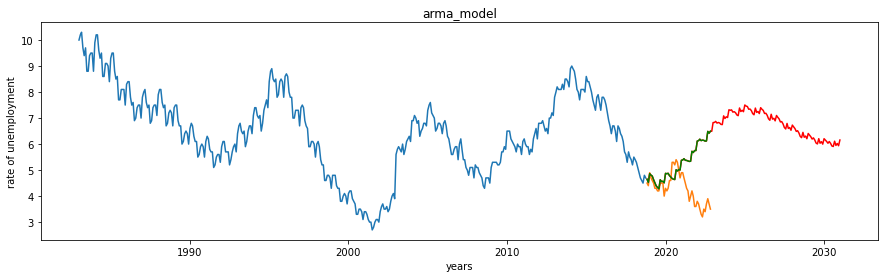

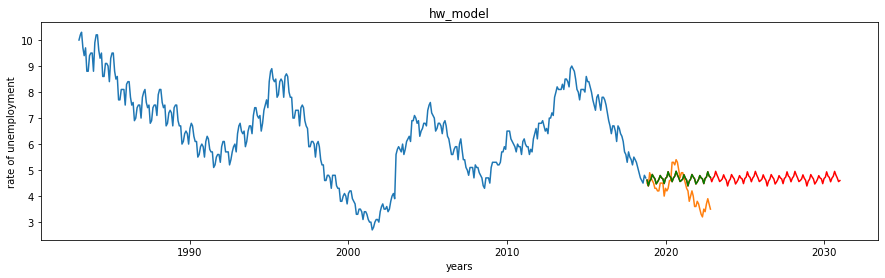

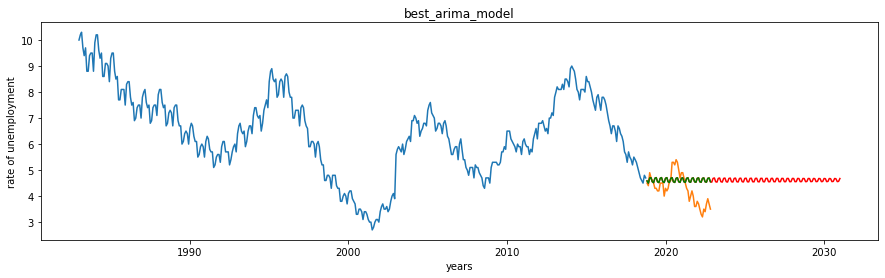

In [229]:
models = [ar_model, ma_model, arma_model, hw_model, best_arima_model]
names = ["ar_model", "ma_model", "arma_model", "hw_model", "best_arima_model"]
forecast(models, names)

<p style="color:black; background-color: white; padding:5px;">The results of the overall table and graphical presentation show that all models have some difficulty in predicting the time series of the unemployment rate in the Netherlands in the context of the business cycle. However, the most accurate turns out to be Naive model with values: RMSE / MAPE - 0.23 / 0.04. After it, the Arima model is positioned as the most accurate with values: RMSE / MAPE - 0.64 / 0.13 They will be the object of comparison in the next point where the deep learning models will also try to give an accurate prediction.</p>

---

<h2 style="color:black; background-color:white; padding:10px; margin-bottom:-15px">2.1. Time series analysis using deep learning models </h2>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-5px">In this point, we will go through the same basic steps like in previous point:</ul>
<li style="color:black; background-color:white; padding:5px">First, prepare the data for analysis using deep learning models;</li>
<li style="color:black; background-color:white; padding:5px">Second, test and analyze the ability of deep learning and its methods to predict data.;</li>

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-5px">Step one. Data preparation</h3>
<p style="color:black; background-color: white; padding:5px;">In this point, we will prepare the data in a format necessary for its use in deep learning models.</p>

<p style="color:black; background-color: white; padding:5px;">Let's recall the created training and test part of the database:</p>

In [249]:
train_part = (100/(len(df_unemployment_NE)/len(train_df)))
test_part = (100/(len(df_unemployment_NE)/len(test_df)))

print(f" Split time: {split_time},\n Size of train_df: {len(train_df)},\n Size of test_df: {len(test_df)},")
print(f" Proportions train/ test: {round(train_part)}% : {round(test_part)}%")

 Split time: 430,
 Size of train_df: 430,
 Size of test_df: 49,
 Proportions train/ test: 90% : 10%


<p style="color:black; background-color: white; padding:5px;">In deep learning models that are going to be used for prediction, several basic parameters must be defined. Each one of them is important and their initial definition with specific values will be the subject of further analysis to improve the models. These parameters include: number of past years that will be used to predict a certain number of future years. Initially the following values will be set: 20 past years ("past_steps") will be used to predict 1 present ("future_steps"). For batch_size we will put value 10 , and for shuffle_buffer_size value the length of the time series.</p>

In [250]:
past_steps = 10
future_steps = 1
batch_size = 10
shuffle_buffer_size = len(df_unemployment_NE)

<ul style="color:black; background-color:white; padding:5px; margin-bottom:-5px">An important point to mark before not only running the models but also before splitting the database is whether validation will be performed during training or not. We generally have several options:</ul>
<li style="color:black; background-color:white; padding:5px">first to divide the data into a training and a test part and to perform the validation through validation data = test part;</li>
<li style="color:black; background-color:white; padding:5px">second, to divide the data into a training and a test part and to perform the validation through validation split = for example 10% (0.1);</li>
<li style="color:black; background-color:white; padding:5px">third, to divide the data into a training, validation and a test part and to perform the validation through validation data = validation part;</li>
<li style="color:black; background-color:white; padding:5px">fourth, not to perform validation;</li>

<h3 style="color:black; background-color:white; padding:5px; padding-bottom: 10px; margin-bottom:-15px">Split the time series</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-5px">We will try several combinations so we will split the data into two groups: first group training - validation and test, which will use the validation split for validation, and second part training and test, which will use the validation split for validation. For this reason, several basic functions are created.</ul>
<li style="color:black; background-color:white; padding:5px">The first function, is to visualize the presentation of the models (error / loss);</li>
<li style="color:black; background-color:white; padding:5px">The second function for dividing the data into training - validation and test part;</li>
<li style="color:black; background-color:white; padding:5px">The third function to convert them to tensorflow format;</li>
<li style="color:black; background-color:white; padding:5px">The fourth function to divide the data into training and test part;</li>

In [253]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
    
def split_data(series, train_fraq, test_len):
    test_slice = len(series)-test_len
    test_data = series[test_slice:]
    train_val_data = series[:test_slice]

    train_size = int(len(train_val_data) * train_fraq)
    train_data = train_val_data[:train_size]
    val_data = train_val_data[train_size:]
    
    return train_data, val_data, test_data

def window_dataset(df, past_steps, future_steps, batch_size, shuffle_buffer_size):
    #Create a windowed tensorflow dataset
    #create a window with n steps back plus the size of the prediction length
    window = past_steps + future_steps
    
    #expand dimensions to 3D to fit with LSTM inputs
    #creat the inital tensor dataset
    tensorflow_dataset = tf.data.Dataset.from_tensor_slices(df)
    
    #create the window function shifting the data by the prediction length
    tensorflow_dataset = tensorflow_dataset.window(window, shift=future_steps, drop_remainder=True)
    
    #flatten the dataset and batch into the window size
    tensorflow_dataset = tensorflow_dataset.flat_map(lambda x : x.batch(window))
    tensorflow_dataset = tensorflow_dataset.shuffle(shuffle_buffer_size)    
    
    #create the supervised learning problem x and y and batch
    tensorflow_dataset = tensorflow_dataset.map(lambda x : (x[:-future_steps], x[-future_steps:]))
    tensorflow_dataset = tensorflow_dataset.batch(batch_size).prefetch(1)
    return tensorflow_dataset

def train_test_dataset(df, past_steps):
    df_as_numpy = df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_numpy)-past_steps):
        row = [[a] for a in df_as_numpy[i:i+past_steps]]
        x.append(row)
        label = df_as_numpy[i+past_steps]
        y.append(label)
    return np.array(x), np.array(y)

In [251]:
train_data, val_data, test_data = split_data(df_unemployment_NE, train_fraq=0.90, test_len=59)
print(f"Train Data Shape: {train_data.shape}")
print(f"Val Data Shape: {val_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

train_tds = window_dataset(train_data,  past_steps, future_steps, batch_size, shuffle_buffer_size)
val_tds = window_dataset(val_data,  past_steps, future_steps, batch_size, shuffle_buffer_size)
test_tds = window_dataset(test_data,  past_steps, future_steps, batch_size, shuffle_buffer_size)

for idx,(x,y) in enumerate(train_tds):
    print("x = ", x.numpy().shape)
    print("y = ", y.numpy().shape)
    break

for idx,(x,y) in enumerate(val_tds):
    print("x = ", x.numpy().shape)
    print("y = ", y.numpy().shape)
    break

for idx,(x,y) in enumerate(test_tds):
    print("x = ", x.numpy().shape)
    print("y = ", y.numpy().shape)
    break

Train Data Shape: (378, 1)
Val Data Shape: (42, 1)
Test Data Shape: (59, 1)
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
x =  (10, 10, 1)
y =  (10, 1, 1)
x =  (10, 10, 1)
y =  (10, 1, 1)
x =  (10, 10, 1)
y =  (10, 1, 1)


In [252]:
print(f" Size of time part for prediction is: {len(test_df)}")
prediction = len(test_df)

x_data, y_data = train_test_dataset(df_unemployment_NE['Netherlands'], past_steps)
print(f" The size of x and y parts are: {x_data.shape}, {y_data.shape}")

x_train_df, y_train_df = x_data[:-prediction], y_data[:-prediction]
x_test_df, y_test_df = x_data[-prediction:], y_data[-prediction:]
print(f" The shapes of train/test x and y parts are: x_train {x_train_df.shape}, y_train {y_train_df.shape}, x_test {x_test_df.shape}, y_test {y_test_df.shape}")

 Size of time part for prediction is: 49
 The size of x and y parts are: (469, 10, 1), (469,)
 The shapes of train/test x and y parts are: x_train (420, 10, 1), y_train (420,), x_test (49, 10, 1), y_test (49,)


<p style="color:black; background-color: white; padding:5px;">Once we have the data ready to use in the models it's time to move on to it.</p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step two. Time series analysis using deep learning.</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-5px">In this step, the time series will be analyzed using multiple deep learning models, this includes the following models:</ul>
<li style="color:black; background-color:white; padding:5px">simple DNN model with one layer</li>
<li style="color:black; background-color:white; padding:5px">advanced DNN model with three layers;</li>
<li style="color:black; background-color:white; padding:5px">simple LSTM model with one LSTM layer;</li>
<li style="color:black; background-color:white; padding:5px">advanced LSTM model with three LSTM layers;</li>
<li style="color:black; background-color:white; padding:5px">simple CNN model with one layer</li>
<li style="color:black; background-color:white; padding:5px">advanced CNN model with three layers;</li>
<li style="color:black; background-color:white; padding:5px">advanced model combination of DNN, LSTM and CNN;</li>
<li style="color:black; background-color:white; padding:5px">Tuning the best model;</li>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-5px">These models will be explored in the following sequence:</ul>
<li style="color:black; background-color:white; padding:5px">first, a function will be created which, on the example of a simple DNN model, will examine which type of validation gives the most accurate result.</li>
<li style="color:black; background-color:white; padding:5px">second, using the most accurate validation method, simple DNN, LSTM, CNN models will be tested in one function so that their results can be compared;</li>
<li style="color:black; background-color:white; padding:5px">thirdly, the advanced DNN, LSTM, CNN models in one function will be studied together;</li>
<li style="color:black; background-color:white; padding:5px">fourth, the best model will be subject to refinement and optimization of its hyperparameters;</li>

<h3 style="color:black; background-color:white; padding:5px; padding-bottom: 10px; margin-bottom:-5px">Validation methods comparison</h3>
<p style="color:black; background-color: white; padding:5px;">the function below compares three models that validate the data in the three ways described above: by validation split, by validation from test data or by validation by validation split;</p>

In [255]:
def simple_models_validation_methods (window_size, train_df, test_df, variable, x_train, y_train, x_test, y_test, train_tds, val_tds, test_tds):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)

    model1 = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape=[window_size])] , name='Validation_split_model')
    model1.summary()
    model1.compile(
      loss='mean_squared_error',
      optimizer=keras.optimizers.Adam(0.001)
    )

    history1 = model1.fit(
    x_train, y_train,
    validation_split = 0.1,
    epochs=100,
    verbose=0)
    history_df1 = pd.DataFrame(history1.history)
    history_df1['epoch'] = history1.epoch
    display(history_df1.tail())

    test_predictions1 = model1.predict(x_test).flatten()
    test_df[model1.name] = test_predictions1

    fig = plt.figure(figsize=(20, 10))
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
    ax1 = plt.plot(train_df[variable], label='train_df')
    ax1 = plt.plot(test_df[variable], label='test_df')
    ax1 = plt.plot(test_df[model1.name], color='g', label='Prediction')
    ax1 = plt.legend()
    ax1 = plt.title(model1.name)

    ax1 = plt.xlabel("years")
    ax1 = plt.ylabel("rate of unemployment")
    x_pos = 15000
    x_pos1 = 14000
    y_pos = 10
    y_pos1 = 9.5
    w = mean_squared_error(test_df[variable], test_df[model1.name])**0.5
    w1 = mean_absolute_percentage_error(test_df[variable], test_df[model1.name])
    ax1 = plt.text(x_pos1, y_pos, "RMSE: ")
    ax1 = plt.text(x_pos1, y_pos1, "MAPE: ")
    ax1 = plt.text(x_pos, y_pos, w)
    ax1 = plt.text(x_pos, y_pos1, w1)

    ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=1)
    ax2 = plt.plot(test_df[variable], label='test_df')
    ax2 = plt.plot(test_df[model1.name], color='g', label='Prediction')
    ax2 = plt.legend()
    ax2 = plt.xlabel("years")
    ax2 = plt.ylabel("rate of unemployment")

    ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=1)
    ax2 = plot_loss(history1)
    ax2 = plt.legend()
    ax2 = plt.xlabel("years")
    ax2 = plt.ylabel("rate of unemployment")

    fig.tight_layout()
    

    model2 = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape=[window_size])] , name='Validation_test_data_model')
    model2.summary()
    model2.compile(
      loss='mean_squared_error',
      optimizer=keras.optimizers.Adam(0.001)
    )

    history2 = model2.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs=100,
    verbose=0)
    history_df2 = pd.DataFrame(history2.history)
    history_df2['epoch'] = history2.epoch
    display(history_df2.tail())

    test_predictions2 = model2.predict(x_test).flatten()
    test_df[model2.name] = test_predictions2

    fig = plt.figure(figsize=(20, 10))
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
    ax1 = plt.plot(train_df[variable], label='train_df')
    ax1 = plt.plot(test_df[variable], label='test_df')
    ax1 = plt.plot(test_df[model2.name], color='g', label='Prediction')
    ax1 = plt.legend()
    ax1 = plt.title(model2.name)
    ax1 = plt.xlabel("years")
    ax1 = plt.ylabel("rate of unemployment")
    x_pos = 15000
    x_pos1 = 14000
    y_pos = 10
    y_pos1 = 9.5
    w = mean_squared_error(test_df[variable], test_df[model2.name])**0.5
    w1 = mean_absolute_percentage_error(test_df[variable], test_df[model2.name])
    ax1 = plt.text(x_pos1, y_pos, "RMSE: ")
    ax1 = plt.text(x_pos1, y_pos1, "MAPE: ")
    ax1 = plt.text(x_pos, y_pos, w)
    ax1 = plt.text(x_pos, y_pos1, w1)

    ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=1)
    ax2 = plt.plot(test_df[variable], label='test_df')
    ax2 = plt.plot(test_df[model2.name], color='g', label='Prediction')
    ax2 = plt.legend()
    ax2 = plt.xlabel("years")
    ax2 = plt.ylabel("rate of unemployment")

    ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=1)
    ax2 = plot_loss(history2)
    ax2 = plt.legend()
    ax2 = plt.xlabel("years")
    ax2 = plt.ylabel("rate of unemployment")

    fig.tight_layout()
    
    model3 = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape=[window_size])] , name='Validation_valid_data_model')
    model3.summary()
    model3.compile(
      loss='mean_squared_error',
      optimizer=keras.optimizers.Adam(0.001)
    )

    history3 = model3.fit(
    train_tds,
    validation_data = val_tds,
    epochs=100,
    verbose=0)
    history_df3 = pd.DataFrame(history3.history)
    history_df3['epoch'] = history3.epoch
    display(history_df3.tail())

    test_predictions3 = model3.predict(test_tds).flatten()
    test_df[model3.name] = test_predictions3

    fig = plt.figure(figsize=(20, 10))
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
    ax1 = plt.plot(train_df[variable], label='train_df')
    ax1 = plt.plot(test_df[variable], label='test_df')
    ax1 = plt.plot(test_df[model3.name], color='g', label='Prediction')
    ax1 = plt.legend(model3.name)
    ax1 = plt.title("Validation_valid_data_model")
    ax1 = plt.xlabel("years")
    ax1 = plt.ylabel("rate of unemployment")
    x_pos = 15000
    x_pos1 = 14000
    y_pos = 10
    y_pos1 = 9.5
    w = mean_squared_error(test_df[variable], test_df[model3.name])**0.5
    w1 = mean_absolute_percentage_error(test_df[variable], test_df[model3.name])
    ax1 = plt.text(x_pos1, y_pos, "RMSE: ")
    ax1 = plt.text(x_pos1, y_pos1, "MAPE: ")
    ax1 = plt.text(x_pos, y_pos, w)
    ax1 = plt.text(x_pos, y_pos1, w1)

    ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=1)
    ax2 = plt.plot(test_df[variable], label='test_df')
    ax2 = plt.plot(test_df[model3.name], color='g', label='Prediction')
    ax2 = plt.legend()
    ax2 = plt.xlabel("years")
    ax2 = plt.ylabel("rate of unemployment")

    ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=1)
    ax2 = plot_loss(history3)
    ax2 = plt.legend()
    ax2 = plt.xlabel("years")
    ax2 = plt.ylabel("rate of unemployment")

    fig.tight_layout()

Model: "Validation_split_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


loss  val_loss  epoch
95  0.193439  0.191340     95
96  0.193198  0.195211     96
97  0.192835  0.191186     97
98  0.192771  0.186719     98
99  0.192305  0.193795     99

2/2 [==============================] - 0s 3ms/step
Model: "Validation_test_data_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


loss  val_loss  epoch
95  0.570466  0.284599     95
96  0.570064  0.284246     96
97  0.569539  0.283997     97
98  0.569120  0.283731     98
99  0.568543  0.283506     99

2/2 [==============================] - 0s 2ms/step
Model: "Validation_valid_data_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


loss  val_loss  epoch
95  0.593047  0.515183     95
96  0.590823  0.548340     96
97  0.587952  0.561723     97
98  0.582795  0.534549     98
99  0.580251  0.555674     99

5/5 [==============================] - 0s 8ms/step


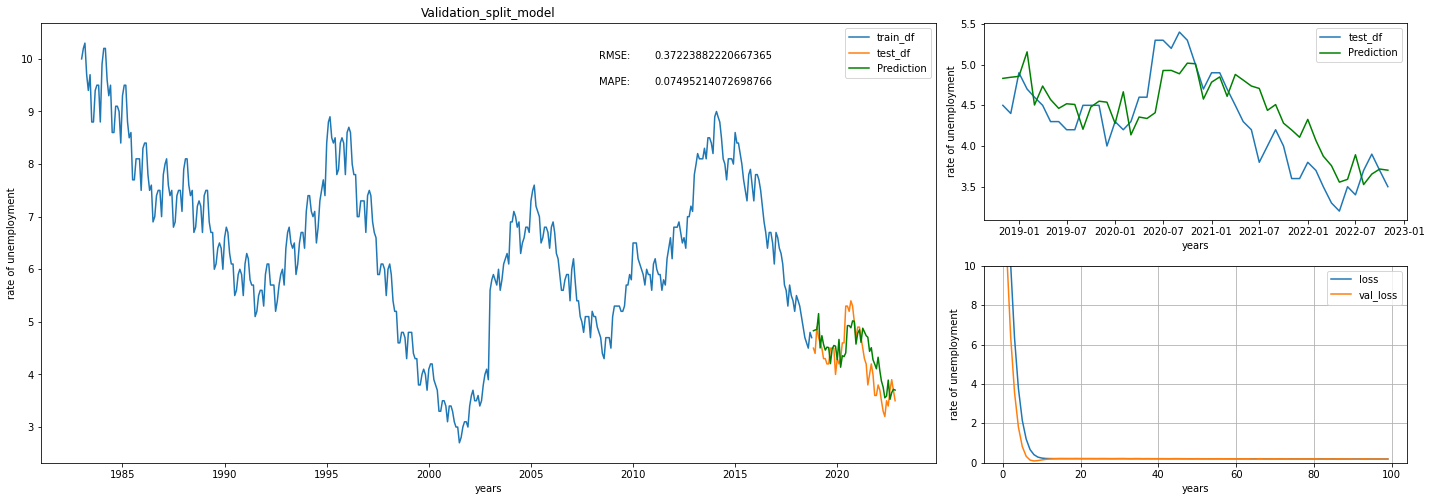

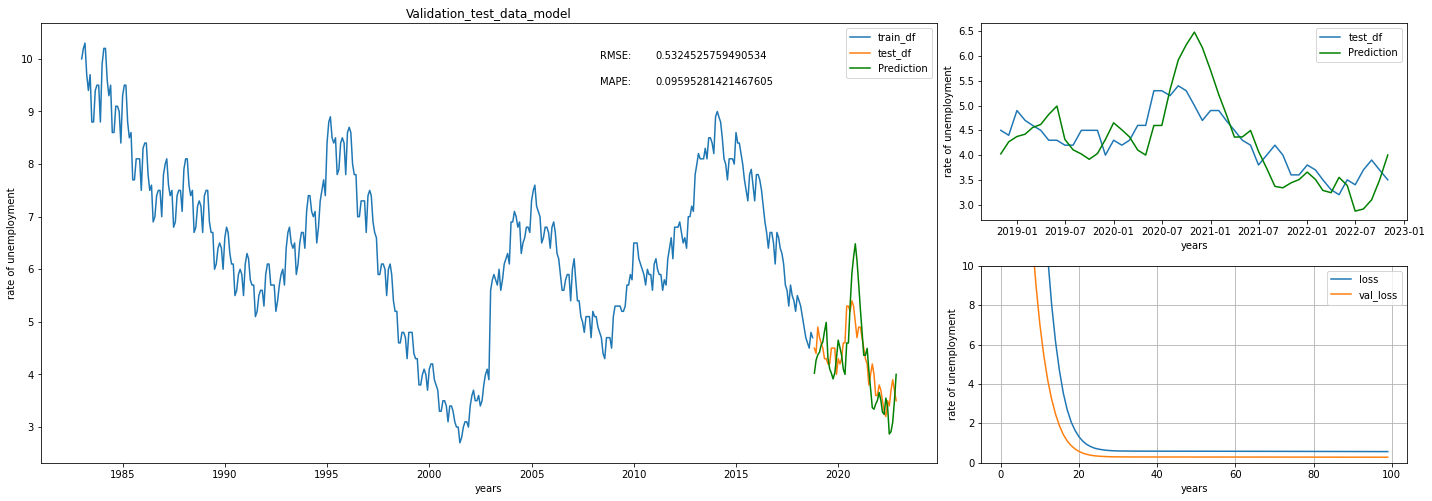

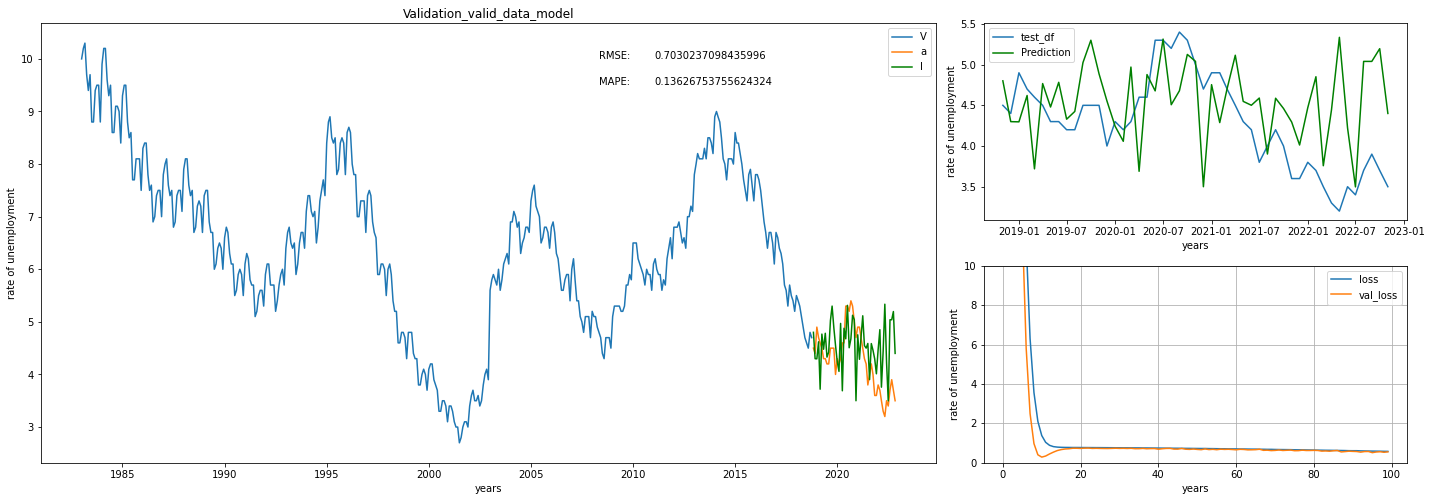

In [256]:
simple_models_validation_methods(10, train_df, test_df, "Netherlands", x_train_df, y_train_df, x_test_df, y_test_df, train_tds, val_tds, test_tds)

<p style="color:black; background-color: white; padding:5px;">The best result is shown by the model used for validation, a validation split of 0.1. It is he who will be used in the following models.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom: 10px; margin-bottom:-5px">Simple DNN, LSTM and CNN models</h3>
<p style="color:black; background-color: white; padding:5px;">In this substep, we will apply the three simple models using one function, test their performance and see the results graphically and numerically. Basic hyperparameters: optimizer "Adam" , learning rate = 0.001, activation = "relu".</p>

In [268]:
def simple_models (past_steps, future_steps, train_df, test_df, variable, x_train, y_train, x_test, y_test):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    
    models = [
        tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(past_steps, future_steps)),
        tf.keras.layers.Dense(1),   
        ], name='DNN_simple_model'),
        
        tf.keras.models.Sequential([
        tf.keras.layers.LSTM(49, activation='relu', input_shape=(past_steps, future_steps), return_sequences=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1)
        ], name='LSTM_simple_model'),
        
        tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(49, kernel_size=6, activation='relu', input_shape=[past_steps,future_steps]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1)
        ], name='CNN_simple_model'),
    ]
    
    for model in models:
        tf.keras.backend.clear_session()
        model.summary()
        model.compile(
          loss='mean_squared_error',
          optimizer=keras.optimizers.Adam(0.001)
        )

        history = model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=100,
        verbose=0)
        history_df = pd.DataFrame(history.history)
        history_df['epoch'] = history.epoch
        display(history_df.tail())
        
        test_predictions = model.predict(x_test).flatten()
        test_df[model.name] = test_predictions
        
        fig = plt.figure(figsize=(20, 10))
        ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
        ax1 = plt.plot(train_df[variable], label='train_df')
        ax1 = plt.plot(test_df[variable], label='test_df')
        ax1 = plt.plot(test_df[model.name], color='g', label='Prediction')
        ax1 = plt.legend()
        ax1 = plt.xlabel("years")
        ax1 = plt.ylabel("rate of unemployment")
        ax1 = plt.title(model.name)
        x_pos = 15000
        x_pos1 = 14000
        y_pos = 10
        y_pos1 = 9.5
        w = mean_squared_error(test_df[variable], test_df[model.name])**0.5
        w1 = mean_absolute_percentage_error(test_df[variable], test_df[model.name])
        ax1 = plt.text(x_pos1, y_pos, "RMSE: ")
        ax1 = plt.text(x_pos1, y_pos1, "MAPE: ")
        ax1 = plt.text(x_pos, y_pos, w)
        ax1 = plt.text(x_pos, y_pos1, w1)

        ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=1)
        ax2 = plt.plot(test_df[variable], label='test_df')
        ax2 = plt.plot(test_df[model.name], color='g', label='Prediction')
        ax2 = plt.legend()
        ax2 = plt.xlabel("years")
        ax2 = plt.ylabel("rate of unemployment")

        ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=1)
        ax2 = plot_loss(history)
        ax2 = plt.legend()
        ax2 = plt.xlabel("years")
        ax2 = plt.ylabel("rate of unemployment")

        fig.tight_layout()

Model: "DNN_simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


loss  val_loss  epoch
95  0.384319  0.314402     95
96  0.384052  0.314199     96
97  0.383956  0.317511     97
98  0.383759  0.315290     98
99  0.383584  0.314673     99

2/2 [==============================] - 0s 2ms/step
Model: "LSTM_simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 49)            9996      
                                                                 
 flatten_1 (Flatten)         (None, 490)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 491       
                                                                 
Total params: 10,487
Trainable params: 10,487
Non-trainable params: 0
_________________________________________________________________


loss  val_loss  epoch
95  0.122746  0.107504     95
96  0.119711  0.063478     96
97  0.113343  0.107175     97
98  0.108750  0.088491     98
99  0.112846  0.072654     99

2/2 [==============================] - 0s 4ms/step
Model: "CNN_simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 49)             343       
                                                                 
 flatten_2 (Flatten)         (None, 245)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 246       
                                                                 
Total params: 589
Trainable params: 589
Non-trainable params: 0
_________________________________________________________________


loss  val_loss  epoch
95  0.195301  0.118332     95
96  0.192911  0.136481     96
97  0.191416  0.144671     97
98  0.194025  0.117481     98
99  0.190753  0.174642     99

2/2 [==============================] - 0s 3ms/step


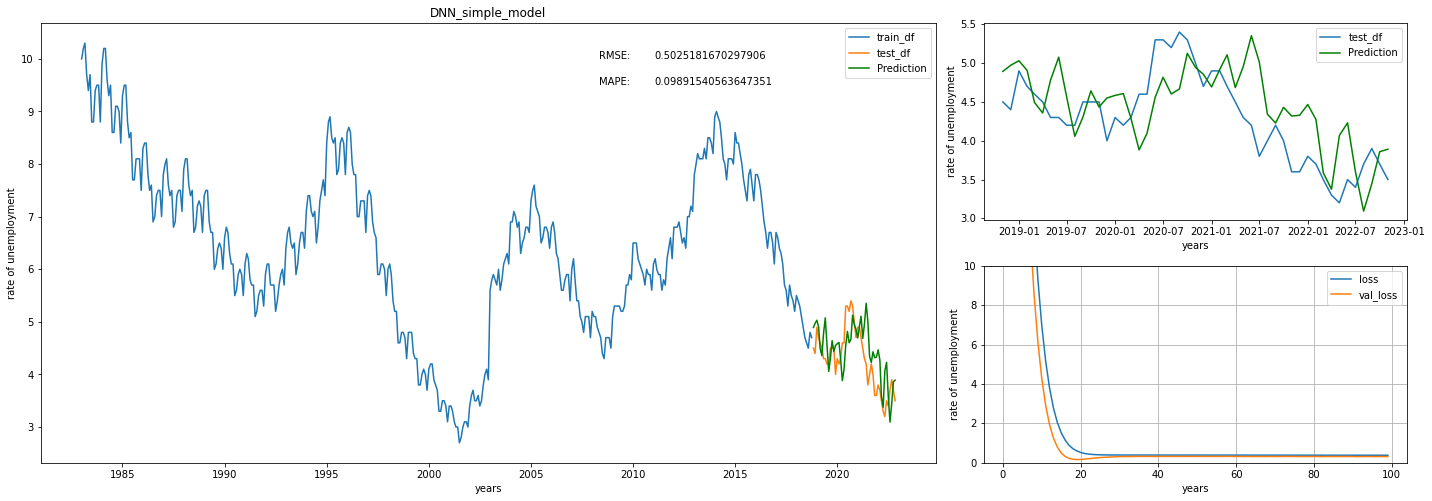

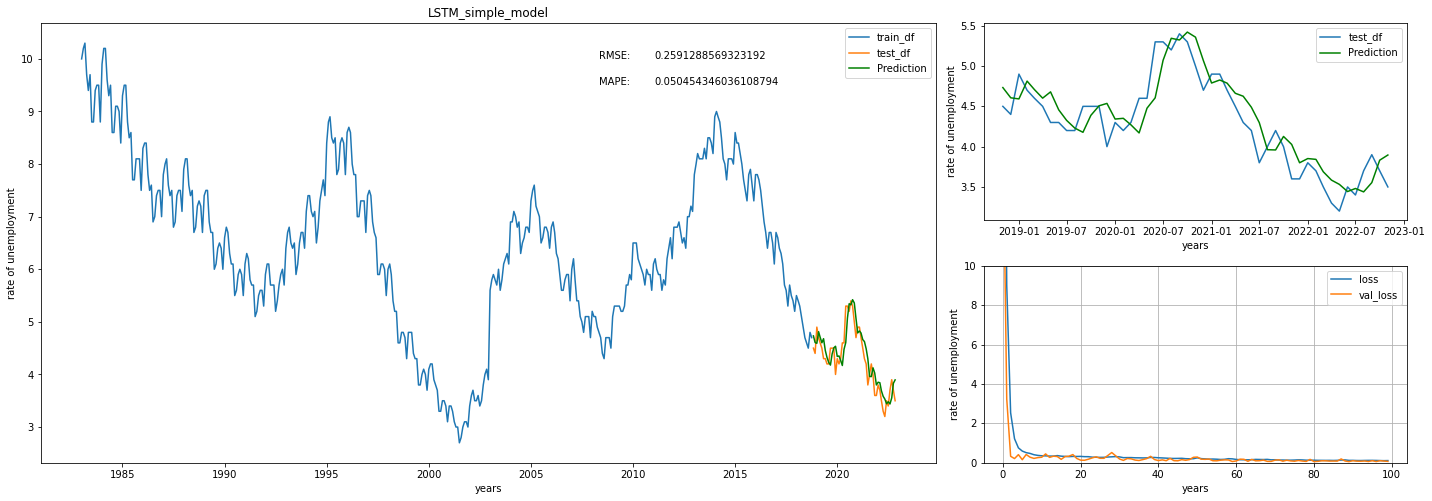

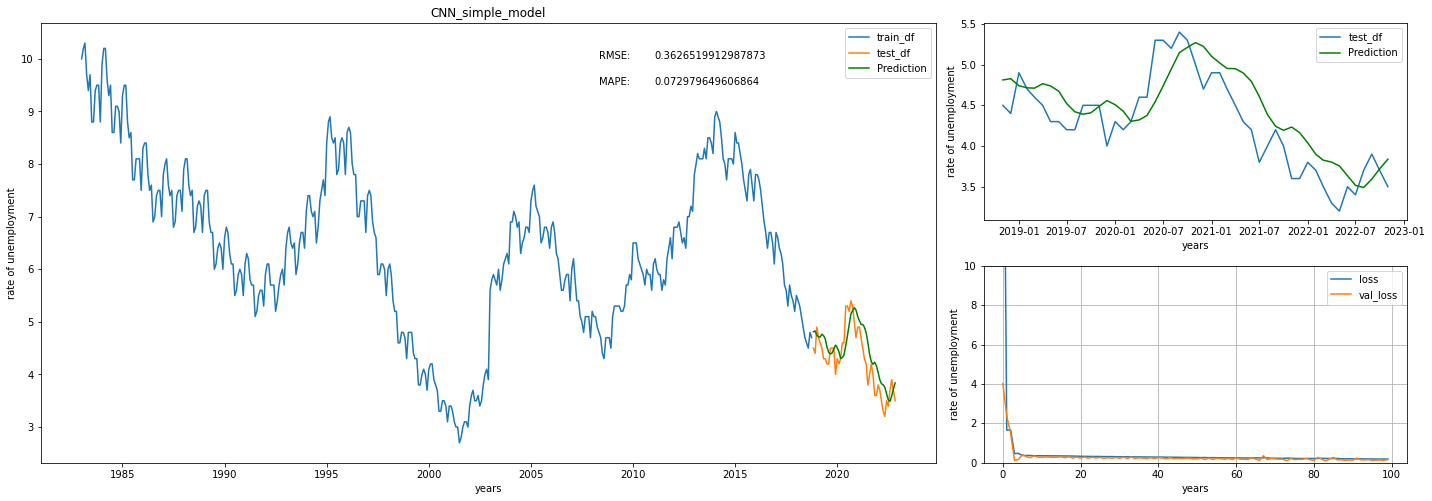

In [269]:
simple_models(past_steps, future_steps, train_df, test_df, "Netherlands", x_train_df, y_train_df, x_test_df, y_test_df)

<p style="color:black; background-color: white; padding:5px;">The LSTM model shows the best results at the moment. Let's see the results in advanced models as well. As models become more complex, a callback function will be used.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom: 10px; margin-bottom:-5px">Advanced DNN, LSTM and CNN models</h3>
<p style="color:black; background-color: white; padding:5px;">In this substep, we will apply the three advanced models, test their performance and see the results graphically and numerically. The same hyperparameters as for simple models will be used. Due to the complexity of the current models, it will also be used to early stoping function to terminate epochs on good results.</p>

In [278]:
def advanced_models (past_steps, future_steps,  train_df, test_df, variable, x_train, y_train, x_test, y_test):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    
    models = [
        tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(past_steps, future_steps)),
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(future_steps)
        ], name='DNN_advanced_model'),
        
        tf.keras.models.Sequential([
        tf.keras.layers.LSTM(49, activation='relu', input_shape=(past_steps, future_steps), return_sequences=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(future_steps)
        ], name='LSTM_advanced_model'),
        
        tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(49, kernel_size=6, activation='relu', input_shape=(past_steps, future_steps),),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(future_steps)
        ], name='CNN_advanced_model'),
    ]
    
    for model in models:
        tf.keras.backend.clear_session()
        model.summary()
        model.compile(
          loss='mean_squared_error',
          optimizer=keras.optimizers.Adam(0.001)
        )
        callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
        history = model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=100,
        verbose=0, 
        callbacks=[callback])
        
        history_df = pd.DataFrame(history.history)
        history_df['epoch'] = history.epoch
        display(history_df.tail())
        
        test_predictions = model.predict(x_test).flatten()
        test_df[model.name] = test_predictions
        
        fig = plt.figure(figsize=(20, 10))
        ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
        ax1 = plt.plot(train_df[variable], label='train_df')
        ax1 = plt.plot(test_df[variable], label='test_df')
        ax1 = plt.plot(test_df[model.name], color='g', label='Prediction')
        ax1 = plt.legend()
        ax1 = plt.xlabel("years")
        ax1 = plt.ylabel("rate of unemployment")
        ax1 = plt.title(model.name)
        x_pos = 15000
        x_pos1 = 14000
        y_pos = 10
        y_pos1 = 9.5
        w = mean_squared_error(test_df[variable], test_df[model.name])**0.5
        w1 = mean_absolute_percentage_error(test_df[variable], test_df[model.name])
        ax1 = plt.text(x_pos1, y_pos, "RMSE: ")
        ax1 = plt.text(x_pos1, y_pos1, "MAPE: ")
        ax1 = plt.text(x_pos, y_pos, w)
        ax1 = plt.text(x_pos, y_pos1, w1)

        ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=1)
        ax2 = plt.plot(test_df[variable], label='test_df')
        ax2 = plt.plot(test_df[model.name], color='g', label='Prediction')
        ax2 = plt.legend()
        ax2 = plt.xlabel("years")
        ax2 = plt.ylabel("rate of unemployment")

        ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=1)
        ax2 = plot_loss(history)
        ax2 = plt.legend()
        ax2 = plt.xlabel("years")
        ax2 = plt.ylabel("rate of unemployment")

        fig.tight_layout()

Model: "DNN_advanced_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________
Epoch 10: early stopping


loss  val_loss  epoch
5  0.218075  0.192936      5
6  0.207923  0.129154      6
7  0.200141  0.170013      7
8  0.198747  0.124766      8
9  0.193937  0.122932      9

2/2 [==============================] - 0s 2ms/step
Model: "LSTM_advanced_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 49)            9996      
                                                                 
 flatten_1 (Flatten)         (None, 490)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                31424     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 41,485
Trainable params: 41,485
Non-trainable params: 0
_________________________________________________________________
Epoch 9: early stopping


loss  val_loss  epoch
4  0.391468  0.352529      4
5  0.364493  0.298063      5
6  0.354482  0.355443      6
7  0.356352  0.367659      7
8  0.353024  0.276874      8

2/2 [==============================] - 0s 3ms/step
Model: "CNN_advanced_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 49)             343       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 49)            0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 98)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                6336      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,744
Trainable params: 6,744
Non-trainable param

loss  val_loss  epoch
4  0.454731  0.291415      4
5  0.393613  0.382352      5
6  0.388419  0.267634      6
7  0.385933  0.297686      7
8  0.383606  0.348719      8

2/2 [==============================] - 0s 2ms/step


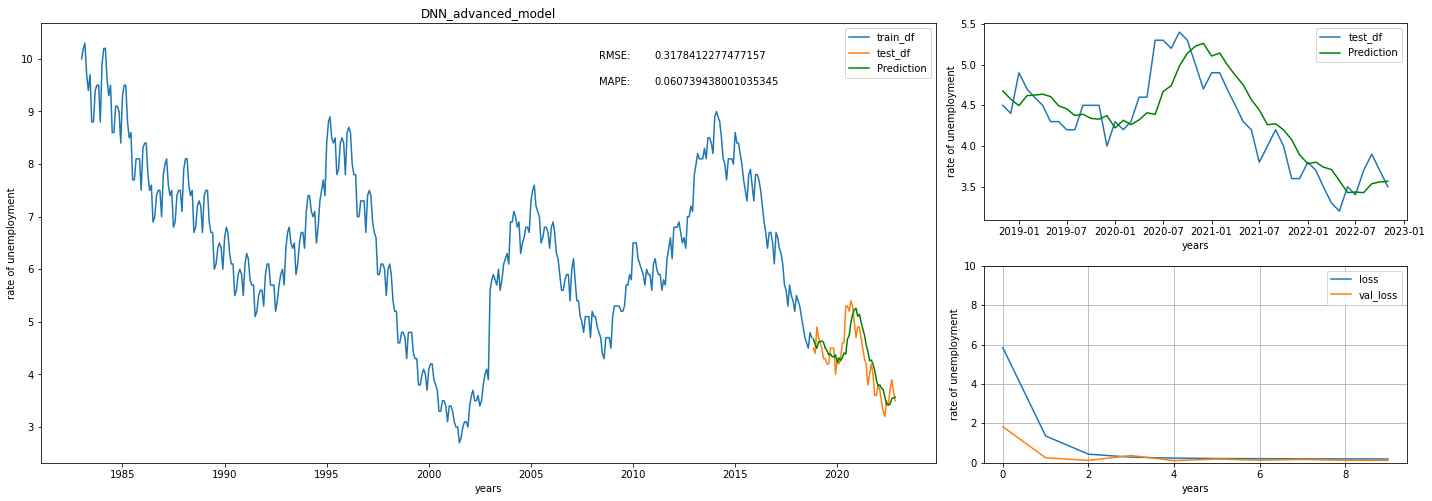

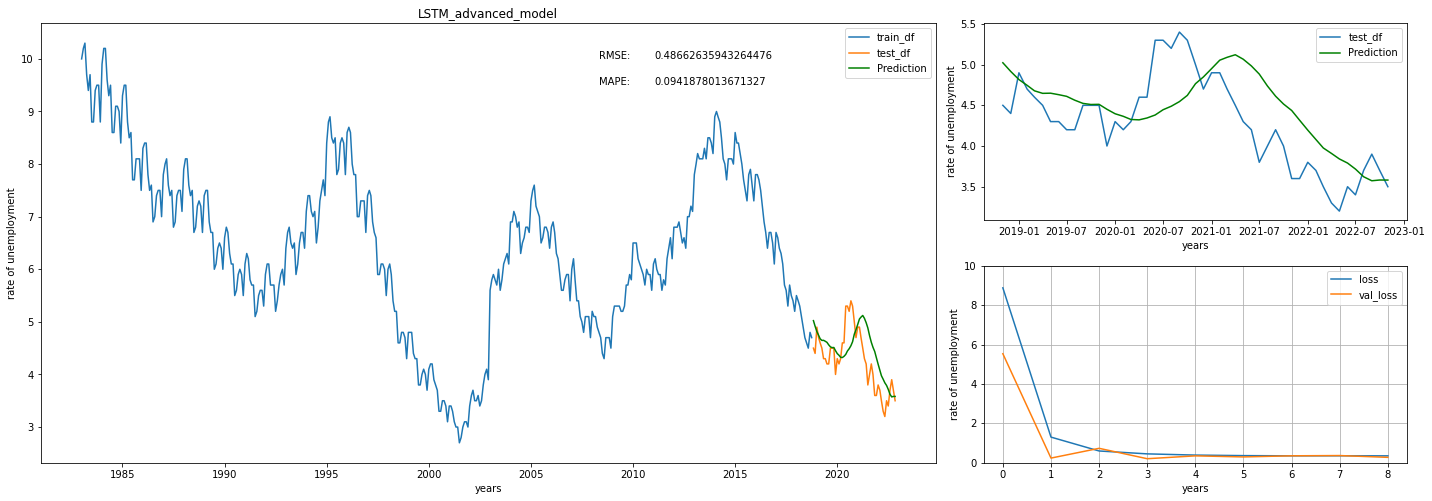

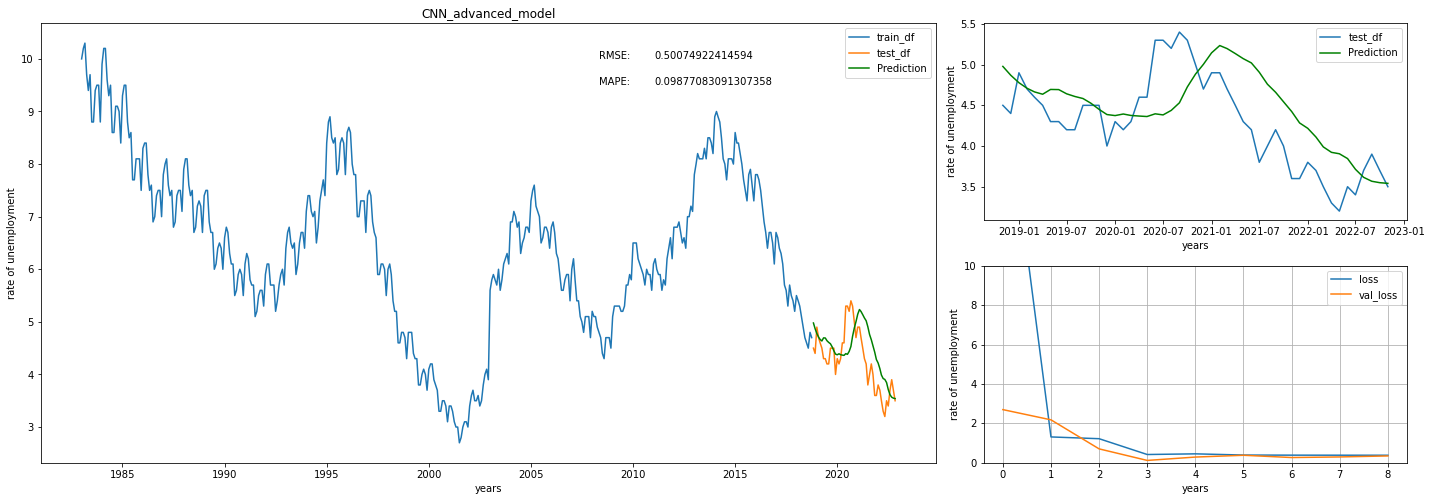

In [279]:
advanced_models(past_steps, future_steps, train_df, test_df, "Netherlands", x_train_df, y_train_df, x_test_df, y_test_df)

<p style="color:black; background-color: white; padding:5px;">Of the three types of models, only the DNN has a visible improvement, while the other two models show worse results.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom: 10px; margin-bottom:-5px">Complex DNN, LSTM and CNN model</h3>
<p style="color:black; background-color: white; padding:5px;">In this substep, we will create a complex model that contains layers of the three models, we will apply it and will test the performance and see the results graphically and numerically.</p>

In [314]:
def complex_model (past_steps, future_steps, train_df, test_df, variable, x_train, y_train, x_test, y_test):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=6, activation='relu', input_shape=(past_steps,future_steps)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(49, activation='relu', return_sequences=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(future_steps)
    ], name='DNN_LSTM_CNN_advanced_model')
    
    model.summary()
    model.compile(
      loss='mean_squared_error',
      optimizer=keras.optimizers.Adam(0.001)
    )

    history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=100,
    verbose=0)
    history_df = pd.DataFrame(history.history)
    history_df['epoch'] = history.epoch
    display(history_df.tail())

    test_predictions = model.predict(x_test).flatten()
    test_df[model.name] = test_predictions

    fig = plt.figure(figsize=(20, 10))
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
    ax1 = plt.plot(train_df[variable], label='train_df')
    ax1 = plt.plot(test_df[variable], label='test_df')
    ax1 = plt.plot(test_df[model.name], color='g', label='Prediction')
    ax1 = plt.legend()
    ax1 = plt.xlabel("years")
    ax1 = plt.ylabel("rate of unemployment")
    ax1 = plt.title(model.name)
    x_pos = 15000
    x_pos1 = 14000
    y_pos = 10
    y_pos1 = 9.5
    w = mean_squared_error(test_df[variable], test_df[model.name])**0.5
    w1 = mean_absolute_percentage_error(test_df[variable], test_df[model.name])
    ax1 = plt.text(x_pos1, y_pos, "RMSE: ")
    ax1 = plt.text(x_pos1, y_pos1, "MAPE: ")
    ax1 = plt.text(x_pos, y_pos, w)
    ax1 = plt.text(x_pos, y_pos1, w1)

    ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=1)
    ax2 = plt.plot(test_df[variable], label='test_df')
    ax2 = plt.plot(test_df[model.name], color='g', label='Prediction')
    ax2 = plt.legend()
    ax2 = plt.xlabel("years")
    ax2 = plt.ylabel("rate of unemployment")

    ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=1)
    ax2 = plot_loss(history)
    ax2 = plt.legend()
    ax2 = plt.xlabel("years")
    ax2 = plt.ylabel("rate of unemployment")

    fig.tight_layout()
    
    data = [["DNN_LSTM_CNN_advanced_model",w,w1]]
    global time_results_complex_deep_learning
    time_results_complex_deep_learning = pd.DataFrame(data, columns=['model','RMSE','MAPE'])

Model: "DNN_LSTM_CNN_advanced_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             448       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 1, 64)             33024     
                                                                 
 lstm_1 (LSTM)               (None, 49)

loss  val_loss  epoch
95  0.213824  0.207730     95
96  0.201056  0.145535     96
97  0.212866  0.240931     97
98  0.199951  0.156734     98
99  0.227003  0.193535     99

2/2 [==============================] - 0s 3ms/step


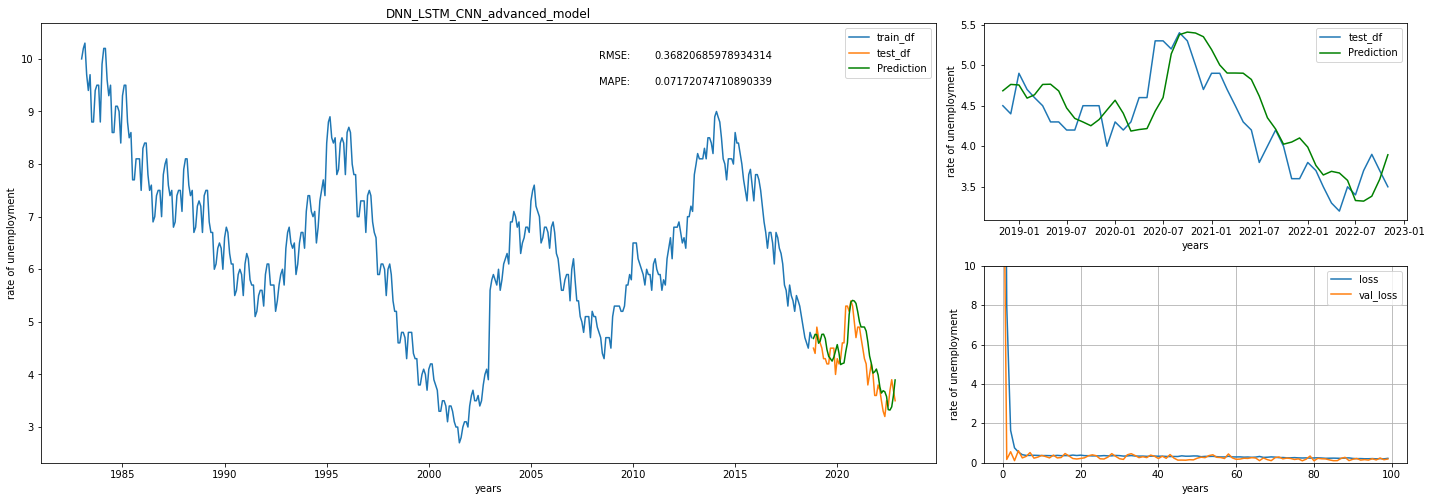

In [315]:
complex_model(past_steps, future_steps, train_df, test_df, "Netherlands", x_train_df, y_train_df, x_test_df, y_test_df)

<p style="color:black; background-color: white; padding:5px;">The results are better than many other models. So far the results are as follows:</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom: 10px; margin-bottom:-5px">Tune the complex DNN, LSTM and CNN model</h3>
<p style="color:black; background-color: white; padding:5px;">In this substep, we will improve the complex model by creating a function to optimize the hyperparameters and output the best combination and the best model. Will test the performance and see the results graphically and numerically.</p>

In [301]:
def tune_complex_model(hp):
    tf.random.set_seed(3)
    model = keras.Sequential() 
    
    model.add(layers.Input(shape = (10, 1)))
    
    model.add(layers.BatchNormalization())
    
    for i in range(hp.Int('n_layers', 2, 3)):
        model.add(
            keras.layers.Conv1D(
                filters=hp.Int(f'Conv1D_{i}_filters',min_value=50,max_value=100,step=50),
                activation=hp.Choice("activation", ["relu", "tanh"]),
                kernel_size = hp.Int(f'Conv1D_{i}_kernel_size',min_value=1,max_value=2,step=1)
            ),
            )
    model.add(keras.layers.MaxPooling1D(3, padding="same"))

    for i in range(hp.Int('n_layers', 2, 3)):
        model.add(keras.layers.Bidirectional(
            keras.layers.LSTM(
                units=hp.Int(f'lstm_{i}_units',min_value=50,max_value=100,step=50),
                activation=hp.Choice("activation", ["relu", "tanh"]),
                return_sequences=True)
            ))
        
    model.add(keras.layers.Flatten()),
    
    for i in range(1, hp.Int("f'dense{i}_units'", 2, 3)):
        model.add(
            layers.Dense(
                # Define the hyperparameter.
                units=hp.Int("units", min_value=50, max_value=100, step=50),
                activation=hp.Choice("activation", ["relu", "tanh"])
            )
        )
    model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1)))
        
    model.add(keras.layers.Dense(1))
    
            
    hp_learning_rate = hp.Choice('learning_rate', values=[0.001])
   
    optimizers_dict = {
        "Adam":    Adam(learning_rate=hp_learning_rate),
        "SGD":     SGD(learning_rate=hp_learning_rate),
        }

    hp_optimizers = hp.Choice(
        'optimizer', 
        values=["Adam", "SGD"]
        )

    model.compile(
        optimizer=optimizers_dict[hp_optimizers], loss="mean_absolute_error", metrics = ['mse', 'mape']
    )
    
    #print(model9.predict(x_train_df[:10]))
    return model

In [306]:
tuner_complex_model= kt.RandomSearch(
        tune_complex_model,
        objective='mse',
        max_trials=2,
        executions_per_trial=3,
        directory='random_search',
        project_name="tune_time_model",
        overwrite=True
        )

tuner_complex_model.search_space_summary()

Search space summary
Default search space size: 13
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 3, 'step': 1, 'sampling': None}
Conv1D_0_filters (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 50, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
Conv1D_0_kernel_size (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': None}
Conv1D_1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 50, 'sampling': None}
Conv1D_1_kernel_size (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': None}
lstm_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 50, 'sampling': None}
lstm_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 50, 'sampling': Non

In [307]:
%%time
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

tuner_complex_model.search(
    x = x_train_df, 
    y = y_train_df,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=0,
    callbacks=[callback]
)

Epoch 11: early stopping
Epoch 32: early stopping
Epoch 11: early stopping
INFO:tensorflow:Oracle triggered exit
Wall time: 3min 1s


In [308]:
best_model_tune_time = tuner_complex_model.get_best_models(num_models=1)[0]
best_model_tune_time.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 10, 1)            4         
 ormalization)                                                   
                                                                 
 conv1d (Conv1D)             (None, 10, 50)            100       
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 50)             5050      
                                                                 
 conv1d_2 (Conv1D)           (None, 9, 50)             2550      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 50)            0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 3, 200)           1

2/2 [==============================] - 0s 9ms/step


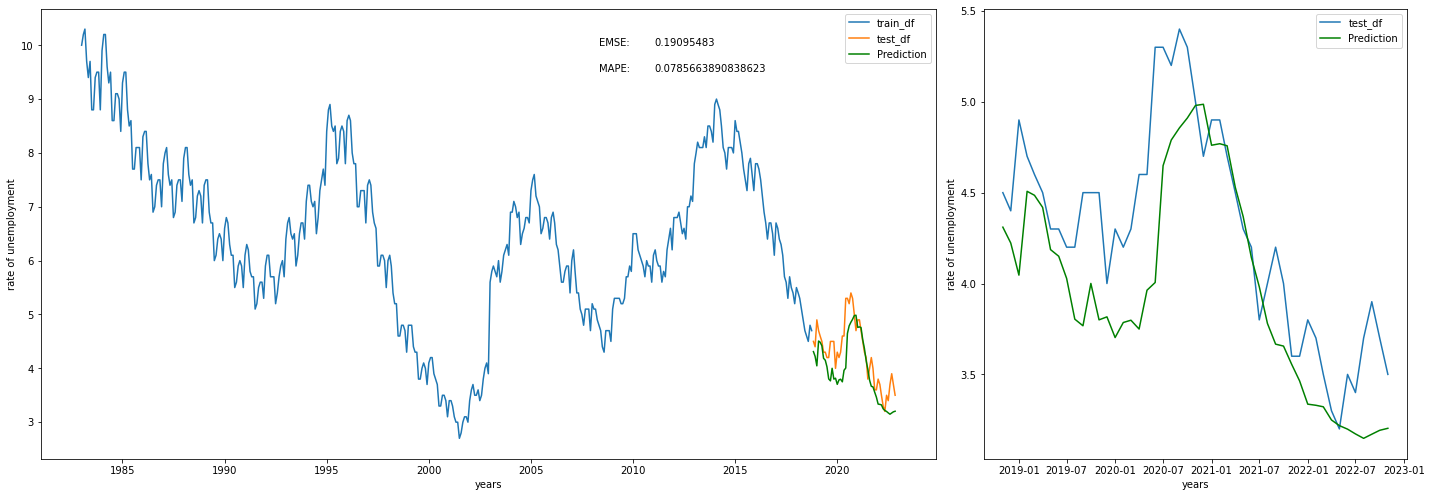

In [311]:
test_predictions = best_model_tune_time.predict(x_test_df).flatten()
test_df["best_model_tune_time"] = test_predictions

fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
ax1 = plt.plot(train_df['Netherlands'], label='train_df')
ax1 = plt.plot(test_df['Netherlands'], label='test_df')
ax1 = plt.plot(test_df["best_model_tune_time"], color='g', label='Prediction')
ax1 = plt.legend()
ax1 = plt.xlabel("years")
ax1 = plt.ylabel("rate of unemployment")
x_pos = 15000
x_pos1 = 14000
y_pos = 10
y_pos1 = 9.5
w = keras.metrics.mean_squared_error(test_df["Netherlands"], test_df["best_model_tune_time"]).numpy()
w1 = keras.metrics.mean_absolute_percentage_error(test_df["Netherlands"], test_df["best_model_tune_time"]).numpy()/100
ax1 = plt.text(x_pos1, y_pos, "EMSE: ")
ax1 = plt.text(x_pos1, y_pos1, "MAPE: ")
ax1 = plt.text(x_pos, y_pos, w)
ax1 = plt.text(x_pos, y_pos1, w1)

ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
ax2 = plt.plot(test_df['Netherlands'], label='test_df')
ax2 = plt.plot(test_df["best_model_tune_time"], color='g', label='Prediction')
ax2 = plt.legend()
ax2 = plt.xlabel("years")
ax2 = plt.ylabel("rate of unemployment")

fig.tight_layout()

data1 = [["best_model_tune_time",w,w1]]
tune_results_complex_deep_learning = pd.DataFrame(data1, columns=['model','RMSE','MAPE'])

<p style="color:black; background-color:white; padding:5px;">The results from all time - series analysis are presented below:</p>

In [316]:
time_results_all= pd.concat([time_results_ar, time_results_ma, time_results_arma, time_results_arima, 
                             time_results_naive, time_results_triple, time_results_complex_deep_learning, tune_results_complex_deep_learning])
time_results_all

model      RMSE      MAPE
0                     AR model  1.443837  0.272680
0                     MA model  2.214621  0.522615
0                   ARMA model  1.459762  0.277074
0                  ARIMA model  0.647409  0.133115
0                  Naive model  0.236471  0.044495
0              Triple ES model  0.675977  0.140602
0  DNN_LSTM_CNN_advanced_model  0.368207  0.071721
0         best_model_tune_time  0.190955  0.078566

## 4. Conclusions

In this report, an in-depth analysis was made on the possibility of deep learning and its tools, methods and algorithms to study economic dynamics in the context of the business cycle. Of course, the study in itself gives only one direction, one opportunity to enrich the toolkit for macroeconomic analysis. The business cycle, as a result of a number of factors external and internal to the economic system, is extremely complex to analyze. 
- First because it is fundamentally unpredictable due to the nature of its nature related to human behavior. 
- Second, because of the need for effective and adequate measures of the public sector to react or prevent the final aspects of the business cycle. 
- Thirdly, because of the acute economic and above all social consequences that can lead to the collapse of the entire society. 

For these reasons, the adequacy and importance of the study is beyond doubt. The main contribution of the research is that it showed the applicability of deep learning and neural networks in the study and forecasting of economic and social macroeconomic dynamics and thus provides new tools for the correct conduct of economic and social policy.

The results can be summarized as follows.
- firstly, the study showed the possibility of examining the relationship between two indirectly and non-linearly related indicators such as the level of lifelong learning and the level of poverty;
- secondly, there is an inversely proportional polynomial dependence, as poverty learning is associated with a low level of lifelong learning, or in other words, the reduction of learning at very low values leads to an increase in poverty;
- third, a number of traditional and deep learning methods were applied to reveal the regression relationship between the level of lifelong learning and the level of poverty;
- fourth, with the best result are the optimized values of the hyperpathometers in the deep learning models;
- fifth, the possibility of forecasting the unemployment rate by month for a period of almost 40 years is investigated;
- sixth, a number of traditional and deep learning methods were applied to predict the unemployment rate;
- seventh, and here with the best result are the optimized values of the hyperpathometers in the deep learning models;

Deep learning and neural networks have the capacity to achieve results in the analysis of macroeconomic statistics that, on the one hand, are considered impossible to predict, and on the other, lead to greater well-being and economic stability.

## 5. References

1.	Raychev, S., Research of labor market policies in Bulgaria, Trakia Journal of sciences, scientific anniversary conference with international participation 20 years Trakia university vol. 13, publ. Trakia University, Stara Zagora, p. 196-202,  2015, ISSN 1313-7069, DOI: 10.15547/tjs.2015.s.01.033 
2.	Raychev, S., The role of labor market policies for reducing poverty, Scientific Works of the Union of Scientists in Bulgaria – Plovdiv Series B. Natural Sciences and the Humanities, Vol. XVII “International conference of young scientists”,publ. by the Plovdiv branch of the Union of Scientists in Bulgaria, p. 301-304, 2015, ISSN 1311-9192
3.	Stoyаnova, D., Raychev, S.,  Toward Sustainable Growth To Support Youth Employment,Proceedings of the VIII International Scientific Conference "The Economy in the Changing World - National, Regional and Global Dimensions" (IPS-2017) том 1, 285-290 с. ISBN 978-954-21-0927-3;
4.	Raychev, S., Stoyanova, D., Madzhurova, B. The economic growth and labor market under the influence of globalization and innovation. 15th Economics & Finance Virtual Conference, Prague, 2021, ISBN 978-80-7668-004-3, IISES. DOI: 10.20472/EFC.2021.015.007 
5.	Dimitrova, Gergana; Madzhurova, Blaga; Raychev, Stefan; Stoyanova, Dobrinka. Education 4.0–the change of higher education institutions and the labour market. Published in Pedagogika - Pedagogy on May 18, 2022. doi.org/10.53656/PED2022-4.08. 
6.Challenges to the economy during the Covid-19 pandemic and digital transformation. Published in Second International Conference on History, Theory and Methodology of Learning (ichtml) on June 24, 2022  p. 01010.
7.	Stoyanova, Dobrinka; Madzhurova, Blaga; Raychev, Stefan. Challenges for education in bulgaria through the prism of the labor market in the context of the influence of the epidemiological situation related to covid-19. Published in Strategies for Policy in Science and Education on March 10, 2022
8. Dissertation thesis (Phd): Raichev, S., Effects of public policies on the labor market to stimulate economic growth and reduce inequality, "Paisiy Hilendarski" University Publishing House, Plovdiv, 2016
9. Raychev, S., Madzhurova, B., Stoyanova, D., Policies and innovations to promote economic growth and employment in the age of globalization, 13th Economics & Finance Virtual Conference, Prague ISBN 978-80-87927-95-3, IISES DOI: 10.20472/EFC.2020.013.014 pp. 173-191
10. Raychev, S., Stoyanova, D., Madzhurova, B. The economic growth and labor market under the influence of globalization and innovation. 15th Economics & Finance Virtual Conference, Prague, 2021, ISBN 978-80-7668-004-3, IISES. DOI: 10.20472/EFC.2021.015.007 .